# Plot results from TGA fitting
This file would work in Google Colab <br>
Aug 2023 <br>
Nanta Sophonrat

In [1]:
#@title Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title Load library
import pandas
import numpy
import math

pandas.set_option('display.max_columns', None)

In [3]:
#@title Marker styles
import matplotlib.pyplot as plt
from matplotlib import container
import matplotlib.patches as patches

colors = plt.cm.viridis(numpy.linspace(0.3, 0.9, 4))
colors2 = plt.cm.viridis(numpy.linspace(0, 0.9, 6))
colors3 = plt.cm.viridis(numpy.linspace(0.3, 0.8, 4))
colors4 = plt.cm.pink(numpy.linspace(0.1, 0.6, 4))
#print(colors)

fz = 12
marker1 = {'fmt': 'o', 'markersize': 7, 'color':"darkgreen"  , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker2 = {'fmt': '^', 'markersize': 7, 'color':"yellowgreen"    , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker3 = {'fmt': 'x', 'markersize': 7, 'color':"#F97306" , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker4 = {'fmt': 's', 'markersize': 7, 'color':"blue" , 'elinewidth':1, 'capsize':4, 'capthick':1, 'markerfacecolor':'none'}
marker5 = {'fmt': 'v', 'markersize': 7, 'color':"red" , 'elinewidth':1, 'capsize':4, 'capthick':1, 'markerfacecolor':'none'}
marker6 = {'fmt': '.', 'markersize': 7, 'color':"purple" , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker7 = {'fmt': 'o', 'markersize': 7, 'color':"#F97306" , 'elinewidth':1, 'capsize':4, 'capthick':1}
#marker7 = {'fmt': 'o', 'markersize': 7, 'color':"#F97306" , 'markeredgewidth':1, 'elinewidth':1, 'capsize':4, 'capthick':1,'markerfacecolor':'none'}
marker8 = {'fmt': 'x', 'markersize': 7, 'color':"darkgreen" , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker9 = {'fmt': '^', 'markersize': 7, 'color':colors[3]    , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker10 = {'fmt': 'x', 'markersize': 7, 'color':colors[2] , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker11 = {'fmt': 's', 'markersize': 7, 'color':colors[1] , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker12 = {'fmt': 'v', 'markersize': 7, 'color':colors[0] , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker13 = {'fmt': 'o', 'markersize': 7, 'color':"yellowgreen"    , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker14 = {'fmt': 'x', 'markersize': 7, 'color':"yellowgreen"    , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker15 = {'fmt': 's', 'markersize': 7, 'color':"darkblue" , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker16 = {'fmt': '^', 'markersize': 7, 'color':"#F97306" , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker17 = {'fmt': 'o', 'markersize': 7, 'color':"darkgreen"  , 'elinewidth':1, 'capsize':4, 'capthick':1, 'fillstyle':'right'}
marker18 = {'fmt': '^', 'markersize': 7, 'color':"yellowgreen"    , 'elinewidth':1, 'capsize':4, 'capthick':1, 'fillstyle':'right'}
marker19 = {'fmt': '+', 'markersize': 7, 'color':"#F97306" , 'elinewidth':1, 'capsize':4, 'capthick':1,'fillstyle':'right'}
marker20 = {'fmt': 's', 'markersize': 7, 'color':"darkblue" , 'elinewidth':1, 'capsize':4, 'capthick':1,'markerfacecolor':'none'}
marker21 = {'fmt': 'x', 'markersize': 7, 'color':"#F97306" , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker22 = {'fmt': 'd', 'markersize': 7, 'color':"darkblue" , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker23 = {'fmt': 'd', 'markersize': 7, 'color':"darkblue" , 'elinewidth':1, 'capsize':4, 'capthick':1,'markerfacecolor':'none'}
marker24 = {'fmt': '^', 'markersize': 7, 'color':"olivedrab"    , 'elinewidth':1, 'capsize':4, 'capthick':1, 'fillstyle':'left'}
marker25 = {'fmt': '3', 'markersize': 7, 'color':"firebrick"  , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker26 = {'fmt': '4', 'markersize': 7, 'color':"firebrick"  , 'elinewidth':1, 'capsize':4, 'capthick':1}
marker27 = {'fmt': '^', 'markersize': 7, 'color':"olivedrab"    , 'elinewidth':1, 'capsize':4, 'capthick':1, 'fillstyle':'right'}

#0) Load Exp data

In [ ]:
#@title Load Exp data
# first upload *.csv file to current location

# read file
dfexp = pandas.read_excel('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Exp_data_TGA_for_python.xlsx',sheet_name='Exp_data_TGA_for_python')
dfexp.head()

Date  RunNum          Name            Feedstock  Heating_rate  \
0 2021-12-17       1     Cell20Kpm            Cellulose            20   
1 2021-12-17       2     Cellulose            Cellulose            20   
2 2021-12-17       3  Cellulose150            Cellulose            20   
3 2021-12-17       4           PNP  Potato without peel            20   
4 2021-12-17       5            PP          Potato peel            20   

   Nominal weight (mg)  Initial_weight_dry  Char_Wpercent_db  \
0                   20            20.29159             10.41   
1                   20            20.30036             10.41   
2                   20            20.30036             10.69   
3                   20            26.79040             22.58   
4                   15            15.16865             27.58   

   Moisture_percent_ini  Cell_frac  StarchPotato_frac  Sucrose_frac  \
0              4.019561        1.0                0.0           0.0   
1                   NaN        1.0                0.0           0.0   
2                   NaN        1.0                0.0           0.0   
3                   NaN        0.0                0.0           0.0   
4              3.454300        0.0                0.0           0.0   

   Err_Cell_frac  Err_StarchPotato_frac  Err_Sucrose_frac  Extractives  \
0            NaN                    NaN               NaN          NaN   
1            NaN                    NaN               NaN          NaN   
2            NaN                    NaN               NaN          NaN   
3            NaN                    NaN               NaN          NaN   
4            NaN                    NaN               NaN          NaN   

   err_Extractives  Ash  err_Ash  
0              NaN  NaN      NaN  
1              NaN  NaN      NaN  
2              NaN  NaN      NaN  
3              NaN  NaN      NaN  
4              NaN  8.7      0.1

In [ ]:
dfexp.head(80)

Date  RunNum                         Name  \
0  2021-12-17       1                    Cell20Kpm   
1  2021-12-17       2                    Cellulose   
2  2021-12-17       3                 Cellulose150   
3  2021-12-17       4                          PNP   
4  2021-12-17       5                           PP   
..        ...     ...                          ...   
75 2023-07-13      78  SwitchgrassExtFree_20Kpm_R1   
76 2023-07-13      79         Switchgrass_20Kpm_R1   
77 2023-07-27      80         Switchgrass_20Kpm_R2   
78 2023-07-27      81  SwitchgrassExtFree_20Kpm_R2   
79 2023-07-27      82     BarkPineExtFree_20Kpm_R2   

                      Feedstock  Heating_rate  Nominal weight (mg)  \
0                     Cellulose            20                   20   
1                     Cellulose            20                   20   
2                     Cellulose            20                   20   
3           Potato without peel            20                   20   
4                   Potato peel            20                   15   
..                          ...           ...                  ...   
75  Switchgrass Extractive-free            20                   10   
76                  Switchgrass            20                   10   
77                  Switchgrass            20                   10   
78  Switchgrass Extractive-free            20                   10   
79         Bark Extractive-free            20                   10   

    Initial_weight_dry  Char_Wpercent_db  Moisture_percent_ini  Cell_frac  \
0            20.291590         10.410000              4.019561        1.0   
1            20.300360         10.410000                   NaN        1.0   
2            20.300360         10.690000                   NaN        1.0   
3            26.790400         22.580000                   NaN        0.0   
4            15.168650         27.580000              3.454300        0.0   
..                 ...               ...                   ...        ...   
75            7.557038         16.870000              6.203610        NaN   
76            9.009444         26.030000              5.773104        NaN   
77           10.458600         26.764580              6.071380        NaN   
78            7.745728         15.954007              7.045000        NaN   
79            9.207720         32.600568              9.338800        NaN   

    StarchPotato_frac  Sucrose_frac  Err_Cell_frac  Err_StarchPotato_frac  \
0                 0.0           0.0            NaN                    NaN   
1                 0.0           0.0            NaN                    NaN   
2                 0.0           0.0            NaN                    NaN   
3                 0.0           0.0            NaN                    NaN   
4                 0.0           0.0            NaN                    NaN   
..                ...           ...            ...                    ...   
75                NaN           NaN            NaN                    NaN   
76                NaN           NaN            NaN                    NaN   
77                NaN           NaN            NaN                    NaN   
78                NaN           NaN            NaN                    NaN   
79                NaN           NaN            NaN                    NaN   

    Err_Sucrose_frac  Extractives  err_Extractives  Ash  err_Ash  
0                NaN          NaN              NaN  NaN      NaN  
1                NaN          NaN              NaN  NaN      NaN  
2                NaN          NaN              NaN  NaN      NaN  
3                NaN          NaN              NaN  NaN      NaN  
4                NaN          NaN              NaN  8.7      0.1  
..               ...          ...              ...  ...      ...  
75               NaN          NaN              NaN  NaN      NaN  
76               NaN          NaN              NaN  NaN      NaN  
77               NaN          NaN              NaN  NaN      NaN  

# 1) Load data file

In [ ]:
#@title load Fit results 1 peak
dff1 = pandas.read_csv('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Fit1peak_results_for_python.csv')
dff1.head()


Name  Feedstock  Heating_rate  Nominal weight (mg)  \
0  Cell20Kpm_R2  Cellulose            20                    5   
1  Cell20Kpm_R5  Cellulose            20                    5   
2  Cell20Kpm_R6  Cellulose            20                    5   
3  Cell20Kpm_R3  Cellulose            20                   10   
4  Cell20Kpm_R7  Cellulose            20                   10   

                        Strategy             A           E         c  \
0  Multistart/fmincon DTG no fix  3.180000e+24  290.515880  0.912131   
1  Multistart/fmincon DTG no fix  3.180000e+24  290.278684  0.918663   
2  Multistart/fmincon DTG no fix  3.180000e+24  290.405283  0.921074   
3  Multistart/fmincon DTG no fix  3.180000e+24  290.819542  0.906770   
4  Multistart/fmincon DTG no fix  3.570000e+24  291.501081  0.907280   

        Rsq    T_peak  
0  0.993104  352.5893  
1  0.994706  352.0272  
2  0.986160  352.3137  
3  0.996853  353.2066  
4  0.996825  353.4330

In [ ]:
#@title load Fit results 2 peak
dff2 = pandas.read_csv('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Fit2peak_results_for_python.csv')
dff2.head()

Name  Feedstock  Heating_rate  Nominal weight (mg)  \
0  MixCS_20Kpm_R2  MixCS 5-5            20                   10   
1  MixCS_20Kpm_R3  MixCS 5-5            20                    5   
2  MixCS_20Kpm_R4  MixCS 5-5            20                    5   
3  MixCS_20Kpm_R5  MixCS 5-5            20                   10   
4  MixCS_20Kpm_R2  MixCS 5-5            20                   10   

                          Strategy        A_Cell      E_Cell    c_Cell  \
0                Fixed Starch A, E  3.180000e+33  387.423654  0.464774   
1                Fixed Starch A, E  3.180000e+33  388.454126  0.446669   
2                Fixed Starch A, E  3.570000e+33  389.664217  0.466047   
3                Fixed Starch A, E  3.570000e+33  387.637380  0.445081   
4  Fixed Starch A, E, Fixed Cell A  1.000000e+34  393.190236  0.461114   

           A_SP        E_SP      c_SP       Rsq  Tpeak_Cell  Tpeak_SP  
0  1.000000e+34  375.999998  0.333007  0.974433    338.1624  311.8266  
1  1.000000e+34  375.999998  0.386422  0.972194    339.7492  311.7898  
2  1.000000e+34  375.999999  0.378396  0.979784    340.7765  311.7372  
3  1.000000e+34  375.999996  0.358775  0.982914    337.5994  311.7050  
4  1.000000e+34  376.000000  0.335087  0.974126    338.1624  311.8266

# 2) Plot char VS dry weight

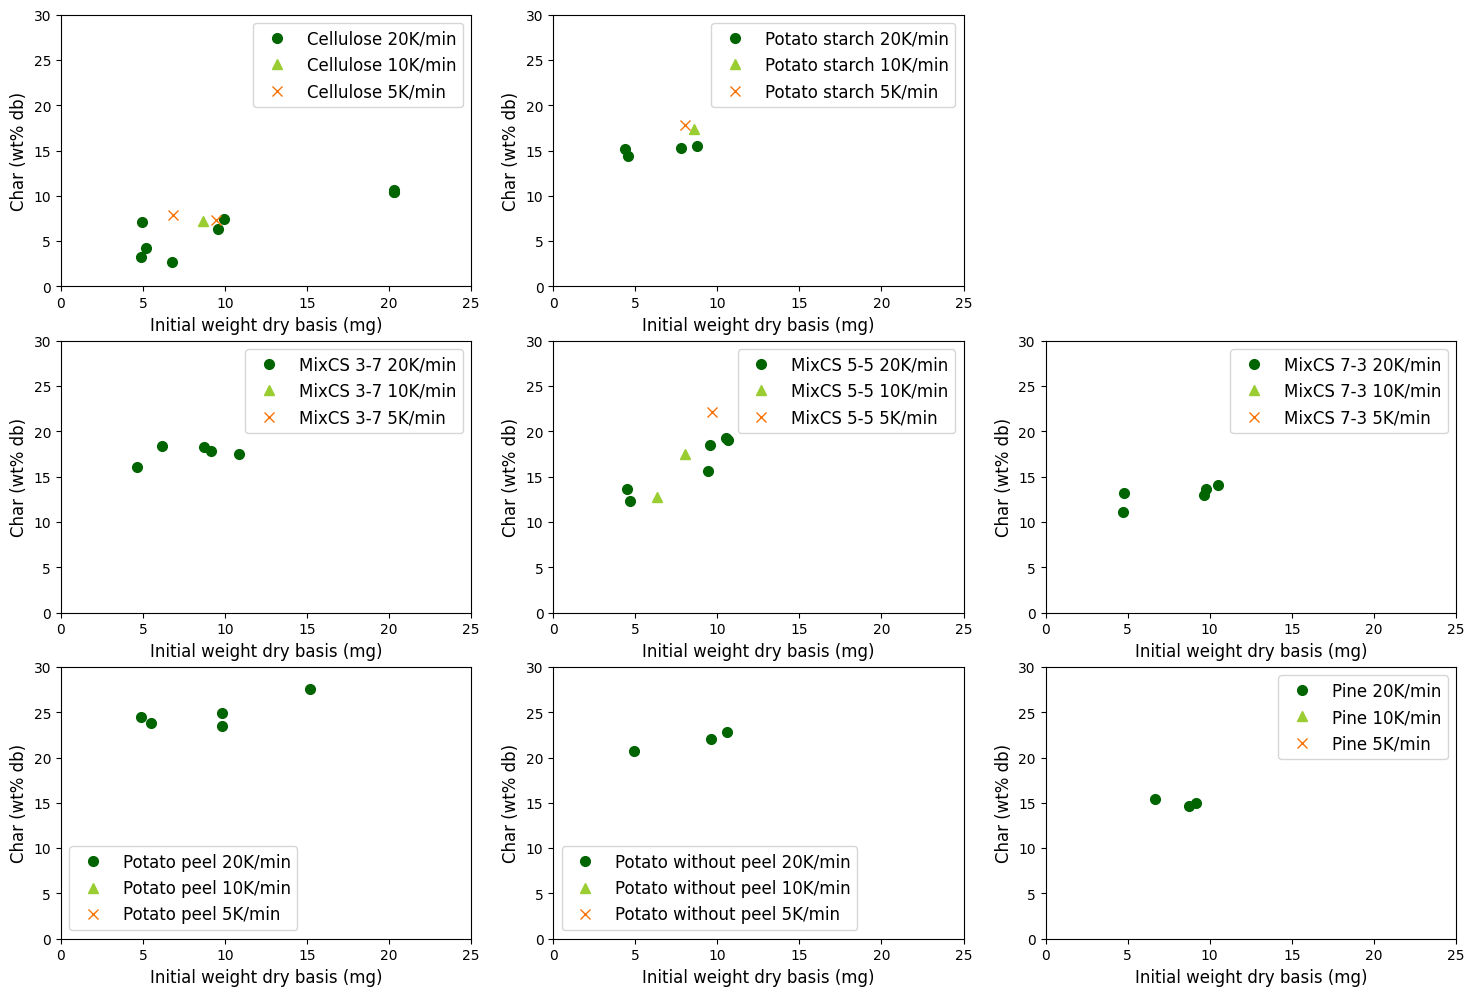

In [ ]:
#@title Cellulose


def plot_weight(feedstock, yname, yaxisname):
  plt.errorbar(x = 'Initial_weight_dry', y = yname, data = dfexp[(dfexp['Feedstock'] == feedstock) & (dfexp['Heating_rate'] == 20)], label = feedstock + ' 20K/min', **marker1)
  plt.errorbar(x = 'Initial_weight_dry', y = yname, data = dfexp[(dfexp['Feedstock'] == feedstock) & (dfexp['Heating_rate'] == 10)], label = feedstock + ' 10K/min', **marker2)
  plt.errorbar(x = 'Initial_weight_dry', y = yname, data = dfexp[(dfexp['Feedstock'] == feedstock) & (dfexp['Heating_rate'] == 5)], label = feedstock + ' 5K/min', **marker3)

  plt.xlabel('Initial weight dry basis (mg)', fontsize=fz)
  plt.ylabel(yaxisname, fontsize=fz)
  plt.xlim([0,25])
  plt.ylim([0,30])

  ax2 = plt.gca()
  handles, labels = ax2.get_legend_handles_labels()
  new_handles = []
  for h in handles:
      if isinstance(h, container.ErrorbarContainer):
          new_handles.append(h[0])
      else:
          new_handles.append(h)
  ax2.legend(new_handles, labels, loc='best', fontsize=fz)


# start plot
#fig = plt.figure(figsize=(18,12))
fig = plt.figure(figsize=(18,12))

ax2 = fig.add_subplot(3, 3, 1)
plot_weight('Cellulose','Char_Wpercent_db','Char (wt% db)')

ax2 = fig.add_subplot(3, 3, 2)
plot_weight('Potato starch','Char_Wpercent_db','Char (wt% db)')

ax2 = fig.add_subplot(3, 3, 4)
plot_weight('MixCS 3-7','Char_Wpercent_db','Char (wt% db)')

ax2 = fig.add_subplot(3, 3, 5)
plot_weight('MixCS 5-5','Char_Wpercent_db','Char (wt% db)')

ax2 = fig.add_subplot(3, 3, 6)
plot_weight('MixCS 7-3','Char_Wpercent_db','Char (wt% db)')

ax2 = fig.add_subplot(3, 3, 7)
plot_weight('Potato peel','Char_Wpercent_db','Char (wt% db)')

ax2 = fig.add_subplot(3, 3, 8)
plot_weight('Potato without peel','Char_Wpercent_db','Char (wt% db)')

ax2 = fig.add_subplot(3, 3, 9)
plot_weight('Pine','Char_Wpercent_db','Char (wt% db)')

plt.show()


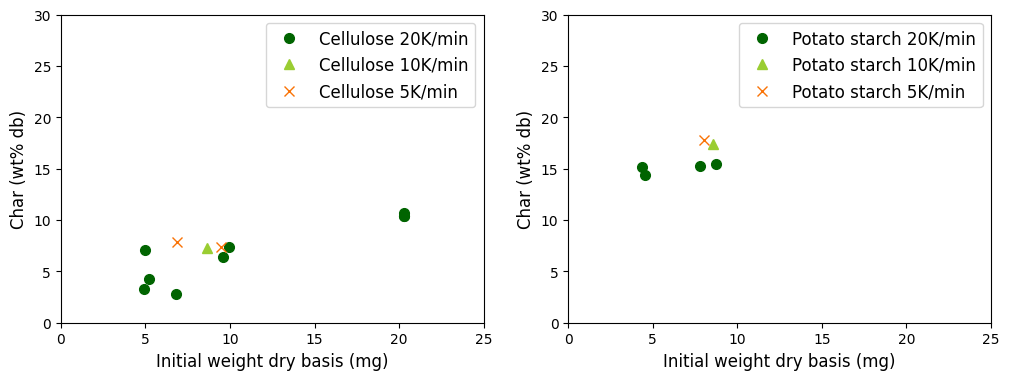

In [ ]:
fig = plt.figure(figsize=(12,4))

ax2 = fig.add_subplot(1, 2, 1)
plot_weight('Cellulose','Char_Wpercent_db','Char (wt% db)')

ax2 = fig.add_subplot(1,2, 2)
plot_weight('Potato starch','Char_Wpercent_db','Char (wt% db)')

#plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Char_Cell_Starch.png',dpi=300)

plt.show()

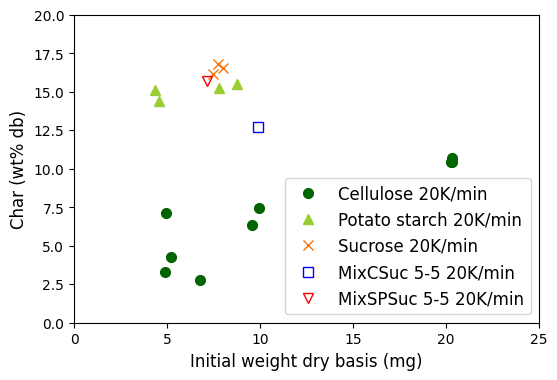

In [ ]:
#@title sucrose
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1, 1, 1)

plt.errorbar(x = 'Initial_weight_dry', y = 'Char_Wpercent_db', data = dfexp[(dfexp['Feedstock'] == 'Cellulose') & (dfexp['Heating_rate'] == 20)], label = 'Cellulose 20K/min', **marker1)
plt.errorbar(x = 'Initial_weight_dry', y = 'Char_Wpercent_db', data = dfexp[(dfexp['Feedstock'] == 'Potato starch') & (dfexp['Heating_rate'] == 20)], label = 'Potato starch 20K/min', **marker2)
plt.errorbar(x = 'Initial_weight_dry', y = 'Char_Wpercent_db', data = dfexp[(dfexp['Feedstock'] == 'Sucrose') & (dfexp['Heating_rate'] == 20)], label = 'Sucrose 20K/min', **marker3)
plt.errorbar(x = 'Initial_weight_dry', y = 'Char_Wpercent_db', data = dfexp[(dfexp['Feedstock'] == 'MixCSuc 5-5') & (dfexp['Heating_rate'] == 20)], label = 'MixCSuc 5-5 20K/min', **marker4)
plt.errorbar(x = 'Initial_weight_dry', y = 'Char_Wpercent_db', data = dfexp[(dfexp['Feedstock'] == 'MixSPSuc 5-5') & (dfexp['Heating_rate'] == 20)], label = 'MixSPSuc 5-5 20K/min', **marker5)

plt.xlabel('Initial weight dry basis (mg)', fontsize=fz)
plt.ylabel('Char (wt% db)', fontsize=fz)
plt.xlim([0,25])
plt.ylim([0,20])

ax2 = plt.gca()
handles, labels = ax2.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax2.legend(new_handles, labels, loc='best', fontsize=fz)

plt.show()

[nan, nan, 0.15322695585307483, 0.2477226271457657, 0.3820503893467456, 0.5265610126091751] [nan, nan, 0.5215095876395753, 0.69563657896922, 1.011586007218368, 1.374830989612905]


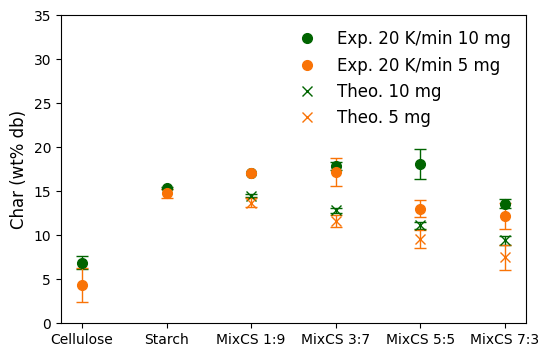

In [ ]:
#@title theoretical char yield Cellulose VS Starch
# for 10 mg feedstock

colname = ['Cellulose','Potato starch','MixCS 1-9', 'MixCS 3-7', 'MixCS 5-5','MixCS 7-3']
collabel = ('Cellulose','Starch','MixCS 1:9','MixCS 3:7', 'MixCS 5:5','MixCS 7:3')

char10_mean = numpy.zeros(len(colname))
char10_std = numpy.zeros(len(colname))
char5_mean = numpy.zeros(len(colname))
char5_std = numpy.zeros(len(colname))
char_theo10 = [numpy.nan,numpy.nan,0,0,0,0]
char_theo5 = [numpy.nan,numpy.nan,0,0,0,0]
err_char_theo10 = [numpy.nan,numpy.nan,0,0,0,0]
err_char_theo5 = [numpy.nan,numpy.nan,0,0,0,0]

# mean from exp.
for i in range(len(colname)):
  char10_mean[i] = dfexp[(dfexp['Feedstock'] == colname[i]) & (dfexp['Heating_rate'] == 20) & (dfexp['Nominal weight (mg)']==10)]['Char_Wpercent_db'].mean()
  char10_std[i] = dfexp[(dfexp['Feedstock'] == colname[i]) & (dfexp['Heating_rate'] == 20) & (dfexp['Nominal weight (mg)']==10)]['Char_Wpercent_db'].std()
  char5_mean[i] = dfexp[(dfexp['Feedstock'] == colname[i]) & (dfexp['Heating_rate'] == 20) & (dfexp['Nominal weight (mg)']==5)]['Char_Wpercent_db'].mean()
  char5_std[i] = dfexp[(dfexp['Feedstock'] == colname[i]) & (dfexp['Heating_rate'] == 20) & (dfexp['Nominal weight (mg)']==5)]['Char_Wpercent_db'].std()

# mean from theoretical (weighted sum)
char_theo10[2] = 0.1*char10_mean[0] + 0.9*char10_mean[1]
char_theo10[3] = 0.3*char10_mean[0] + 0.7*char10_mean[1]
char_theo10[4] = 0.5*char10_mean[0] + 0.5*char10_mean[1]
char_theo10[5] = 0.7*char10_mean[0] + 0.3*char10_mean[1]
char_theo5[2] = 0.1*char5_mean[0] + 0.9*char5_mean[1]
char_theo5[3] = 0.3*char5_mean[0] + 0.7*char5_mean[1]
char_theo5[4] = 0.5*char5_mean[0] + 0.5*char5_mean[1]
char_theo5[5] = 0.7*char5_mean[0] + 0.3*char5_mean[1]

err_char_theo10[2] = numpy.sqrt(pow(0.1*char10_std[0],2) + pow(0.9*char10_std[1],2))
err_char_theo10[3] = numpy.sqrt(pow(0.3*char10_std[0],2) + pow(0.7*char10_std[1],2))
err_char_theo10[4] = numpy.sqrt(pow(0.5*char10_std[0],2) + pow(0.5*char10_std[1],2))
err_char_theo10[5] = numpy.sqrt(pow(0.7*char10_std[0],2) + pow(0.3*char10_std[1],2))
err_char_theo5[2] = numpy.sqrt(pow(0.1*char5_std[0],2) + pow(0.9*char5_std[1],2))
err_char_theo5[3] = numpy.sqrt(pow(0.3*char5_std[0],2) + pow(0.7*char5_std[1],2))
err_char_theo5[4] = numpy.sqrt(pow(0.5*char5_std[0],2) + pow(0.5*char5_std[1],2))
err_char_theo5[5] = numpy.sqrt(pow(0.7*char5_std[0],2) + pow(0.3*char5_std[1],2))

print(err_char_theo10,err_char_theo5)

fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(1, 1, 1)

plt.errorbar(x = collabel,y = char10_mean, yerr = char10_std, label = 'Exp. 20 K/min 10 mg',**marker1)
plt.errorbar(x = collabel,y = char5_mean, yerr = char5_std, label = 'Exp. 20 K/min 5 mg',**marker7)
plt.errorbar(x = collabel,y = char_theo10, yerr = err_char_theo10, label = 'Theo. 10 mg', **marker8)
plt.errorbar(x = collabel,y = char_theo5, yerr = err_char_theo5, label = 'Theo. 5 mg', **marker3)
plt.ylim([0,35])
plt.ylabel('Char (wt% db)', fontsize=fz)

ax2 = plt.gca()
handles, labels = ax2.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax2.legend(new_handles, labels, loc='best', fontsize=fz,frameon=False)

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Char_Mix_Cell_Starch.png',dpi=300)

plt.show()

In [ ]:
#print(dfexp[['RunNum','Char_Wpercent_db']].where((dfexp['Feedstock'] == 'Potato starch') & (dfexp['Heating_rate'] == 20) & (dfexp['Nominal weight (mg)']==10)))
#dfexp[['RunNum','Char_Wpercent_db']].where((dfexp['Feedstock'] == 'MixCS 5-5') & (dfexp['Heating_rate'] == 20) & (dfexp['Nominal weight (mg)']==10)).describe()
dfexp[['RunNum','Char_Wpercent_db','Heating_rate','Nominal weight (mg)']].where((dfexp['Feedstock'] == 'Cellulose') & (dfexp['Heating_rate'] == 20) & (dfexp['Nominal weight (mg)']==5)).dropna()

RunNum  Char_Wpercent_db  Heating_rate  Nominal weight (mg)
20    23.0              2.75          20.0                  5.0
25    28.0              7.13          20.0                  5.0
29    32.0              3.29          20.0                  5.0
33    36.0              4.30          20.0                  5.0

In [ ]:
print(char10_mean, '\n', char10_std, '\n',char5_mean,'\n',char5_std)

[ 6.89       15.365      17.05       17.876847   18.09430025 13.568885  ] 
 [0.74953319 0.14849242        nan 0.42954184 1.68603268 0.52373655] 
 [ 4.3675 14.76   17.12   17.22   13.02   12.18  ] 
 [1.95049353 0.53740115        nan 1.58391919 0.94752309 1.4707821 ]


# 3) Plot moisture VS dry weight

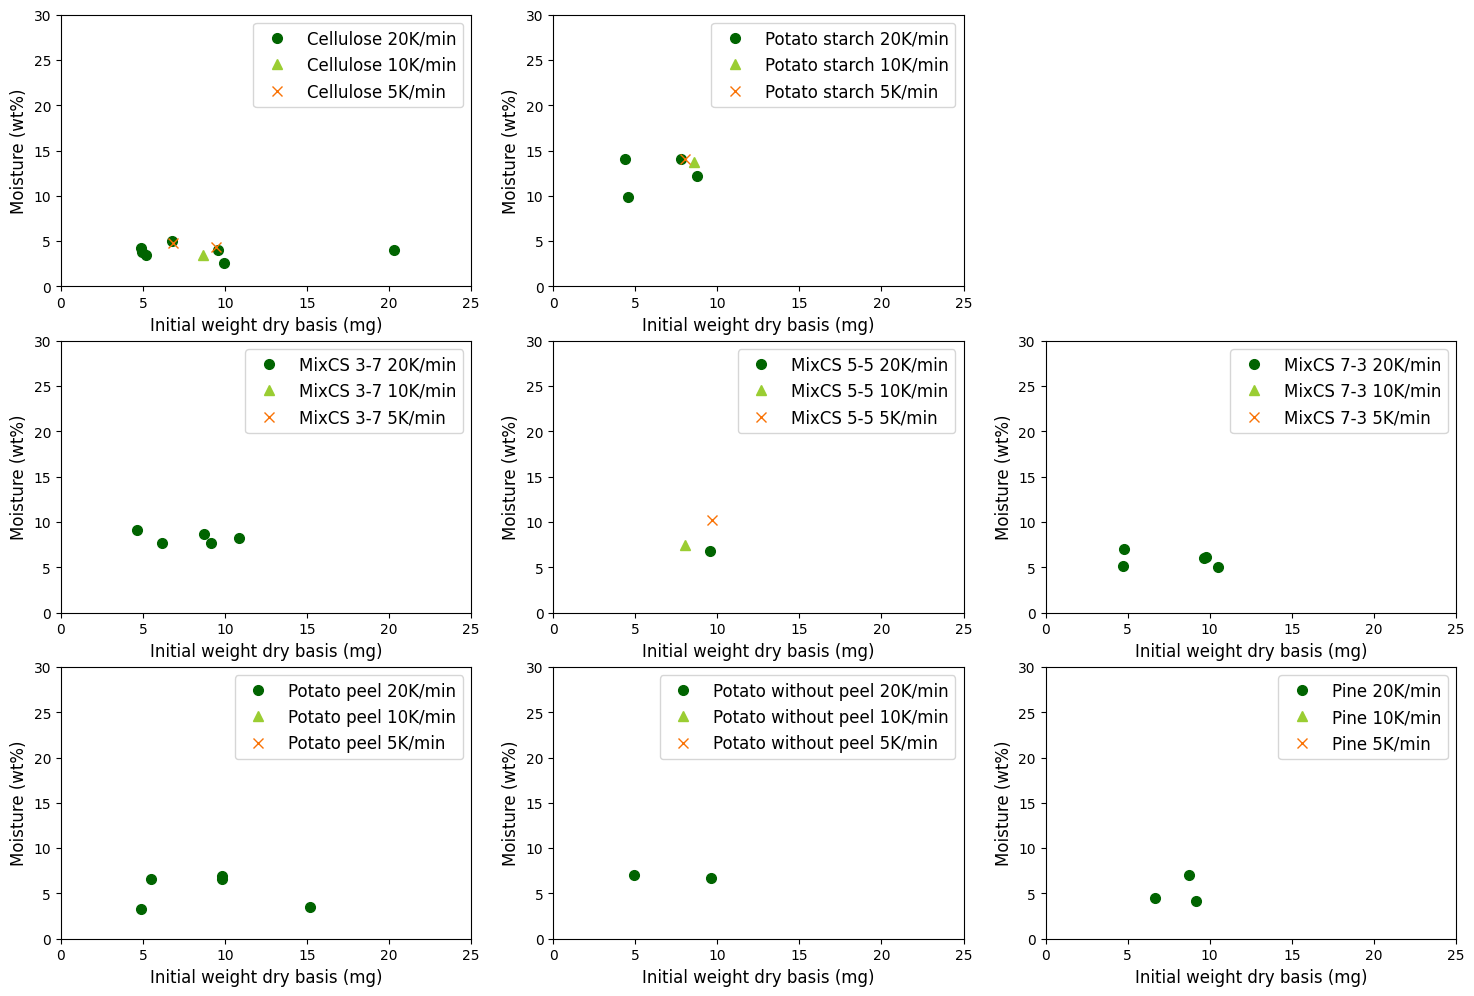

In [ ]:
#@title 3) Plot moisture VS dry weight

fig = plt.figure(figsize=(18,12))

ax2 = fig.add_subplot(3, 3, 1)
plot_weight('Cellulose','Moisture_percent_ini','Moisture (wt%)')

ax2 = fig.add_subplot(3, 3, 2)
plot_weight('Potato starch','Moisture_percent_ini','Moisture (wt%)')

ax2 = fig.add_subplot(3, 3, 4)
plot_weight('MixCS 3-7','Moisture_percent_ini','Moisture (wt%)')

ax2 = fig.add_subplot(3, 3, 5)
plot_weight('MixCS 5-5','Moisture_percent_ini','Moisture (wt%)')

ax2 = fig.add_subplot(3, 3, 6)
plot_weight('MixCS 7-3','Moisture_percent_ini','Moisture (wt%)')

ax2 = fig.add_subplot(3, 3, 7)
plot_weight('Potato peel','Moisture_percent_ini','Moisture (wt%)')

ax2 = fig.add_subplot(3, 3, 8)
plot_weight('Potato without peel','Moisture_percent_ini','Moisture (wt%)')

ax2 = fig.add_subplot(3, 3, 9)
plot_weight('Pine','Moisture_percent_ini','Moisture (wt%)')

plt.show()


In [ ]:
numpy.mean([6.36,7.42])

6.890000000000001

# 4) Plot fit 1 peak

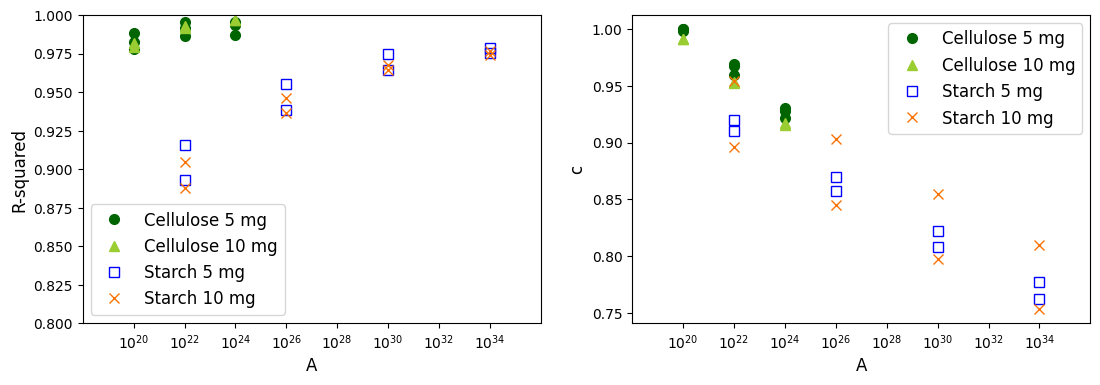

In [ ]:
#@title

def pltfit1(yname):
  plt.errorbar(x = 'A', y = yname, data = dff1[(dff1['Strategy']=='Multistart/fmincon fixed A') & (dff1['Feedstock'] == 'Cellulose') &(dff1['Nominal weight (mg)'] == 5)], label = 'Cellulose 5 mg', **marker1)
  plt.errorbar(x = 'A', y = yname, data = dff1[(dff1['Strategy']=='Multistart/fmincon fixed A') & (dff1['Feedstock'] == 'Cellulose') &(dff1['Nominal weight (mg)'] == 10)], label = 'Cellulose 10 mg', **marker2)
  plt.errorbar(x = 'A', y = yname, data = dff1[(dff1['Strategy']=='Multistart/fmincon fixed A') & (dff1['Feedstock'] == 'Potato starch')&(dff1['Nominal weight (mg)'] == 5)], label = 'Starch 5 mg', **marker4)
  plt.errorbar(x = 'A', y = yname, data = dff1[(dff1['Strategy']=='Multistart/fmincon fixed A') & (dff1['Feedstock'] == 'Potato starch')&(dff1['Nominal weight (mg)'] == 10)], label = 'Starch 10 mg', **marker3)

  ax = plt.gca()
  handles, labels = ax.get_legend_handles_labels()
  new_handles = []
  for h in handles:
      if isinstance(h, container.ErrorbarContainer):
          new_handles.append(h[0])
      else:
          new_handles.append(h)
  ax.legend(new_handles, labels, loc='best', fontsize=fz)

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(1, 2, 1)

pltfit1('Rsq')
plt.xlabel('A', fontsize=fz)
plt.ylabel('R-squared', fontsize=fz)
plt.xlim([1E18,1E36])
plt.ylim([0.8,1])
plt.xscale("log")
plt.xticks(numpy.logspace(20,34,8))

ax = fig.add_subplot(1, 2, 2)
pltfit1('c')
plt.xlabel('A', fontsize=fz)
plt.ylabel('c', fontsize=fz)
plt.xlim([1E18,1E36])
#plt.ylim([0.8,1])
plt.xscale("log")
plt.xticks(numpy.logspace(20,34,8))

plt.show()

then, A is fixed for Cellulose to be 1E24 and for Starch to be 1E34

In [ ]:
print('The best fits are:')
print(dff1[(dff1['Strategy'] == 'Multistart/fmincon DTG no fix')][['Name','A','E','c','Rsq','T_peak']])


The best fits are:
            Name             A           E         c       Rsq    T_peak
0   Cell20Kpm_R2  3.180000e+24  290.515880  0.912131  0.993104  352.5893
1   Cell20Kpm_R5  3.180000e+24  290.278684  0.918663  0.994706  352.0272
2   Cell20Kpm_R6  3.180000e+24  290.405283  0.921074  0.986160  352.3137
3   Cell20Kpm_R3  3.180000e+24  290.819542  0.906770  0.996853  353.2066
4   Cell20Kpm_R7  3.570000e+24  291.501081  0.907280  0.996825  353.4330
35   SP_20Kpm_R3  7.580000e+35  396.540441  0.757496  0.976506  311.3909
36   SP_20Kpm_R4  3.570000e+34  382.292051  0.755798  0.978385  312.1094
37      SP_20Kpm  9.710000e+35  397.556086  0.787923  0.977832  311.0646
38   SP_20Kpm_R5  3.570000e+34  381.064332  0.747269  0.974272  310.2426


In [ ]:
pandas.options.display.float_format = '{:.3e}'.format
print('Choose to fixed A at 1E24 for Cellulose and 1E34 for Starch')
cellfit = dff1[(dff1['Strategy'] == 'Multistart/fmincon fixed A')& (dff1['Feedstock']=='Cellulose') & (dff1['A']==1E24)][['Name','A','E','c','Rsq','T_peak']]
spfit = dff1[(dff1['Strategy'] == 'Multistart/fmincon fixed A') & (dff1['Feedstock']=='Potato starch')& (dff1['A']>1e34)][['Name','A','E','c','Rsq','T_peak']]
print(cellfit,'\n', spfit)
print(cellfit.describe())
print(spfit.describe())

Choose to fixed A at 1E24 for Cellulose and 1E34 for Starch
            Name         A         E         c       Rsq    T_peak
15  Cell20Kpm_R2 1.000e+24 2.846e+02 9.214e-01 9.937e-01 3.526e+02
16  Cell20Kpm_R5 1.000e+24 2.844e+02 9.282e-01 9.957e-01 3.520e+02
17  Cell20Kpm_R6 1.000e+24 2.845e+02 9.305e-01 9.870e-01 3.523e+02
18  Cell20Kpm_R3 1.000e+24 2.849e+02 9.157e-01 9.969e-01 3.532e+02
19  Cell20Kpm_R7 1.000e+24 2.850e+02 9.170e-01 9.966e-01 3.534e+02 
            Name         A         E         c       Rsq    T_peak
51  SP_20Kpm_R3 1.000e+34 3.758e+02 7.773e-01 9.754e-01 3.114e+02
52  SP_20Kpm_R4 1.000e+34 3.762e+02 7.619e-01 9.788e-01 3.119e+02
53     SP_20Kpm 1.000e+34 3.756e+02 8.094e-01 9.765e-01 3.111e+02
54  SP_20Kpm_R5 1.000e+34 3.750e+02 7.532e-01 9.743e-01 3.102e+02
              A         E         c       Rsq    T_peak
count 5.000e+00 5.000e+00 5.000e+00 5.000e+00 5.000e+00
mean  1.000e+24 2.846e+02 9.226e-01 9.940e-01 3.527e+02
std   1.501e+08 2.629e-01 6.600e-03 4.

# 5) Plot fit 2 peaks

In [ ]:
#@title Calculation
dfexp[(dfexp['Feedstock']=='Cellulose')& (dfexp['Heating_rate'] == 20)].groupby("Nominal weight (mg)").agg({"Char_Wpercent_db":numpy.mean})


Char_Wpercent_db
Nominal weight (mg)                  
5                           4.367e+00
10                          6.890e+00
20                          1.050e+01

In [ ]:
# Add char weight from dfexp to dff2 (only run once)
dff2 = pandas.merge(dff2,dfexp[['Name','Char_Wpercent_db','Cell_frac','StarchPotato_frac']], on='Name',how='left')
#print(dff2[['Name','Char_Wpercent_db','Cell_frac','StarchPotato_frac']])

In [ ]:
# error of initial fitting
dff2['err_c_Cell'] = (dff2['c_Cell'] - dff2['Cell_frac'])/dff2['Cell_frac']                            #100*
dff2['err_c_SP'] =  (dff2['c_SP'] - dff2['StarchPotato_frac'])/dff2['StarchPotato_frac']               #100*

# Normalization
dff2['c_Cell_norm'] = dff2['c_Cell']/(dff2['c_Cell']+dff2['c_SP'])
dff2['c_SP_norm'] = dff2['c_SP']/(dff2['c_Cell']+dff2['c_SP'])
dff2['err_c_Cell_norm'] =  (dff2['c_Cell_norm'] - dff2['Cell_frac'])/dff2['Cell_frac']
dff2['err_c_SP_norm'] =  (dff2['c_SP_norm'] - dff2['StarchPotato_frac'])/dff2['StarchPotato_frac']

# Char adjust
Char_Cell20Kpm = dfexp[(dfexp['Feedstock']=='Cellulose')& (dfexp['Heating_rate'] == 20)]['Char_Wpercent_db'].mean()/100
Char_SP20Kpm = dfexp[(dfexp['Feedstock']=='Potato starch')& (dfexp['Heating_rate'] == 20)]['Char_Wpercent_db'].mean()/100

dff2['Char_frac'] = dff2['Char_Wpercent_db']/100

dff2['c_Cell_CharAdj'] = dff2['c_Cell']*(1-dff2['Char_frac'])/(1-Char_Cell20Kpm)
dff2['c_SP_CharAdj'] = dff2['c_SP']*(1-dff2['Char_frac'])/(1-Char_SP20Kpm)
dff2['err_c_Cell_CharAdj'] =  (dff2['c_Cell_CharAdj'] - dff2['Cell_frac'])/dff2['Cell_frac']
dff2['err_c_SP_CharAdj'] = (dff2['c_SP_CharAdj'] - dff2['StarchPotato_frac'])/dff2['StarchPotato_frac']

# Char adjust and normalize
dff2['c_Cell_CharAdj_norm'] = dff2['c_Cell_CharAdj']/(dff2['c_Cell_CharAdj']+dff2['c_SP_CharAdj'])
dff2['c_SP_CharAdj_norm'] = dff2['c_SP_CharAdj']/(dff2['c_Cell_CharAdj']+dff2['c_SP_CharAdj'])
dff2['err_c_Cell_CharAdj_norm'] =  (dff2['c_Cell_CharAdj_norm'] - dff2['Cell_frac'])/dff2['Cell_frac']
dff2['err_c_SP_CharAdj_norm'] = (dff2['c_SP_CharAdj_norm'] - dff2['StarchPotato_frac'])/dff2['StarchPotato_frac']



In [ ]:
dff2.columns

Index(['Name', 'Feedstock', 'Heating_rate', 'Nominal weight (mg)', 'Strategy',
       'A_Cell', 'E_Cell', 'c_Cell', 'A_SP', 'E_SP', 'c_SP', 'Rsq',
       'Tpeak_Cell', 'Tpeak_SP', 'Char_Wpercent_db', 'Cell_frac',
       'StarchPotato_frac', 'err_c_Cell', 'err_c_SP', 'c_Cell_norm',
       'c_SP_norm', 'err_c_Cell_norm', 'err_c_SP_norm', 'Char_frac',
       'c_Cell_CharAdj', 'c_SP_CharAdj', 'err_c_Cell_CharAdj',
       'err_c_SP_CharAdj', 'c_Cell_CharAdj_norm', 'c_SP_CharAdj_norm',
       'err_c_Cell_CharAdj_norm', 'err_c_SP_CharAdj_norm'],
      dtype='object')

In [ ]:
#print(Char_Cell20Kpm,Char_SP20Kpm)
#print(dff2[['Name','Char_Wpercent_db','c_Cell_CharAdj','c_SP_CharAdj']])
print(dff2[(dff2['Strategy']=='Fixed Starch A, E, Fixed Cell A')][['Name','Feedstock','A_Cell','E_Cell','c_Cell','A_SP', 'E_SP', 'c_SP', 'Rsq',
       'Tpeak_Cell', 'Tpeak_SP','c_Cell_CharAdj_norm', 'c_SP_CharAdj_norm',
       'err_c_Cell_CharAdj_norm', 'err_c_SP_CharAdj_norm']])
dff2[(dff2['Strategy']=='Fixed Starch A, E, Fixed Cell A')][['Name','Feedstock','A_Cell','E_Cell','c_Cell','A_SP', 'E_SP', 'c_SP', 'Rsq',
       'Tpeak_Cell', 'Tpeak_SP','c_Cell_CharAdj_norm', 'c_SP_CharAdj_norm',
       'err_c_Cell_CharAdj_norm', 'err_c_SP_CharAdj_norm']].to_csv('Fit_params.csv')

                Name  Feedstock    A_Cell    E_Cell    c_Cell      A_SP  \
4     MixCS_20Kpm_R2  MixCS 5-5 1.000e+34 3.932e+02 4.611e-01 1.000e+34   
5     MixCS_20Kpm_R3  MixCS 5-5 1.000e+34 3.942e+02 4.433e-01 1.000e+34   
6     MixCS_20Kpm_R4  MixCS 5-5 1.000e+34 3.949e+02 4.628e-01 1.000e+34   
7     MixCS_20Kpm_R5  MixCS 5-5 1.000e+34 3.928e+02 4.420e-01 1.000e+34   
12  MixCS37_20Kpm_R1  MixCS 3-7 1.000e+34 3.933e+02 2.868e-01 1.000e+34   
13  MixCS37_20Kpm_R2  MixCS 3-7 1.000e+34 3.910e+02 2.904e-01 1.000e+34   
14  MixCS37_20Kpm_R3  MixCS 3-7 1.000e+34 3.915e+02 2.726e-01 1.000e+34   
15  MixCS37_20Kpm_R4  MixCS 3-7 1.000e+34 3.901e+02 2.714e-01 1.000e+34   
16  MixCS37_20Kpm_R5  MixCS 3-7 1.000e+34 3.928e+02 2.920e-01 1.000e+34   
22  MixCS73_20Kpm_R1  MixCS 7-3 1.000e+34 3.966e+02 6.235e-01 1.000e+34   
23  MixCS73_20Kpm_R2  MixCS 7-3 1.000e+34 3.962e+02 6.226e-01 1.000e+34   
24  MixCS73_20Kpm_R3  MixCS 7-3 1.000e+34 3.960e+02 5.989e-01 1.000e+34   
25  MixCS73_20Kpm_R4  Mix

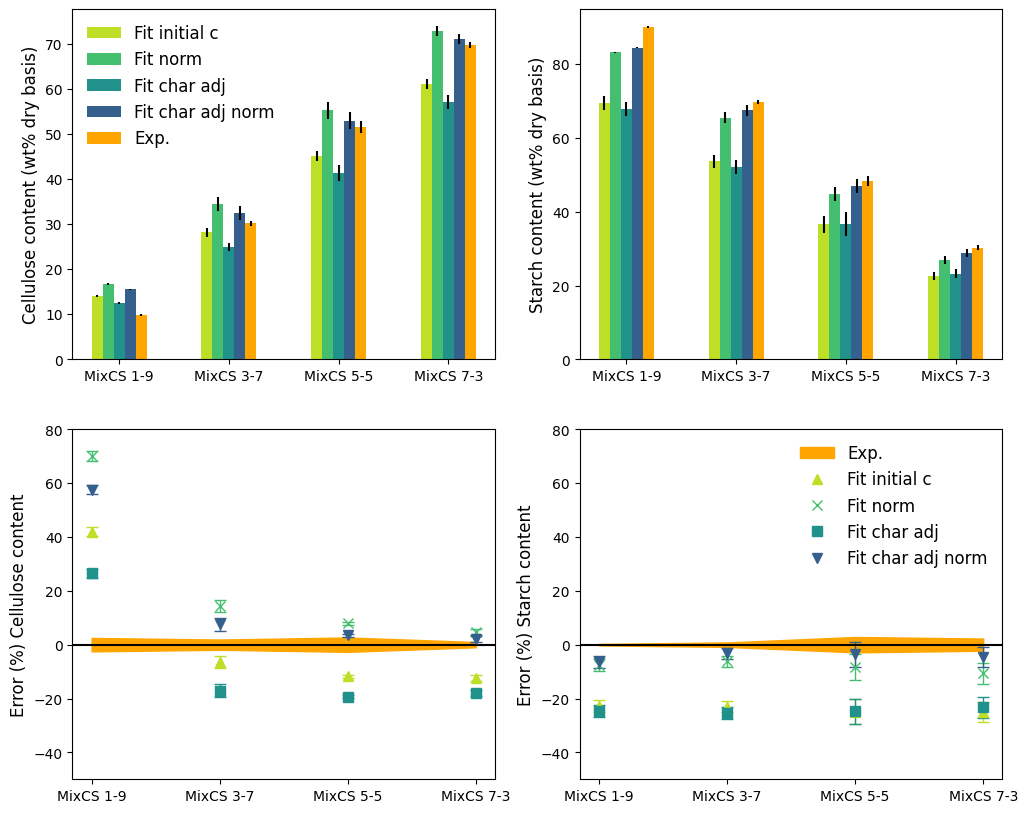

In [ ]:
#@title fit 20 K/min bar plot

# multiply by 100 to convert fraction to percentage
dfexp3 = 100*dfexp2.groupby('Feedstock').agg({"Cell_frac": [numpy.mean,numpy.std], "StarchPotato_frac": [numpy.mean,numpy.std]})
#print(dfexp3)
dff2_2 = 100*dff2_1.groupby('Feedstock').agg({"c_Cell":[numpy.mean,numpy.std],
                                          "c_Cell_norm":[numpy.mean,numpy.std],
                                          "c_Cell_CharAdj":[numpy.mean,numpy.std],
                                          "c_Cell_CharAdj_norm":[numpy.mean,numpy.std],
                                          "c_SP":[numpy.mean,numpy.std],
                                          "c_SP_norm":[numpy.mean,numpy.std],
                                          "c_SP_CharAdj":[numpy.mean,numpy.std],
                                          "c_SP_CharAdj_norm":[numpy.mean,numpy.std],
                                          "err_c_Cell":[numpy.mean,numpy.std],
                                          "err_c_Cell_norm":[numpy.mean,numpy.std],
                                          "err_c_Cell_CharAdj":[numpy.mean,numpy.std],
                                          "err_c_Cell_CharAdj_norm":[numpy.mean,numpy.std],
                                          "err_c_SP":[numpy.mean,numpy.std],
                                          "err_c_SP_norm":[numpy.mean,numpy.std],
                                          "err_c_SP_CharAdj":[numpy.mean,numpy.std],
                                          "err_c_SP_CharAdj_norm":[numpy.mean,numpy.std]})
#print(dff2_2.index)

fig = plt.figure(figsize=(12,10))

ind = numpy.arange(4)
width = 0.1

### plot 1
ax = fig.add_subplot(2, 2, 1)
plt.bar(x = ind,         height = dff2_2['c_Cell']['mean'], yerr = dff2_2['c_Cell']['std'], width=width, label = 'Fit initial c',color=colors[3])
plt.bar(x = ind + width, height = dff2_2['c_Cell_norm']['mean'], yerr = dff2_2['c_Cell_norm']['std'], width=width, label = 'Fit norm',color=colors[2])
plt.bar(x = ind + 2*width, height = dff2_2['c_Cell_CharAdj']['mean'], yerr = dff2_2['c_Cell_CharAdj']['std'], width=width, label = 'Fit char adj',color=colors[1])
plt.bar(x = ind + 3*width, height = dff2_2['c_Cell_CharAdj_norm']['mean'], yerr = dff2_2['c_Cell_CharAdj_norm']['std'], width=width, label = 'Fit char adj norm',color=colors[0])
plt.bar(x = ind + 4*width, height = dfexp3['Cell_frac']['mean'], yerr = dfexp3['Cell_frac']['std'], width=width, label = 'Exp.', color='Orange')  #'#F97306'

plt.ylabel('Cellulose content (wt% dry basis)', fontsize=fz)
#plt.ylabel('Cellulose fraction', fontsize=fz)
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.xticks(ind + 4*width/2, ('MixCS 1-9', 'MixCS 3-7', 'MixCS 5-5', 'MixCS 7-3'))

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc='best', fontsize=fz, frameon=False)

### plot 2
ax = fig.add_subplot(2, 2, 2)
plt.bar(x = ind,   height = dff2_2['c_SP']['mean'],               yerr = dff2_2['c_SP']['std'], width=width, label = 'Fit initial c',color=colors[3])
plt.bar(x = ind + width, height = dff2_2['c_SP_norm']['mean'],          yerr = dff2_2['c_SP_norm']['std'], width=width, label = 'Fit norm',color=colors[2])
plt.bar(x = ind + 2*width, height = dff2_2['c_SP_CharAdj']['mean'],       yerr = dff2_2['c_SP_CharAdj']['std'], width=width, label = 'Fit char adj',color=colors[1])
plt.bar(x = ind + 3*width, height = dff2_2['c_SP_CharAdj_norm']['mean'],  yerr = dff2_2['c_SP_CharAdj_norm']['std'], width=width, label = 'Fit char adj norm',color=colors[0])
plt.bar(x = ind + 4*width,           height = dfexp3['StarchPotato_frac']['mean'],  yerr = dfexp3['StarchPotato_frac']['std'], width=width, label = 'Exp.', color='Orange')

plt.ylabel('Starch content (wt% dry basis)', fontsize=fz)
#plt.ylabel('Starch fraction', fontsize=fz)
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.xticks(ind + 4*width/2, ('MixCS 1-9', 'MixCS 3-7', 'MixCS 5-5', 'MixCS 7-3'))

### plot 3
ax = fig.add_subplot(2, 2, 3)
plt.errorbar(x = dff2_2.index, y = dff2_2['err_c_Cell']['mean'],             yerr = dff2_2['err_c_Cell']['std'], label = 'Fit initial c', **marker9)
plt.errorbar(x = dff2_2.index, y = dff2_2['err_c_Cell_norm']['mean'],        yerr = dff2_2['err_c_Cell']['std'], label = 'Fit norm', **marker10)
plt.errorbar(x = dff2_2.index, y = dff2_2['err_c_Cell_CharAdj']['mean'],     yerr = dff2_2['err_c_Cell']['std'], label = 'Fit char adj', **marker11)
plt.errorbar(x = dff2_2.index, y = dff2_2['err_c_Cell_CharAdj_norm']['mean'],yerr = dff2_2['err_c_Cell']['std'], label = 'Fit char adj norm', **marker12)

plt.ylabel('Error (%) Cellulose content', fontsize=fz)
#plt.ylim([-0.5,0.7])
plt.ylim([-50,80])
plt.axhline(y=0.0, color='k', linestyle='-')

y1 = dfexp3['Cell_frac']['std'].values/dfexp3['Cell_frac']['mean'].values*100
y2 = -y1
ax.fill_between(dff2_2.index,y1, y2, color='Orange')

### plot 4
ax = fig.add_subplot(2, 2, 4)
plt.errorbar(x = dff2_2.index, y = dff2_2['err_c_SP']['mean'],             yerr = dff2_2['err_c_SP']['std'], label = 'Fit initial c', **marker9)
plt.errorbar(x = dff2_2.index, y = dff2_2['err_c_SP_norm']['mean'],        yerr = dff2_2['err_c_SP']['std'], label = 'Fit norm', **marker10)
plt.errorbar(x = dff2_2.index, y = dff2_2['err_c_SP_CharAdj']['mean'],     yerr = dff2_2['err_c_SP']['std'], label = 'Fit char adj', **marker11)
plt.errorbar(x = dff2_2.index, y = dff2_2['err_c_SP_CharAdj_norm']['mean'],yerr = dff2_2['err_c_SP']['std'], label = 'Fit char adj norm', **marker12)

plt.ylabel('Error (%) Starch content', fontsize=fz)
#plt.ylim([-0.5,0.7])
plt.ylim([-50,80])
plt.axhline(y=0.0, color='k', linestyle='-')

y1 = dfexp3['StarchPotato_frac']['std'].values/dfexp3['StarchPotato_frac']['mean'].values*100
y2 = -y1
ax.fill_between(dff2_2.index,y1, y2, label = 'Exp.', color='Orange')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc='best', fontsize=fz, frameon=False)

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Fit_Mix_Cell_Starch_bar.png',dpi=300,bbox_inches='tight', pad_inches=0)

plt.show()

In [ ]:
y1 = dfexp3['Cell_frac']['std'].values/dfexp3['Cell_frac']['mean'].values*100
y2 = -y1
print(y1, y2)

[2.49953908 1.89967429 2.67005254 0.97980693] [-2.49953908 -1.89967429 -2.67005254 -0.97980693]


In [ ]:
print(dff2_2)

             c_Cell           c_Cell_norm           c_Cell_CharAdj            \
               mean       std        mean       std           mean       std   
Feedstock                                                                      
MixCS 1-9 1.400e+01 1.772e-01   1.677e+01 1.950e-01      1.248e+01 1.654e-01   
MixCS 3-7 2.826e+01 9.907e-01   3.448e+01 1.536e+00      2.503e+01 8.793e-01   
MixCS 5-5 4.523e+01 1.120e+00   5.530e+01 1.914e+00      4.132e+01 1.799e+00   
MixCS 7-3 6.118e+01 1.206e+00   7.298e+01 1.097e+00      5.721e+01 1.589e+00   

          c_Cell_CharAdj_norm                c_SP           c_SP_norm  \
                         mean       std      mean       std      mean   
Feedstock                                                               
MixCS 1-9           1.554e+01 1.833e-01 6.949e+01 1.850e+00 8.323e+01   
MixCS 3-7           3.246e+01 1.490e+00 5.372e+01 1.792e+00 6.552e+01   
MixCS 5-5           5.305e+01 1.930e+00 3.660e+01 2.360e+00 4.470e+01   
M

#5) Archive

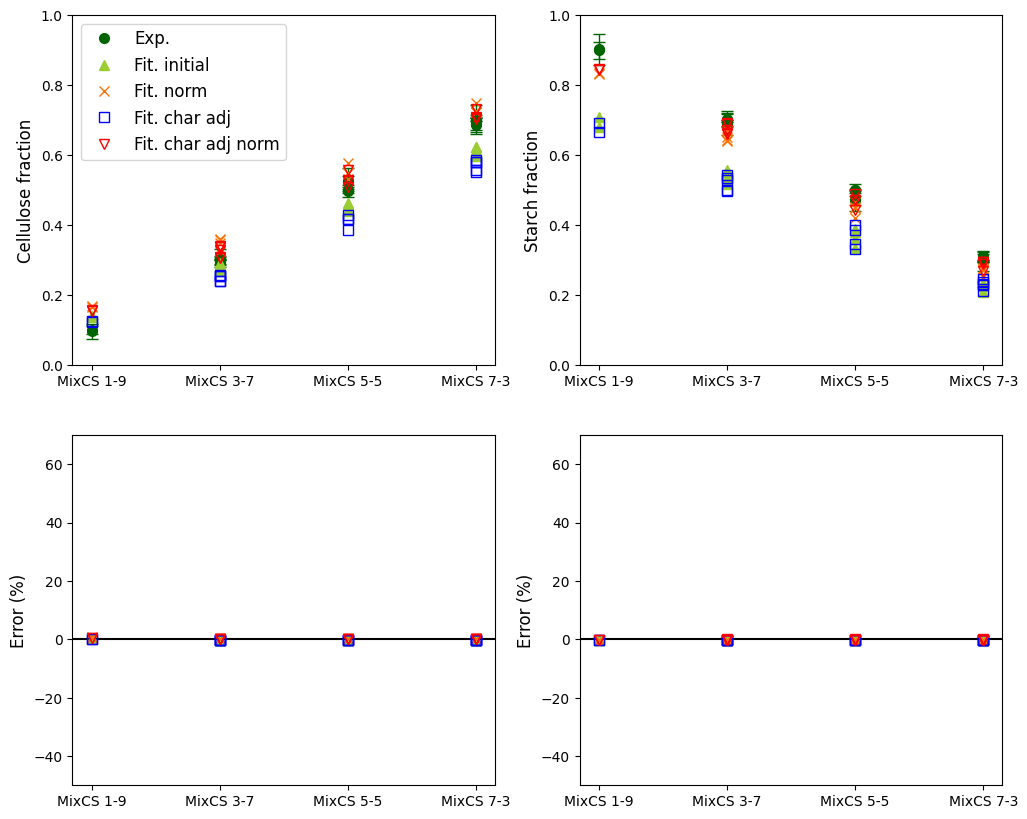

In [ ]:
#@title fit 20 K/min scatter plot

dfexp2 = dfexp[(dfexp['Feedstock'].str.startswith('MixCS ')) & (dfexp['Heating_rate'] == 20)].sort_values(['Feedstock'], ascending=True)
dff2_1 = dff2[(dff2['Strategy']=='Fixed Starch A, E, Fixed Cell A')]
dff2_1 = dff2_1.sort_values(['Feedstock'], ascending=True)

fig = plt.figure(figsize=(12,10))

### plot 1
ax = fig.add_subplot(2, 2, 1)
plt.errorbar(x = 'Feedstock', y = 'Cell_frac', yerr = 'Err_Cell_frac', data = dfexp2, label = 'Exp.', **marker1)
plt.errorbar(x = 'Feedstock', y = 'c_Cell', data = dff2_1, label = 'Fit. initial', **marker2)
plt.errorbar(x = 'Feedstock', y = 'c_Cell_norm', data = dff2_1, label = 'Fit. norm', **marker3)
plt.errorbar(x = 'Feedstock', y = 'c_Cell_CharAdj', data = dff2_1, label = 'Fit. char adj', **marker4)
plt.errorbar(x = 'Feedstock', y = 'c_Cell_CharAdj_norm', data = dff2_1, label = 'Fit. char adj norm', **marker5)

plt.ylabel('Cellulose fraction', fontsize=fz)
#plt.xlim([0,1])
plt.ylim([0,1])

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc='best', fontsize=fz)

### plot 2
ax = fig.add_subplot(2, 2, 2)
plt.errorbar(x = 'Feedstock', y = 'StarchPotato_frac', yerr = 'Err_StarchPotato_frac', data = dfexp2, label = 'Exp.', **marker1)
plt.errorbar(x = 'Feedstock', y = 'c_SP', data = dff2_1, label = 'Fit. initial', **marker2)
plt.errorbar(x = 'Feedstock', y = 'c_SP_norm', data = dff2_1, label = 'Fit. norm', **marker3)
plt.errorbar(x = 'Feedstock', y = 'c_SP_CharAdj', data = dff2_1, label = 'Fit. char adj', **marker4)
plt.errorbar(x = 'Feedstock', y = 'c_SP_CharAdj_norm', data = dff2_1, label = 'Fit. char adj norm', **marker5)

plt.ylabel('Starch fraction', fontsize=fz)
#plt.xlim([0,1])
plt.ylim([0,1])

### plot 3
ax = fig.add_subplot(2, 2, 3)
plt.errorbar(x = 'Feedstock', y = 'err_c_Cell', data = dff2_1, label = 'Fit. initial', **marker2)
plt.errorbar(x = 'Feedstock', y = 'err_c_Cell_norm', data = dff2_1, label = 'Fit. norm', **marker3)
plt.errorbar(x = 'Feedstock', y = 'err_c_Cell_CharAdj', data = dff2_1, label = 'Fit. char adj', **marker4)
plt.errorbar(x = 'Feedstock', y = 'err_c_Cell_CharAdj_norm', data = dff2_1, label = 'Fit. char adj norm', **marker5)

plt.ylabel('Error (%)', fontsize=fz)
#plt.ylim([-0.5,0.7])
plt.ylim([-50,70])
plt.axhline(y=0.0, color='k', linestyle='-')

### plot 4
ax = fig.add_subplot(2, 2, 4)
plt.errorbar(x = 'Feedstock', y = 'err_c_SP', data = dff2_1, label = 'Fit. initial', **marker2)
plt.errorbar(x = 'Feedstock', y = 'err_c_SP_norm', data = dff2_1, label = 'Fit. norm', **marker3)
plt.errorbar(x = 'Feedstock', y = 'err_c_SP_CharAdj', data = dff2_1, label = 'Fit. char adj', **marker4)
plt.errorbar(x = 'Feedstock', y = 'err_c_SP_CharAdj_norm', data = dff2_1, label = 'Fit. char adj norm', **marker5)

plt.ylabel('Error (%)', fontsize=fz)
#plt.ylim([-0.5,0.7])
plt.ylim([-50,70])
plt.axhline(y=0.0, color='k', linestyle='-')

#plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Fit_Mix_Cell_Starch.png',dpi=300)
plt.show()



# 6) Char Ref. Cellulose Hemicellulose Lignin

In [16]:
#@title Load data

# read file
CharRef = pandas.read_excel('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Char_data_for_python.xlsx')

CharRef.head()

NomFeed Feedstock               Ref  heating rate (K/min)  T_peak 1 (°C)  \
0  Cellulose   Avicel      Kristanto2021                   5.0          330.0   
1  Cellulose        MC          Chen2020                   1.0          308.0   
2  Cellulose       NaN  Gerassimidou2020                   5.0          318.0   
3  Cellulose       NaN  Gerassimidou2020                   5.0          337.0   
4  Cellulose        MC          Chen2020                   5.0          332.0   

   T_peak 2 (°C)  T_peak 3 (°C)  Char (%wt db)  Final Char temperature (°C)  \
0            NaN            NaN            NaN                        600.0   
1            NaN            NaN          13.10                        800.0   
2            NaN            NaN          18.00                          NaN   
3            NaN            NaN            NaN                          NaN   
4            NaN            NaN           7.08                        800.0   

   Sample size (mg)  Ash (%wt db) Drying        TG system  \
0              15.0           NaN    NaN  PT 1000 Linseis   
1               5.0       0.32697    105      TA SDT Q600   
2               NaN           NaN    NaN              NaN   
3               NaN           NaN    NaN              NaN   
4               5.0           NaN    105      TA SDT Q600   

                        Note materials  
0  pelletized to OD 4mm  height 1 mm "  
1                  dry 105 C for 16 hr  
2                                  NaN  
3                                  NaN  
4                  dry 105 C for 16 hr

In [17]:
print(CharRef.columns)

Index(['NomFeed', 'Feedstock', 'Ref', 'heating rate (K/min)', 'T_peak 1 (°C)',
       'T_peak 2 (°C)', 'T_peak 3 (°C)', 'Char (%wt db)',
       'Final Char temperature (°C)', 'Sample size (mg)', 'Ash (%wt db)',
       'Drying', 'TG system', 'Note materials'],
      dtype='object')


In [18]:
#@title

dfChar = CharRef[['NomFeed','heating rate (K/min)', 'T_peak 1 (°C)',
       'T_peak 2 (°C)', 'T_peak 3 (°C)', 'Char (%wt db)',
       'Final Char temperature (°C)', 'Sample size (mg)','Ash (%wt db)']]
#pandas.set_option("display.precision", 0)
dfChar.describe()

heating rate (K/min)  T_peak 1 (°C)  T_peak 2 (°C)  T_peak 3 (°C)  \
count             72.000000      70.000000      21.000000            1.0   
mean              13.513889     306.820000     499.476190          760.0   
std               10.211831      62.153202     221.824845            NaN   
min                1.000000     109.400000     260.000000          760.0   
25%               10.000000     250.500000     296.000000          760.0   
50%               10.000000     325.950000     400.000000          760.0   
75%               20.000000     351.500000     750.000000          760.0   
max               50.000000     400.000000     783.000000          760.0   

       Char (%wt db)  Final Char temperature (°C)  Sample size (mg)  \
count      67.000000                    66.000000         49.000000   
mean       24.504030                   817.833333          7.795918   
std        17.392583                    99.304440          3.372558   
min         0.010000                   500.000000          5.000000   
25%         8.500000                   800.000000          5.000000   
50%        20.000000                   800.000000          5.000000   
75%        40.600000                   900.000000         10.000000   
max        58.000000                  1000.000000         20.000000   

       Ash (%wt db)  
count     17.000000  
mean       5.132280  
std        7.903688  
min        0.000000  
25%        0.326970  
50%        2.110000  
75%        4.250000  
max       28.600000

In [19]:
dfChar.groupby('NomFeed').count()

heating rate (K/min)  T_peak 1 (°C)  T_peak 2 (°C)  \
NomFeed                                                             
Cellulose                        22             21              0   
Fructose                          1              1              0   
Glucose                           1              1              0   
Hemicellulose                    13             13             10   
Lignin                           25             24             11   
Pectin                            3              3              0   
Starch                            3              3              0   
Straw                             1              1              0   
Sucrose                           2              2              0   
Sugarcane                         1              1              0   

               T_peak 3 (°C)  Char (%wt db)  Final Char temperature (°C)  \
NomFeed                                                                    
Cellulose                  0             20                           20   
Fructose                   0              0                            0   
Glucose                    0              0                            0   
Hemicellulose              0             12                           12   
Lignin                     1             26                           25   
Pectin                     0              3                            3   
Starch                     0              3                            3   
Straw                      0              1                            1   
Sucrose                    0              1                            1   
Sugarcane                  0              1                            1   

               Sample size (mg)  Ash (%wt db)  
NomFeed                                        
Cellulose                    19             3  
Fructose                      0             0  
Glucose                       0             0  
Hemicellulose                11             2  
Lignin                       18            12  
Pectin                        0             0  
Starch                        1             0  
Straw                         0             0  
Sucrose                       0             0  
Sugarcane                     0             0

(0.0, 60.0)

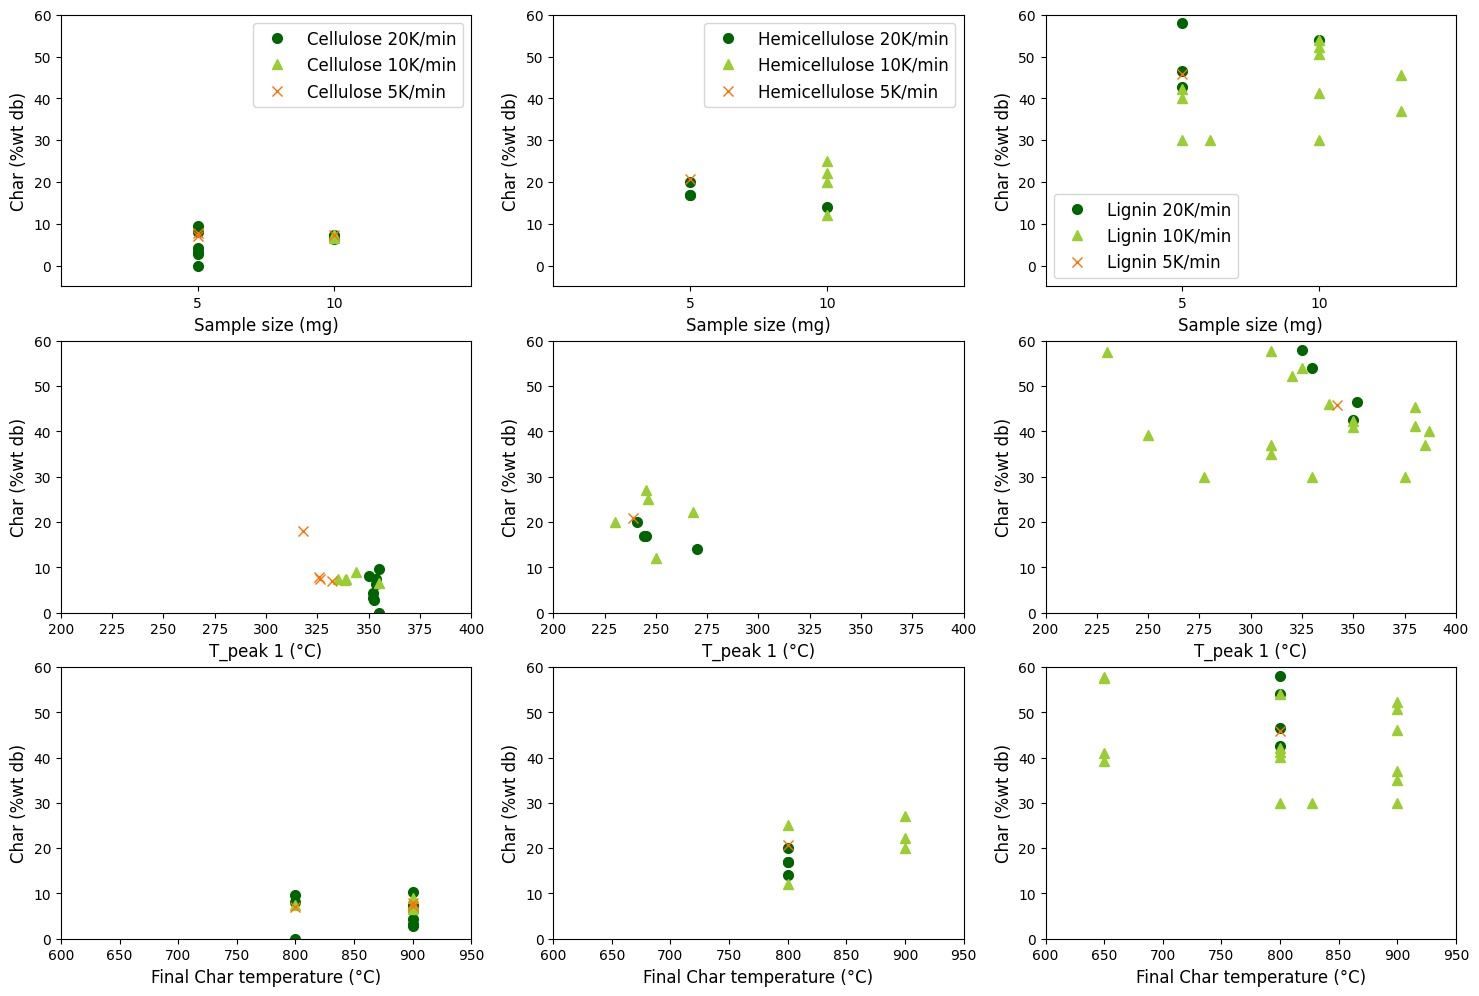

In [20]:
#@title Plot xx VS Char dif heating rate

def plot_charref(feedstock, xname, xaxisname):

  plt.errorbar(x = xname, y = 'Char (%wt db)', data = dfChar[(dfChar['NomFeed'] == feedstock) & (dfChar['heating rate (K/min)'] == 20)], label = feedstock + ' 20K/min', **marker1)
  plt.errorbar(x = xname, y = 'Char (%wt db)', data = dfChar[(dfChar['NomFeed'] == feedstock) & (dfChar['heating rate (K/min)'] == 10)], label = feedstock + ' 10K/min', **marker2)
  plt.errorbar(x = xname, y = 'Char (%wt db)', data = dfChar[(dfChar['NomFeed'] == feedstock) & (dfChar['heating rate (K/min)'] == 5)], label = feedstock + ' 5K/min', **marker3)

  plt.xlabel(xaxisname, fontsize=fz)
  plt.ylabel('Char (%wt db)', fontsize=fz)
  #plt.xlim([0,25])
  #plt.ylim([0,30])


fig = plt.figure(figsize=(18,12))

ax2 = fig.add_subplot(3, 3, 1)
plot_charref('Cellulose','Sample size (mg)','Sample size (mg)')
plt.xlim([0,15])
plt.xticks([5,10])
plt.ylim([-5,60])

ax2 = plt.gca()
handles, labels = ax2.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax2.legend(new_handles, labels, loc='best', fontsize=fz)

ax2 = fig.add_subplot(3, 3, 2)
plot_charref('Hemicellulose','Sample size (mg)','Sample size (mg)')
plt.xlim([0,15])
plt.xticks([5,10])
plt.ylim([-5,60])

ax2 = plt.gca()
handles, labels = ax2.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax2.legend(new_handles, labels, loc='best', fontsize=fz)

ax2 = fig.add_subplot(3, 3, 3)
plot_charref('Lignin','Sample size (mg)','Sample size (mg)')
plt.xlim([0,15])
plt.xticks([5,10])
plt.ylim([-5,60])

ax2 = plt.gca()
handles, labels = ax2.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax2.legend(new_handles, labels, loc='best', fontsize=fz)

ax2 = fig.add_subplot(3, 3, 4)
plot_charref('Cellulose','T_peak 1 (°C)','T_peak 1 (°C)')
plt.xlim([200,400])
plt.ylim([0,60])

ax2 = fig.add_subplot(3, 3, 5)
plot_charref('Hemicellulose','T_peak 1 (°C)','T_peak 1 (°C)')
plt.xlim([200,400])
plt.ylim([0,60])

ax2 = fig.add_subplot(3, 3, 6)
plot_charref('Lignin','T_peak 1 (°C)','T_peak 1 (°C)')
plt.xlim([200,400])
plt.ylim([0,60])

ax2 = fig.add_subplot(3, 3, 7)
plot_charref('Cellulose','Final Char temperature (°C)','Final Char temperature (°C)')
plt.xlim([600,950])
plt.ylim([0,60])

ax2 = fig.add_subplot(3, 3, 8)
plot_charref('Hemicellulose','Final Char temperature (°C)','Final Char temperature (°C)')
plt.xlim([600,950])
plt.ylim([0,60])

ax2 = fig.add_subplot(3, 3, 9)
plot_charref('Lignin','Final Char temperature (°C)','Final Char temperature (°C)')
plt.xlim([600,950])
plt.ylim([0,60])

(0.0, 60.0)

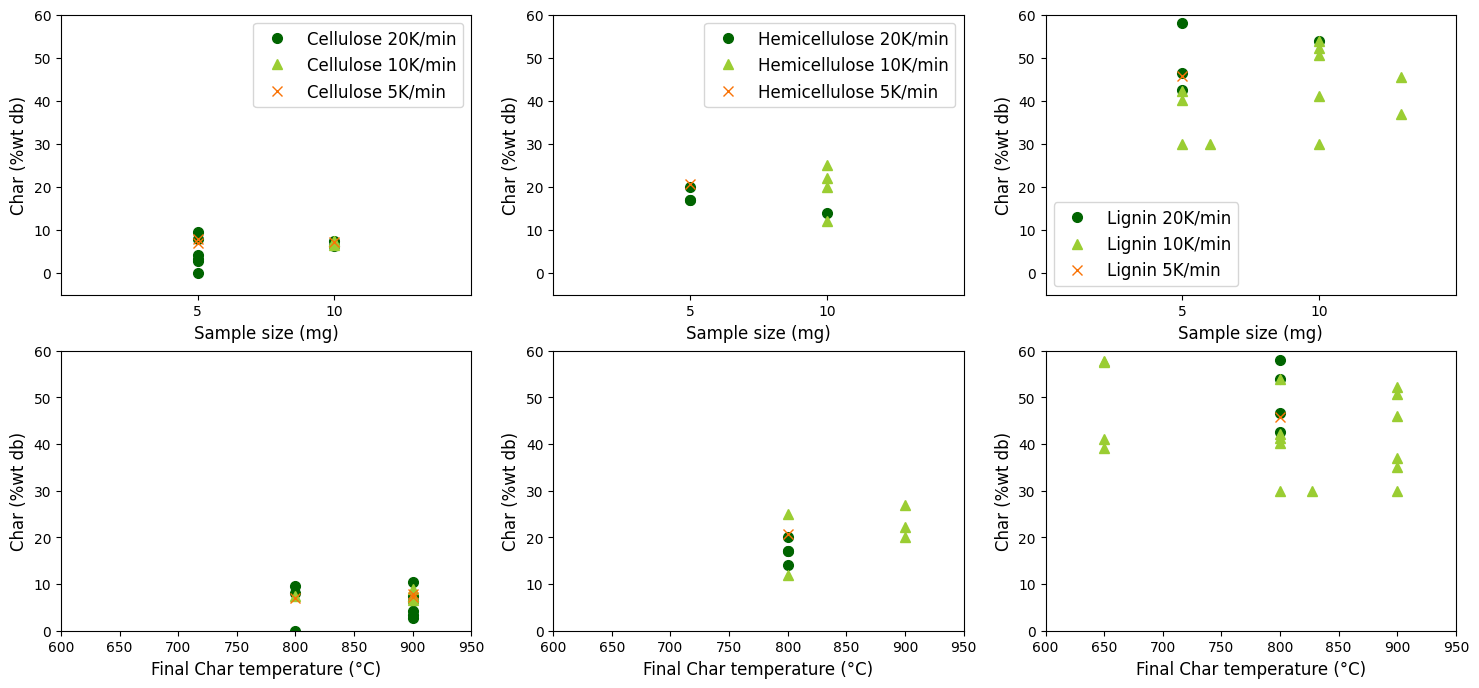

In [21]:
fig = plt.figure(figsize=(18,8))

ax2 = fig.add_subplot(2, 3, 1)
plot_charref('Cellulose','Sample size (mg)','Sample size (mg)')
plt.xlim([0,15])
plt.xticks([5,10])
plt.ylim([-5,60])

ax2 = plt.gca()
handles, labels = ax2.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax2.legend(new_handles, labels, loc='best', fontsize=fz)

ax2 = fig.add_subplot(2, 3, 2)
plot_charref('Hemicellulose','Sample size (mg)','Sample size (mg)')
plt.xlim([0,15])
plt.xticks([5,10])
plt.ylim([-5,60])

ax2 = plt.gca()
handles, labels = ax2.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax2.legend(new_handles, labels, loc='best', fontsize=fz)

ax2 = fig.add_subplot(2, 3, 3)
plot_charref('Lignin','Sample size (mg)','Sample size (mg)')
plt.xlim([0,15])
plt.xticks([5,10])
plt.ylim([-5,60])

ax2 = plt.gca()
handles, labels = ax2.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax2.legend(new_handles, labels, loc='best', fontsize=fz)

ax2 = fig.add_subplot(2, 3, 4)
plot_charref('Cellulose','Final Char temperature (°C)','Final Char temperature (°C)')
plt.xlim([600,950])
plt.ylim([0,60])

ax2 = fig.add_subplot(2, 3, 5)
plot_charref('Hemicellulose','Final Char temperature (°C)','Final Char temperature (°C)')
plt.xlim([600,950])
plt.ylim([0,60])

ax2 = fig.add_subplot(2, 3, 6)
plot_charref('Lignin','Final Char temperature (°C)','Final Char temperature (°C)')
plt.xlim([600,950])
plt.ylim([0,60])



#plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Char_ref_CellHemiLig_scatterplot.png',dpi=300)

6.36
17.0
50.275


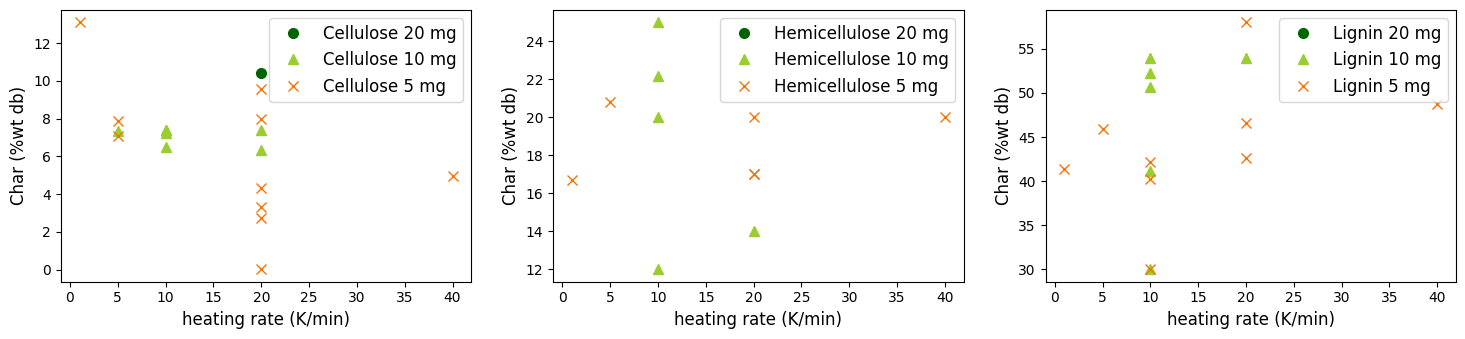

In [22]:
#@title Plot xx VS Char dif sample size

def plot_charref_m(feedstock, xname, xaxisname):

  med = dfChar[(dfChar['NomFeed'] == feedstock) & (dfChar['heating rate (K/min)'] == 20)]['Char (%wt db)'].median()
  print(med)
  #err = dfChar[(dfChar['NomFeed'] == feedstock) & (dfChar['heating rate (K/min)'] == 20)].std()

  plt.errorbar(x = xname, y = 'Char (%wt db)', data = dfChar[(dfChar['NomFeed'] == feedstock) & (dfChar['Sample size (mg)'] == 20)], label = feedstock + ' 20 mg', **marker1)
  plt.errorbar(x = xname, y = 'Char (%wt db)', data = dfChar[(dfChar['NomFeed'] == feedstock) & (dfChar['Sample size (mg)'] == 10)], label = feedstock + ' 10 mg', **marker2)
  plt.errorbar(x = xname, y = 'Char (%wt db)', data = dfChar[(dfChar['NomFeed'] == feedstock) & (dfChar['Sample size (mg)'] == 5)], label = feedstock + ' 5 mg', **marker3)
  #plt.errorbar(x = xname, y = med, label = feedstock + ' 20 mg', **marker1)

  plt.xlabel(xaxisname, fontsize=fz)
  plt.ylabel('Char (%wt db)', fontsize=fz)
  #plt.xlim([0,25])
  #plt.ylim([0,30])

  ax2 = plt.gca()
  handles, labels = ax2.get_legend_handles_labels()
  new_handles = []
  for h in handles:
      if isinstance(h, container.ErrorbarContainer):
          new_handles.append(h[0])
      else:
          new_handles.append(h)
  ax2.legend(new_handles, labels, loc='best', fontsize=fz)

# plot
fig = plt.figure(figsize=(18,12))

ax2 = fig.add_subplot(3, 3, 1)
plot_charref_m('Cellulose','heating rate (K/min)','heating rate (K/min)')

ax2 = fig.add_subplot(3, 3, 2)
plot_charref_m('Hemicellulose','heating rate (K/min)','heating rate (K/min)')

ax2 = fig.add_subplot(3, 3, 3)
plot_charref_m('Lignin','heating rate (K/min)','heating rate (K/min)')



In [23]:
#@title Char Mean Median



med2 = dfChar.loc[(dfChar['Sample size (mg)'].isin([5,10]))&(dfChar['heating rate (K/min)'].isin([5,10,20]))].groupby('NomFeed').agg({'Char (%wt db)':[numpy.median,numpy.mean,numpy.std]})
#med3 = dfChar[(dfChar['Sample size (mg)'] == 10)].groupby('NomFeed').agg({'Char (%wt db)':[numpy.median,numpy.mean,numpy.std]})
#med4 = dfChar[(dfChar['Sample size (mg)'] == 10)&(dfChar['heating rate (K/min)'] == 20)].groupby('NomFeed').agg({'Char (%wt db)':[numpy.median,numpy.mean,numpy.std]})
#med = dfChar[(dfChar['heating rate (K/min)'] == 20)].groupby('NomFeed').agg({'Char (%wt db)':[numpy.median,numpy.mean,numpy.std]})
#print(med2,'\n', med3,'\n', med4)
print(med2)

              Char (%wt db)                     
                     median       mean       std
NomFeed                                         
Cellulose              7.26   6.170000  2.498505
Hemicellulose         20.00  18.666667  4.069398
Lignin                45.87  45.193846  8.751576
Starch                15.00  15.000000       NaN


In [24]:
#@title Charfrac Cell, Hemicell, Lig

Cell_Charfrac = med2['Char (%wt db)']['median']['Cellulose']
Hemi_Charfrac = med2['Char (%wt db)']['median']['Hemicellulose']
Lig_Charfrac = med2['Char (%wt db)']['median']['Lignin']

print(Cell_Charfrac, Hemi_Charfrac, Lig_Charfrac)

7.26 20.0 45.87


In [25]:
dfprint = dfChar.loc[(dfChar['Sample size (mg)'].isin([5,10]))&(dfChar['heating rate (K/min)'].isin([5,10,20]))].groupby('NomFeed').quantile([0.01, 0.25, 0.5, 0.75, 0.99])

print(dfprint['Char (%wt db)']['Cellulose'][0.75]-dfprint['Char (%wt db)']['Cellulose'][0.25])
print(dfprint['Char (%wt db)']['Hemicellulose'][0.75]-dfprint['Char (%wt db)']['Hemicellulose'][0.25])
print(dfprint['Char (%wt db)']['Lignin'][0.75]-dfprint['Char (%wt db)']['Lignin'][0.25])
print(dfprint['Char (%wt db)'])

err_Cell_Charfrac = (dfprint['Char (%wt db)']['Cellulose'][0.75]-dfprint['Char (%wt db)']['Cellulose'][0.25])/2
err_Hemi_Charfrac = (dfprint['Char (%wt db)']['Hemicellulose'][0.75]-dfprint['Char (%wt db)']['Hemicellulose'][0.25])/2
err_Lig_Charfrac = (dfprint['Char (%wt db)']['Lignin'][0.75]-dfprint['Char (%wt db)']['Lignin'][0.25])/2
print(err_Cell_Charfrac,err_Hemi_Charfrac, err_Lig_Charfrac)

2.08
3.8000000000000007
11.0
NomFeed            
Cellulose      0.01     0.3936
               0.25     5.3300
               0.50     7.2600
               0.75     7.4100
               0.99     9.3588
Hemicellulose  0.01    12.1600
               0.25    17.0000
               0.50    20.0000
               0.75    20.8000
               0.99    24.7760
Lignin         0.01    30.0000
               0.25    41.2000
               0.50    45.8700
               0.75    52.2000
               0.99    57.5200
Starch         0.01    15.0000
               0.25    15.0000
               0.50    15.0000
               0.75    15.0000
               0.99    15.0000
Name: Char (%wt db), dtype: float64
1.04 1.9000000000000004 5.5


In [26]:
print(CharRef['Ref'].loc[(dfChar['Sample size (mg)'].isin([5,10]))&(dfChar['heating rate (K/min)'].isin([5,10,20]))&(dfChar['NomFeed']=='Cellulose')],'\n\n')
print(CharRef['Ref'].loc[(dfChar['Sample size (mg)'].isin([5,10]))&(dfChar['heating rate (K/min)'].isin([5,10,20]))&(dfChar['NomFeed']=='Hemicellulose')],'\n\n')
print(CharRef['Ref'].loc[(dfChar['Sample size (mg)'].isin([5,10]))&(dfChar['heating rate (K/min)'].isin([5,10,20]))&(dfChar['NomFeed']=='Lignin')])

4           Chen2020
5           Yang2007
6          Zhang2016
8     Stefanidis2014
9           Chen2020
10           Lai2018
11          Chen2019
13          Our work
14          Our work
15          Our work
17          Our work
18          Our work
19          Our work
20          Our work
21          Our work
Name: Ref, dtype: object 


23          Chen2020
24          Chen2020
27          Yang2007
28         Zhang2016
30    Stefanidis2014
31          Quan2016
32          Quan2016
33           Lai2018
34          Chen2019
Name: Ref, dtype: object 


36          Chen2020
37          Chen2020
39          Yang2007
41         Zhang2016
42    Stefanidis2014
43          Quan2016
44           Han2019
45           Han2019
50          Quan2016
51           Lai2018
52          Chen2019
54           Yan2016
55           Zhu2019
Name: Ref, dtype: object


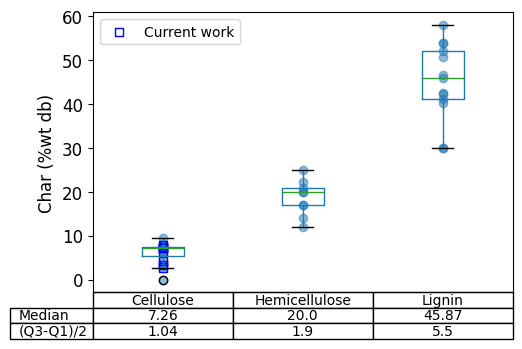

In [27]:
#@title Boxplot char

dfChar = CharRef[['NomFeed','heating rate (K/min)', 'T_peak 1 (°C)',
       'T_peak 2 (°C)', 'T_peak 3 (°C)', 'Char (%wt db)',
       'Final Char temperature (°C)', 'Sample size (mg)','Ash (%wt db)','Ref']]

name = ['Cellulose','Hemicellulose','Lignin']

dftestc = dfChar.loc[(dfChar['NomFeed']=='Cellulose')&dfChar['Sample size (mg)'].isin([5,10])&(dfChar['heating rate (K/min)'].isin([5,10,20]))]['Char (%wt db)']
dftestc2 = dfChar.loc[(dfChar['NomFeed']=='Hemicellulose')&dfChar['Sample size (mg)'].isin([5,10])&(dfChar['heating rate (K/min)'].isin([5,10,20]))]['Char (%wt db)']
dftestc3 = dfChar.loc[(dfChar['NomFeed']=='Lignin')&dfChar['Sample size (mg)'].isin([5,10])&(dfChar['heating rate (K/min)'].isin([5,10,20]))]['Char (%wt db)']
dftestc4 = dfChar.loc[(dfChar['NomFeed']=='Cellulose')&dfChar['Sample size (mg)'].isin([5,10])&(dfChar['heating rate (K/min)'].isin([5,10,20]))&(dfChar['Ref']=='Our work')]['Char (%wt db)']

fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(1, 1, 1)
bplot = dfChar.loc[(dfChar['NomFeed'].isin(name))&dfChar['Sample size (mg)'].isin([5,10])&(dfChar['heating rate (K/min)'].isin([5,10,20]))].boxplot(column=['Char (%wt db)'],by=['NomFeed'],ax=ax2,grid=False, fontsize=fz)

plt.scatter(numpy.repeat(1, dftestc.shape[0]), dftestc.ravel(), marker='o', c='C0', alpha=0.5)
plt.scatter(numpy.repeat(1, dftestc4.shape[0]), dftestc4.ravel(), marker='s', facecolors = 'none', edgecolors='blue', label = 'Current work')
plt.scatter(numpy.repeat(2, dftestc2.shape[0]), dftestc2.ravel(), marker='o', c='C0', alpha=0.5)
plt.scatter(numpy.repeat(3, dftestc3.shape[0]), dftestc3.ravel(), marker='o', c='C0', alpha=0.5)
bplot.set_ylabel('Char (%wt db)', fontsize=fz)
bplot.set_xlabel('')
plt.title('')
plt.suptitle('')
plt.xticks([])
plt.legend()

ax_table = plt.table(cellText=[[Cell_Charfrac,Hemi_Charfrac,Lig_Charfrac],[err_Cell_Charfrac,round(err_Hemi_Charfrac,2),err_Lig_Charfrac]],
          rowLabels=['Median','(Q3-Q1)/2'],
          colLabels=name, cellLoc = 'center',
          loc='bottom')
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Char_ref_CellHemiLig_Boxplot.png',dpi=300,bbox_inches='tight')

In [28]:
#@title Ash median

dfChar = CharRef[['NomFeed','heating rate (K/min)', 'T_peak 1 (°C)',
       'T_peak 2 (°C)', 'T_peak 3 (°C)', 'Char (%wt db)',
       'Final Char temperature (°C)', 'Sample size (mg)','Ash (%wt db)']]

Ashdf = dfChar.groupby('NomFeed').agg({'Ash (%wt db)':[numpy.median]})

dfprint = dfChar.groupby('NomFeed').quantile([0.01, 0.25, 0.5, 0.75, 0.99])
err_Cell_Ashfrac = (dfprint['Ash (%wt db)']['Cellulose'][0.75]-dfprint['Ash (%wt db)']['Cellulose'][0.25])/2
err_Hemi_Ashfrac = (dfprint['Ash (%wt db)']['Hemicellulose'][0.75]-dfprint['Ash (%wt db)']['Hemicellulose'][0.25])/2
err_Lig_Ashfrac = (dfprint['Ash (%wt db)']['Lignin'][0.75]-dfprint['Ash (%wt db)']['Lignin'][0.25])/2

print(Ashdf, err_Cell_Ashfrac, err_Hemi_Ashfrac, err_Lig_Ashfrac)

              Ash (%wt db)
                    median
NomFeed                   
Cellulose         0.010000
Fructose               NaN
Glucose                NaN
Hemicellulose     1.290899
Lignin            2.640000
Pectin                 NaN
Starch                 NaN
Straw                  NaN
Sucrose                NaN
Sugarcane              NaN 0.08174243225 0.40955074449999995 5.2475000000000005


In [29]:
Ashdf['Ash (%wt db)']['median']['Cellulose']

0.01

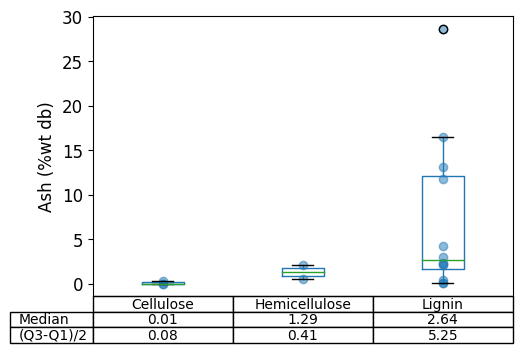

In [30]:
#@title Plot ash content

name = ['Cellulose','Hemicellulose','Lignin']

dftest = dfChar.loc[(dfChar['NomFeed']=='Cellulose')]['Ash (%wt db)']
dftest2 = dfChar.loc[(dfChar['NomFeed']=='Hemicellulose')]['Ash (%wt db)']
dftest3 = dfChar.loc[(dfChar['NomFeed']=='Lignin')]['Ash (%wt db)']

fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(1, 1, 1)
bplot = dfChar.loc[(dfChar['NomFeed'].isin(name))].boxplot(column=['Ash (%wt db)'],by=['NomFeed'],ax=ax2,grid=False, fontsize=fz)
plt.scatter(numpy.repeat(1, dftest.shape[0]), dftest.ravel(), marker='o', c='C0', alpha=0.5)
plt.scatter(numpy.repeat(2, dftest2.shape[0]), dftest2.ravel(), marker='o', c='C0', alpha=0.5)
plt.scatter(numpy.repeat(3, dftest3.shape[0]), dftest3.ravel(), marker='o', c='C0', alpha=0.5)
bplot.set_ylabel('Ash (%wt db)', fontsize=fz)
bplot.set_xlabel('')
plt.title('')
plt.suptitle('')
plt.xticks([])

ax_table = plt.table(cellText=[[round(Ashdf['Ash (%wt db)']['median']['Cellulose'],2),
                                round(Ashdf['Ash (%wt db)']['median']['Hemicellulose'],2),
                                round(Ashdf['Ash (%wt db)']['median']['Lignin'],2)],
                               [round(err_Cell_Ashfrac,2),round(err_Hemi_Ashfrac,2),round(err_Lig_Ashfrac,2)]],
          rowLabels=['Median','(Q3-Q1)/2'],
          colLabels=name, cellLoc = 'center',
          loc='bottom')
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Ash_ref_CellHemiLig_Boxplot.png',dpi=300,bbox_inches='tight')

# 6) Archive

Text(0.5, 0.98, '')

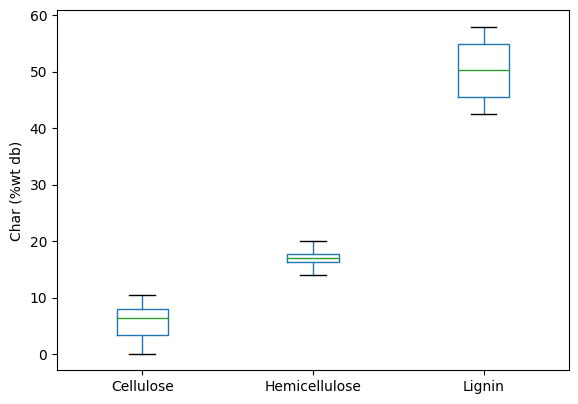

In [ ]:

bplot = dfChar[(dfChar['heating rate (K/min)'] == 20)&(dfChar['NomFeed']!='Starch')].boxplot(column=['Char (%wt db)'],by=['NomFeed'],grid=False)
bplot.set_ylabel('Char (%wt db)')
bplot.set_xlabel('')
plt.title('')
plt.suptitle('')
#plt.savefig(

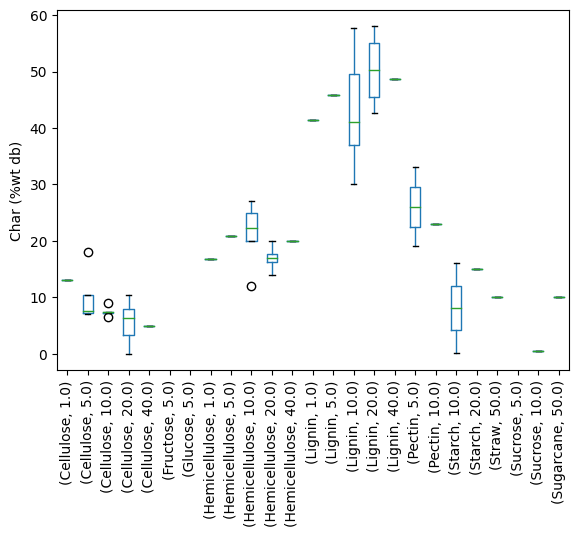

In [ ]:
bplot = dfChar.boxplot(column=['Char (%wt db)'],by=['NomFeed','heating rate (K/min)'],grid=False,rot=90)
bplot.set_ylabel('Char (%wt db)')
bplot.set_xlabel('')
plt.title('')
plt.suptitle('')
#plt.xlabel()
plt.show()

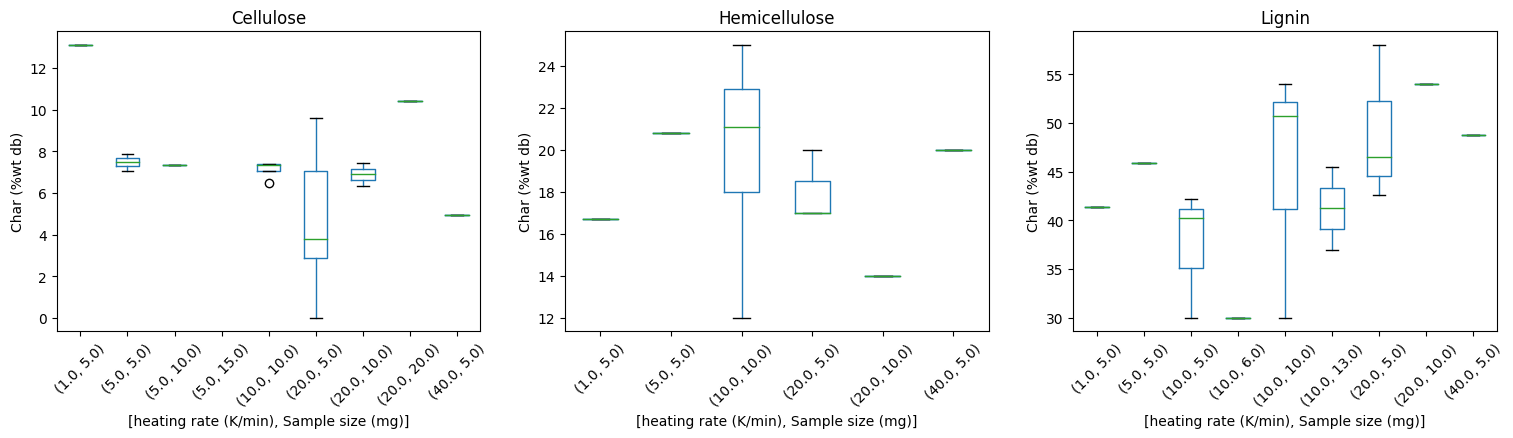

In [ ]:

def boxplot_char(feedname,n):

  bplot = dfChar[(dfChar['NomFeed']==feedname)].boxplot(column=['Char (%wt db)'],by=['heating rate (K/min)','Sample size (mg)'],grid=False, ax=axes[n],rot=45)
  bplot.set_ylabel('Char (%wt db)')
  #bplot.set_xlabel('Heating rate (K/min)')
  bplot.set_title(feedname)
  plt.suptitle('')


fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(18,4)) # create 2x2 array of subplots

boxplot_char('Cellulose',0)
boxplot_char('Hemicellulose',1)
boxplot_char('Lignin',2)

plt.show()

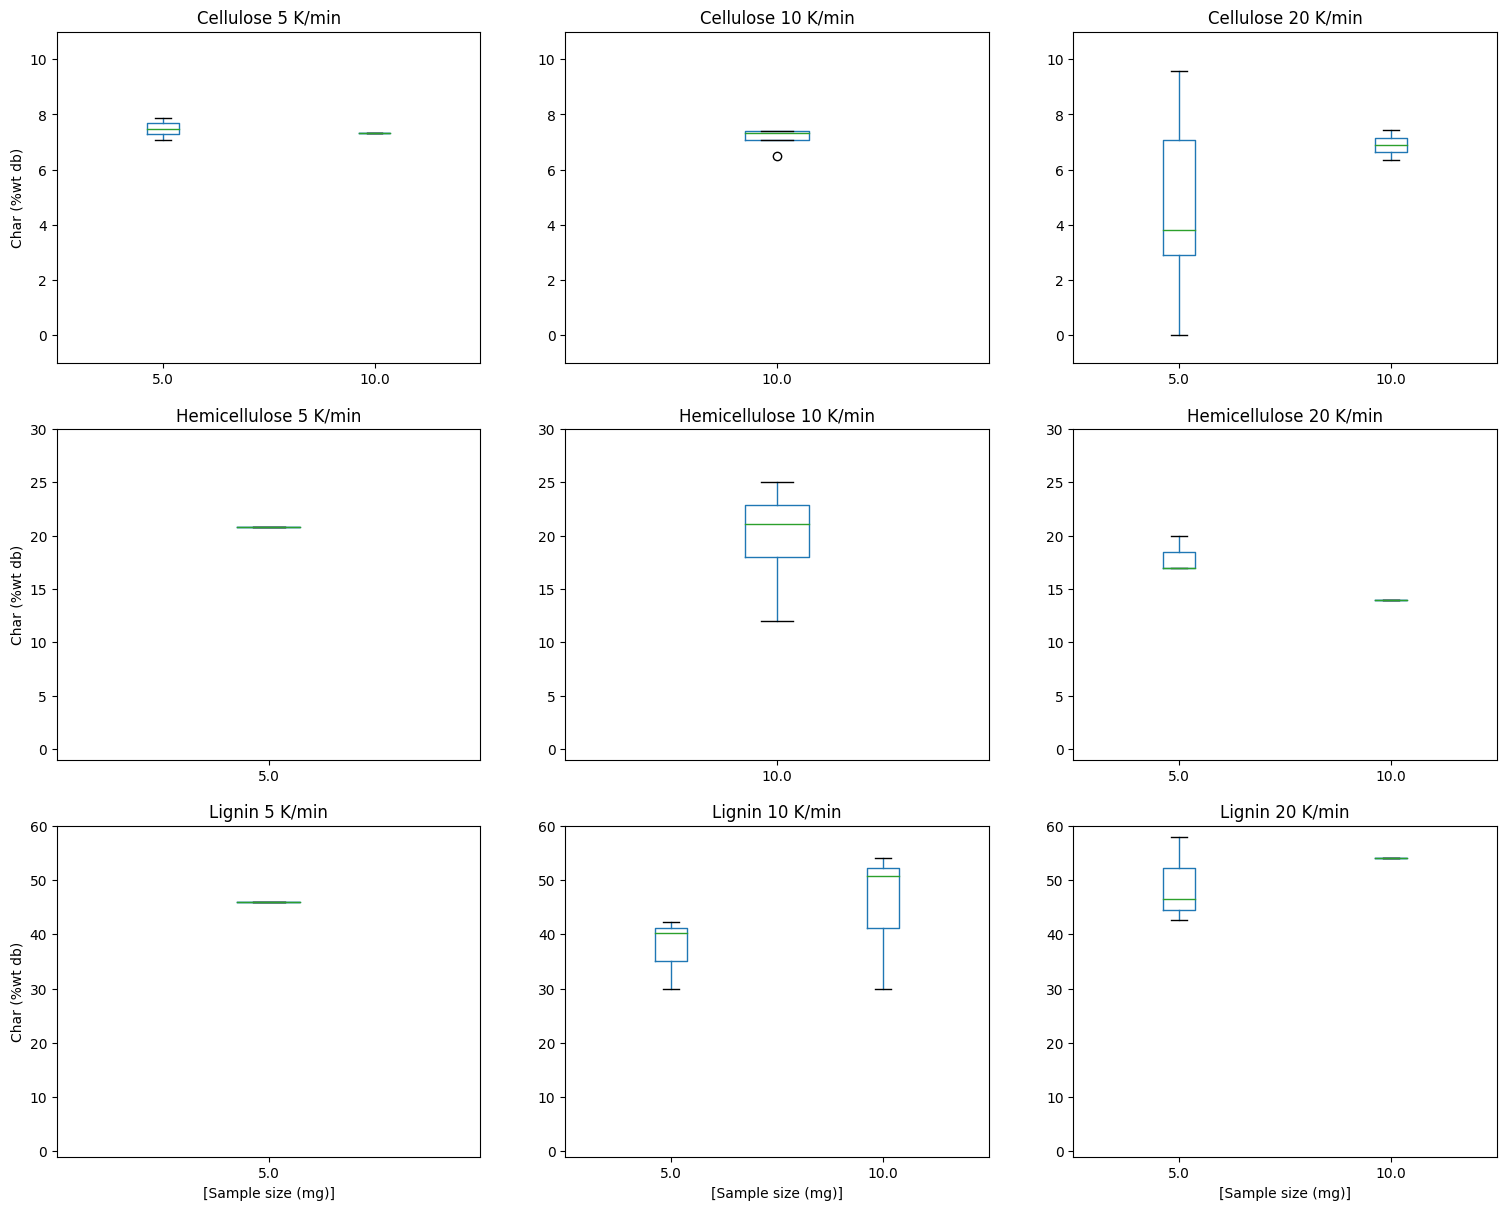

In [ ]:

dfChar = dfChar.loc[dfChar['Sample size (mg)'].isin([5,10])]

def boxplot_char2(feedname,n,yminn,ymaxx,ll):

  ax2 = fig.add_subplot(3, 3, n)
  bplot = dfChar[(dfChar['NomFeed']==feedname)&(dfChar['heating rate (K/min)']==5)].boxplot(column=['Char (%wt db)'],by=['Sample size (mg)'],grid=False,ax=ax2)
  bplot.set_ylabel('Char (%wt db)')
  if ll ==0: bplot.set_xlabel('')
  bplot.set_ylim(ymin=yminn, ymax=ymaxx)
  plt.title(feedname + ' 5 K/min')

  ax2 = fig.add_subplot(3, 3, n+1)
  bplot = dfChar[(dfChar['NomFeed']==feedname)&(dfChar['heating rate (K/min)']==10)].boxplot(column=['Char (%wt db)'],by=['Sample size (mg)'],grid=False,ax=ax2)
  #bplot.set_ylabel('Char (%wt db)')
  if ll ==0: bplot.set_xlabel('')
  bplot.set_ylim(ymin=yminn, ymax=ymaxx)
  plt.title(feedname + ' 10 K/min')

  ax2 = fig.add_subplot(3, 3, n+2)
  bplot = dfChar[(dfChar['NomFeed']==feedname)&(dfChar['heating rate (K/min)']==20)].boxplot(column=['Char (%wt db)'],by=['Sample size (mg)'],grid=False,ax=ax2)
  #bplot.set_ylabel('Char (%wt db)')
  if ll ==0: bplot.set_xlabel('')
  bplot.set_ylim(ymin=yminn, ymax=ymaxx)
  plt.title(feedname + ' 20 K/min')

  #dfChar[(dfChar['NomFeed']==feedname)&(dfChar['heating rate (K/min)']==10)].boxplot(column=['Char (%wt db)'],by=['Sample size (mg)'],grid=False,rot=45,ax=axes[1])
  #dfChar[(dfChar['NomFeed']==feedname)&(dfChar['heating rate (K/min)']==20)].boxplot(column=['Char (%wt db)'],by=['Sample size (mg)'],grid=False,rot=45,ax=axes[2])
  #dfChar[(dfChar['NomFeed']==feedname)&(dfChar['Sample size (mg)']==10)].boxplot(column=['Char (%wt db)'],by=['heating rate (K/min)'],grid=False,ax=ax,rot=45)
  #bplot.set_xlabel('Heating rate (K/min)')

  plt.suptitle('')

fig = plt.figure(figsize=(18,15))


boxplot_char2('Cellulose',1,-1,11,0)
boxplot_char2('Hemicellulose',4,-1,30,0)
boxplot_char2('Lignin',7,-1,60,1)
#fig.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

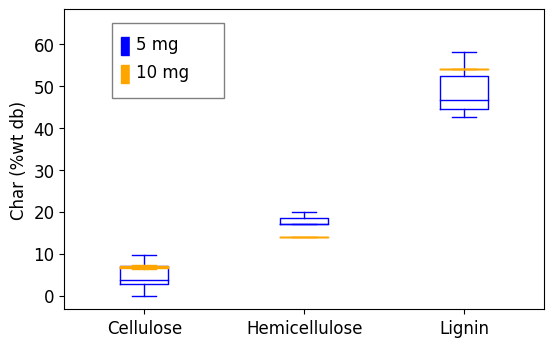

In [ ]:


fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(1, 1, 1)

bplot = dfChar[(dfChar['heating rate (K/min)'] == 20)&(dfChar['NomFeed']!='Starch')&(dfChar['Sample size (mg)'] == 5)].boxplot(column=['Char (%wt db)'],by=['NomFeed'],grid=False,ax=ax2,color='b', fontsize=fz)
bplot.set_ylabel('Char (%wt db)', fontsize=fz)
bplot.set_xlabel('')
bplot.set_xticks([])

dfChar[(dfChar['heating rate (K/min)'] == 20)&(dfChar['NomFeed']!='Starch')&(dfChar['Sample size (mg)'] == 10)].boxplot(column=['Char (%wt db)'],by=['NomFeed'],grid=False,ax=ax2,color='orange', fontsize=fz)

plt.title('')
plt.suptitle('')
#plt.ylabel('Char (%wt db)')
plt.xlabel('')

#label
plt.figtext(0.20, 0.8, ' ', backgroundcolor='b', color='white', weight='roman', size='x-small')
plt.figtext(0.22, 0.8, '5 mg', backgroundcolor='w', color='black', weight='roman', fontsize=fz)
plt.figtext(0.20, 0.73, ' ', backgroundcolor='orange', color='black', weight='roman', size='x-small')
plt.figtext(0.22, 0.73, '10 mg', backgroundcolor='w', color='black', weight='roman', fontsize=fz)
# Create a Rectangle patch
rect = patches.Rectangle((0.8,47), 0.7, 18, linewidth=1, edgecolor='gray', facecolor='none')
ax2.add_patch(rect)

plt.show

<Axes: xlabel='NomFeed', ylabel='Char (%wt db)'>

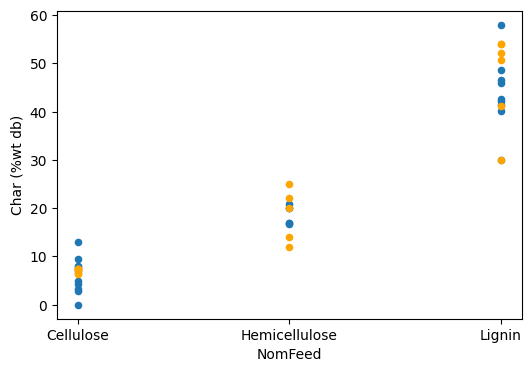

In [ ]:
fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(1, 1, 1)

dfChar[(dfChar['Sample size (mg)'] == 5)&(dfChar['NomFeed']!='Starch')].plot.scatter(x='NomFeed',y='Char (%wt db)',ax=ax2)
dfChar[(dfChar['Sample size (mg)'] == 10)&(dfChar['NomFeed']!='Starch')].plot.scatter(x='NomFeed',y='Char (%wt db)',color='orange',ax=ax2)
#dfChar[(dfChar['heating rate (K/min)'] == 20)&(dfChar['Sample size (mg)'] == 5)&(dfChar['NomFeed']!='Starch')].plot.scatter(x='NomFeed',y='Char (%wt db)',ax=ax2)
#dfChar[(dfChar['heating rate (K/min)'] == 20)&(dfChar['Sample size (mg)'] == 10)&(dfChar['NomFeed']!='Starch')].plot.scatter(x='NomFeed',y='Char (%wt db)',color='orange',ax=ax2)

#)&(dfChar['NomFeed']=='Cellulose')

In [ ]:
dfChar = CharRef[['NomFeed','heating rate (K/min)', 'T_peak 1 (°C)',
       'T_peak 2 (°C)', 'T_peak 3 (°C)', 'Char (%wt db)',
       'Final Char temperature (°C)', 'Sample size (mg)']]

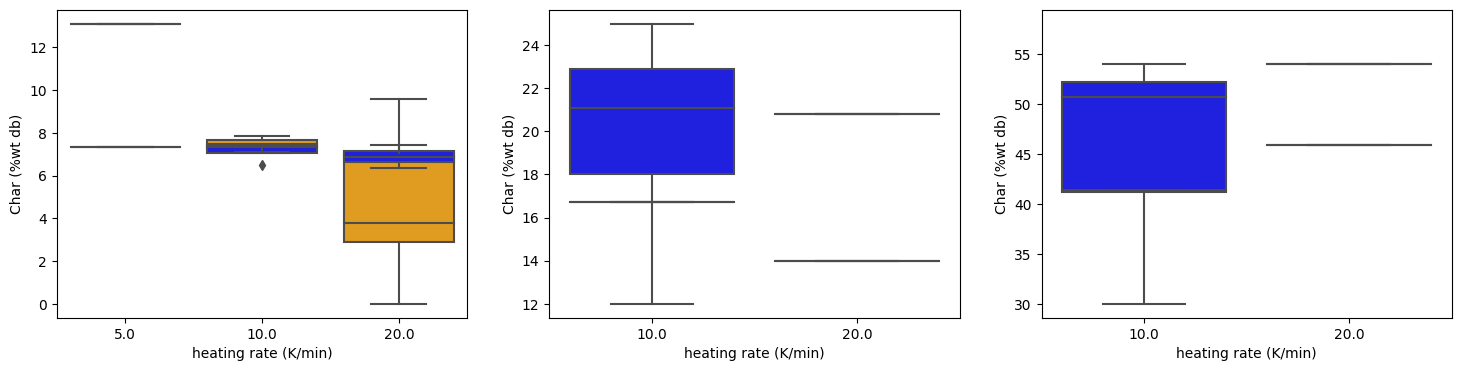

In [ ]:
import seaborn as sns

f, axes = plt.subplots(1, 3,figsize=(18,4))
sns.boxplot(x='heating rate (K/min)',y='Char (%wt db)' ,data=dfChar[(dfChar['NomFeed'] == 'Cellulose')&(dfChar['Sample size (mg)']==5)], color="Orange",ax=axes[0])
sns.boxplot(x='heating rate (K/min)',y='Char (%wt db)' ,data=dfChar[(dfChar['NomFeed'] == 'Cellulose')&(dfChar['Sample size (mg)']==10)], color="Blue",ax=axes[0])
sns.boxplot(x='heating rate (K/min)',y='Char (%wt db)' ,data=dfChar[(dfChar['NomFeed'] == 'Hemicellulose')&(dfChar['Sample size (mg)']==5)], color="Orange",ax=axes[1])
sns.boxplot(x='heating rate (K/min)',y='Char (%wt db)' ,data=dfChar[(dfChar['NomFeed'] == 'Hemicellulose')&(dfChar['Sample size (mg)']==10)], color="Blue",ax=axes[1])
sns.boxplot(x='heating rate (K/min)',y='Char (%wt db)' ,data=dfChar[(dfChar['NomFeed'] == 'Lignin')&(dfChar['Sample size (mg)']==5)], color="Orange",ax=axes[2])
sns.boxplot(x='heating rate (K/min)',y='Char (%wt db)' ,data=dfChar[(dfChar['NomFeed'] == 'Lignin')&(dfChar['Sample size (mg)']==10)], color="Blue",ax=axes[2])
fig.tight_layout()

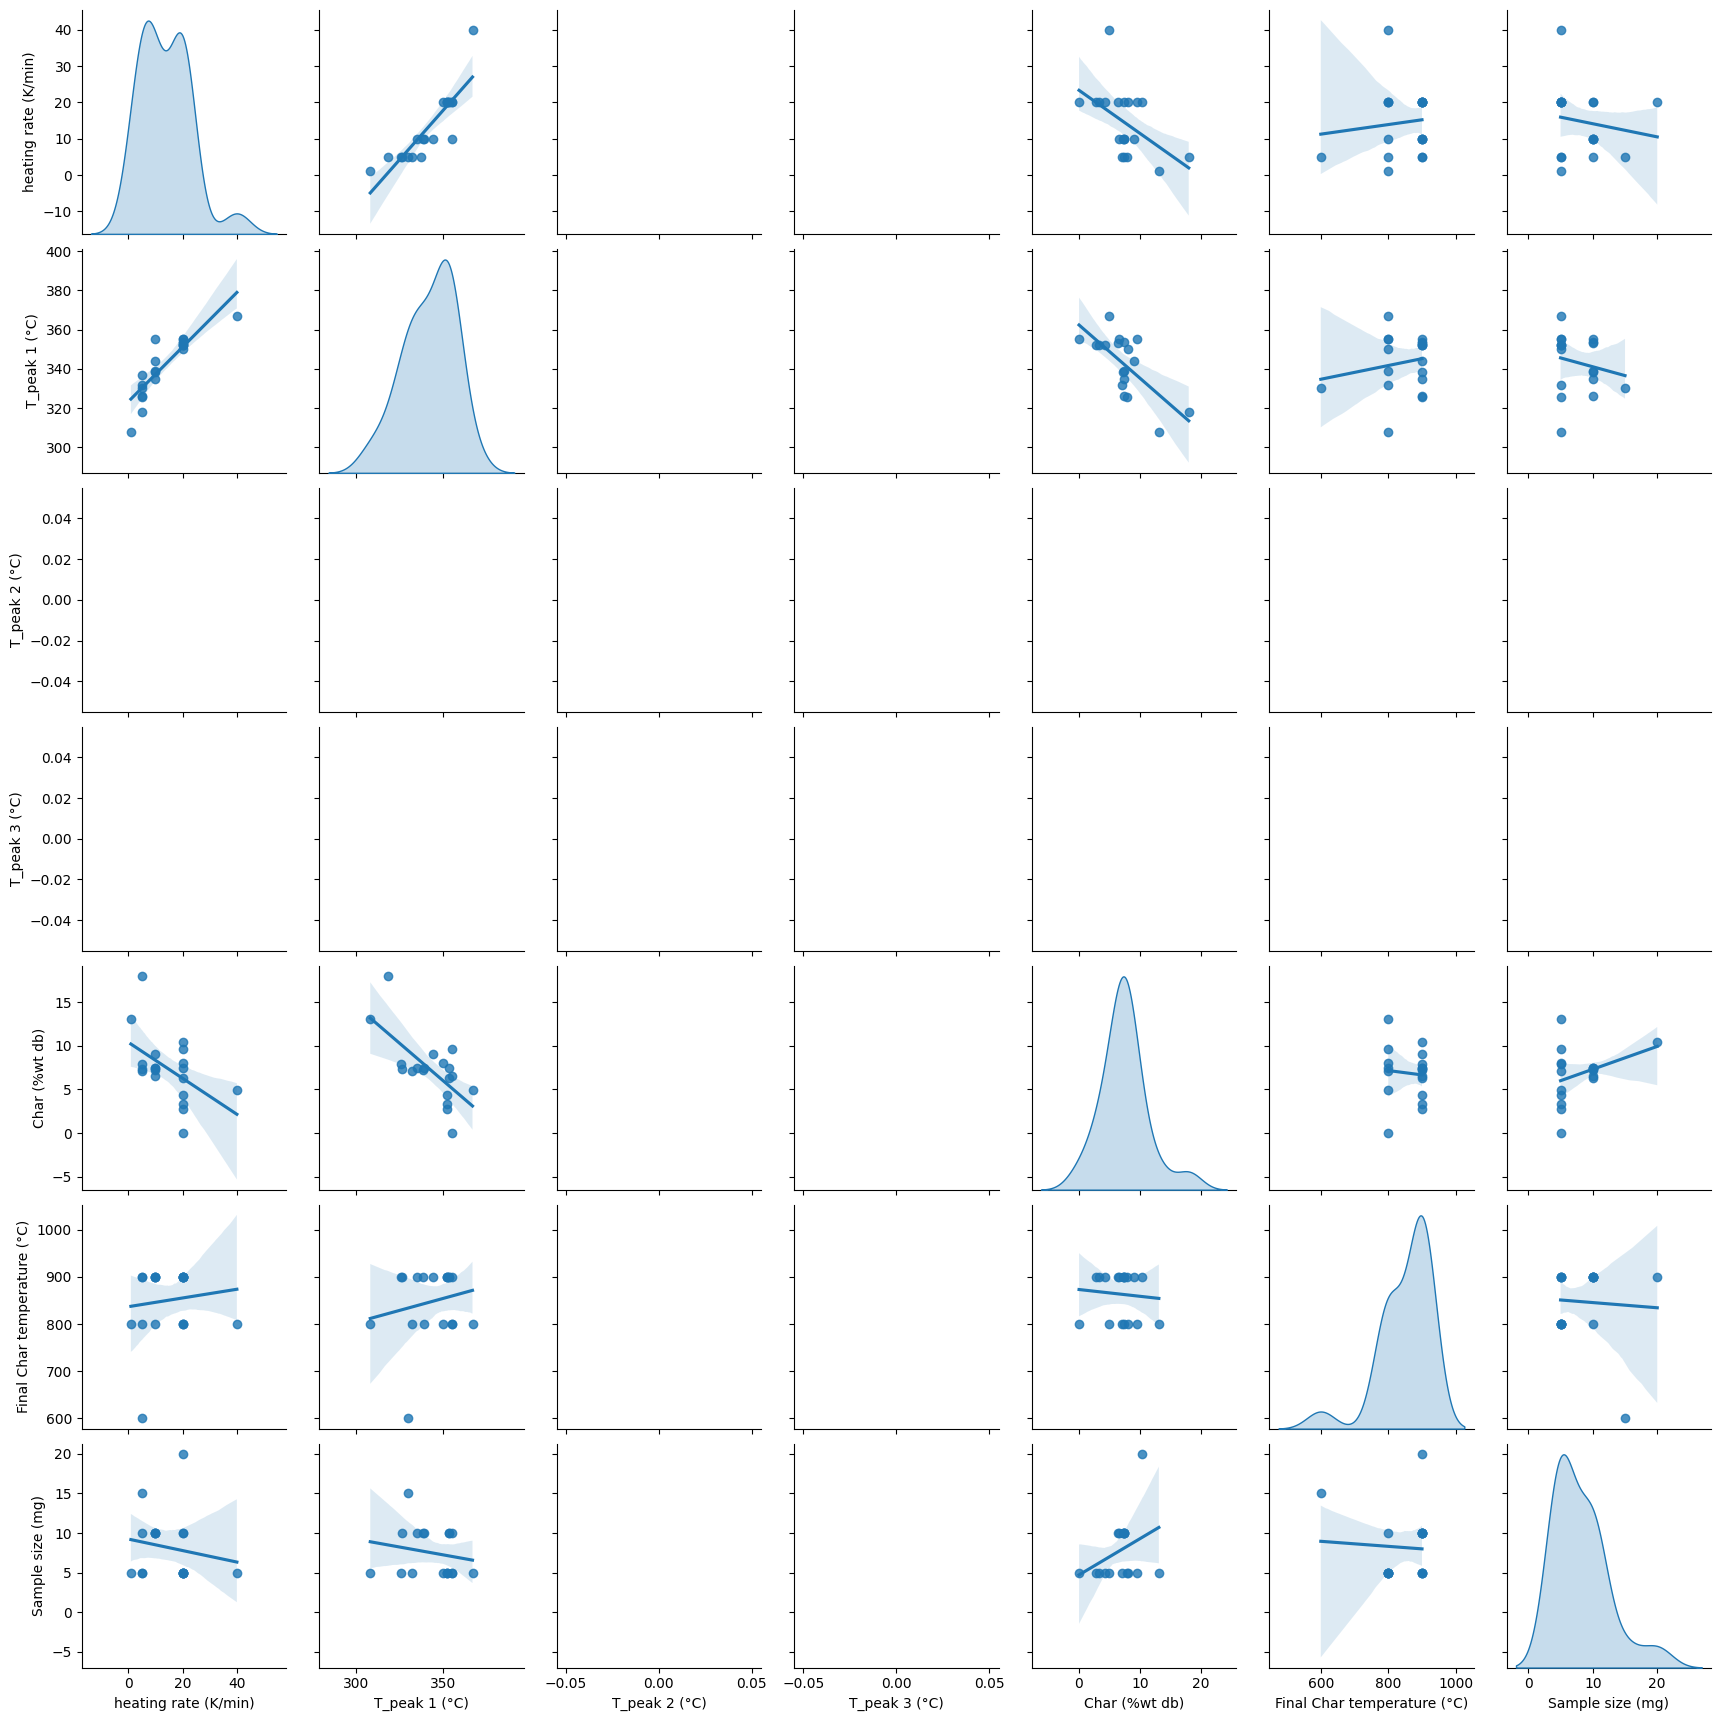

In [ ]:
import seaborn as sns

_ = sns.pairplot(dfChar[(dfChar['NomFeed']=='Cellulose')], kind="reg", diag_kind="kde")


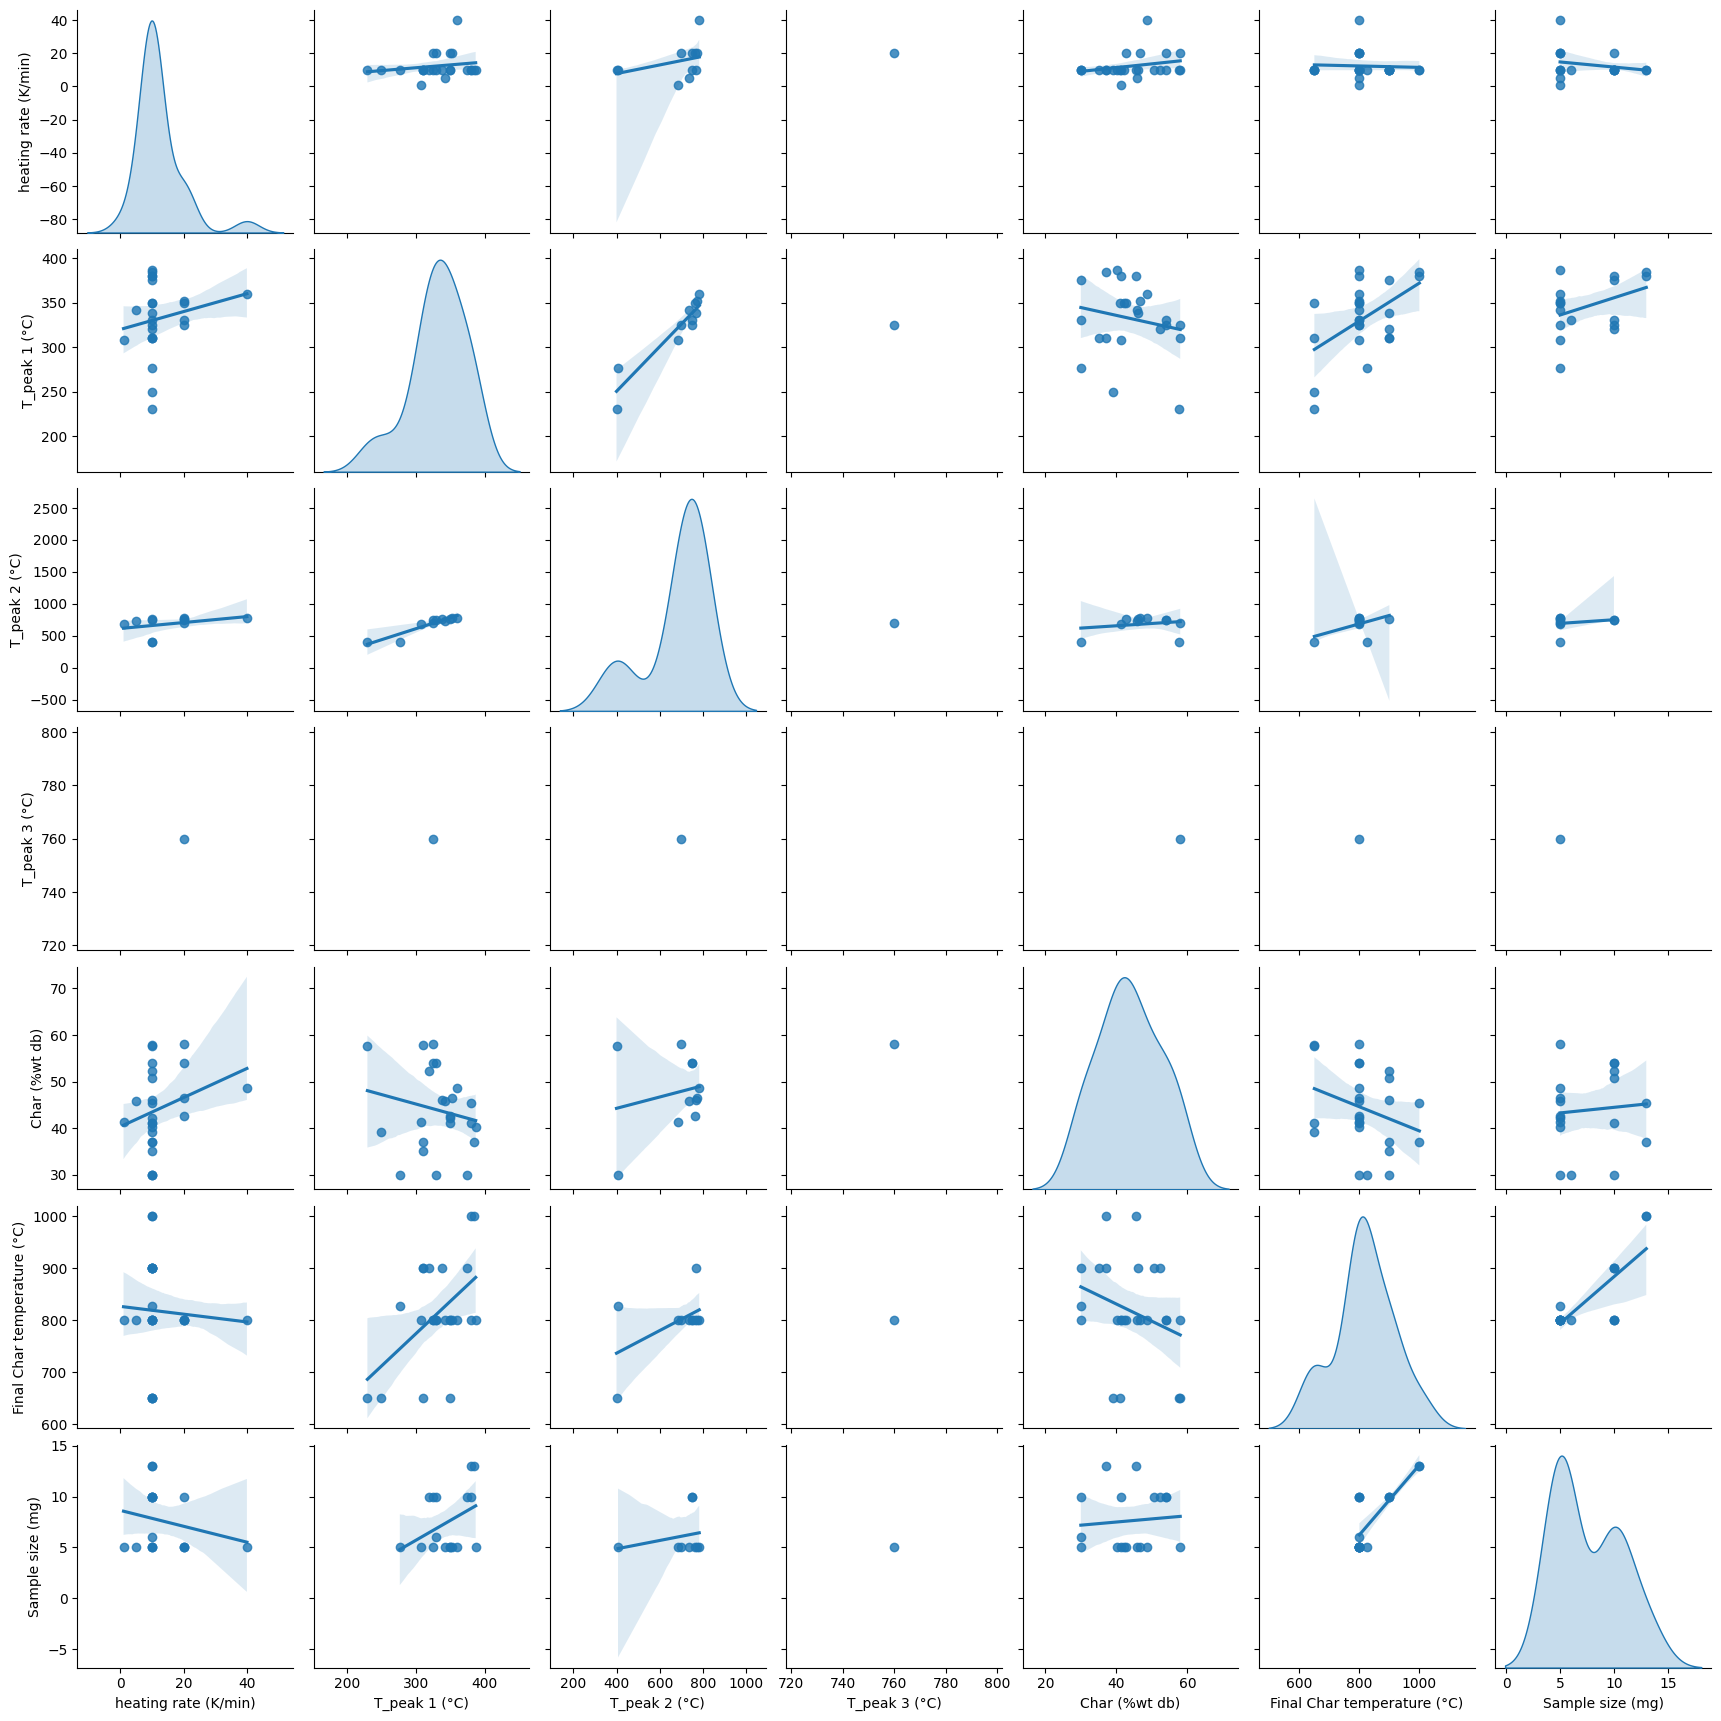

In [ ]:
_ = sns.pairplot(dfChar[(dfChar['NomFeed']=='Lignin')], kind="reg", diag_kind="kde")

KeyboardInterrupt: ignored

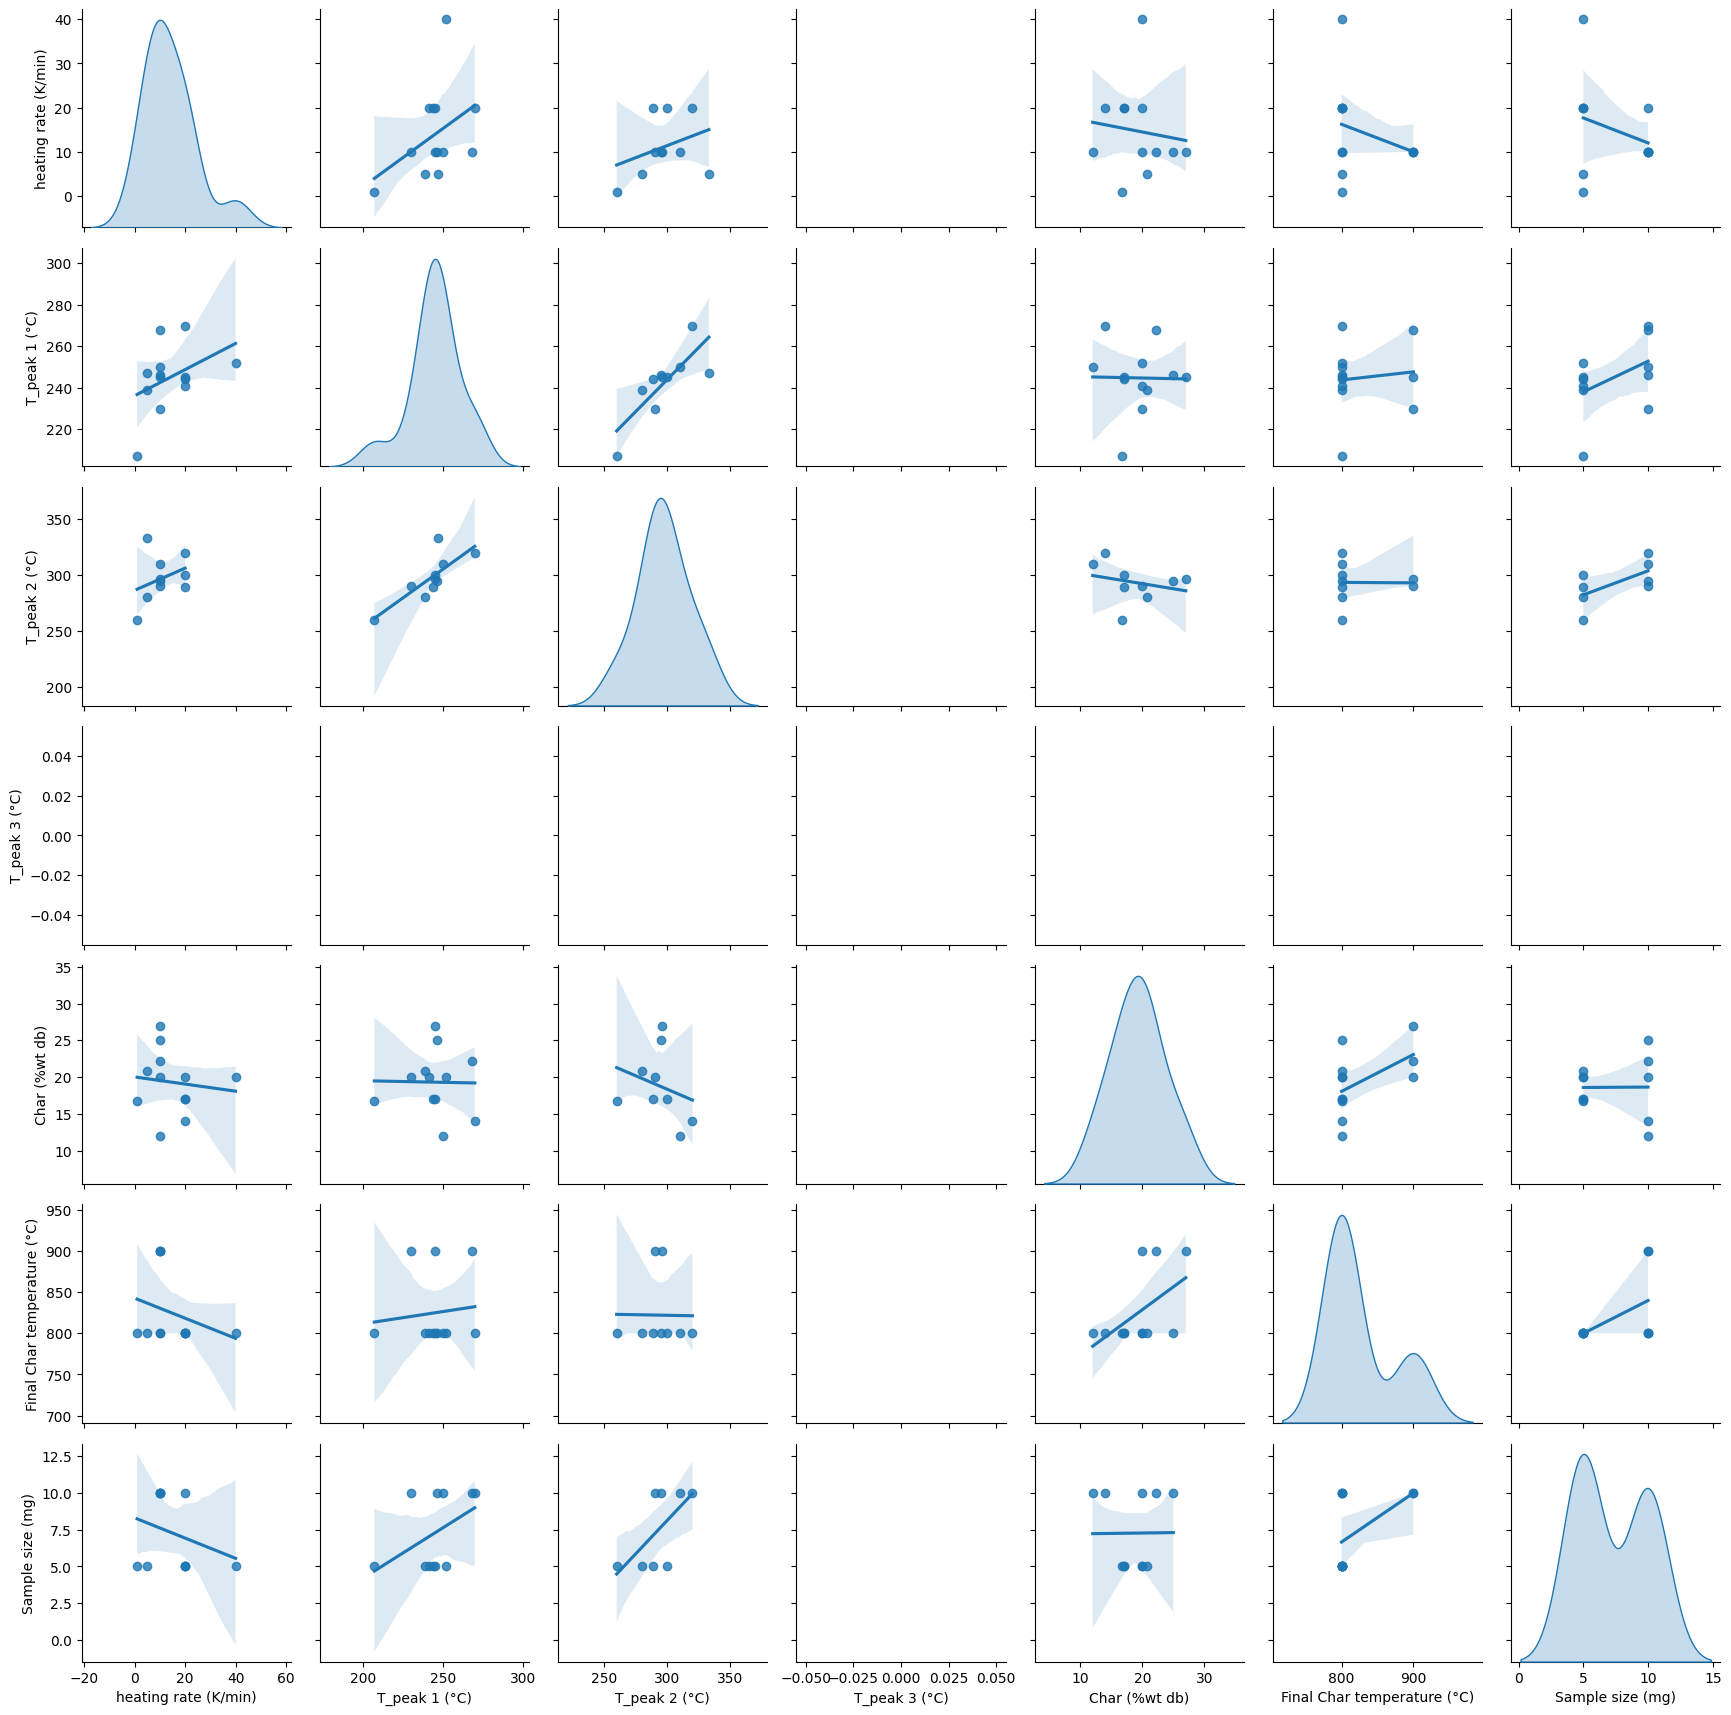

In [ ]:
_ = sns.pairplot(dfChar[(dfChar['NomFeed']=='Hemicellulose')], kind="reg", diag_kind="kde")

# 7) Kinetic prameter from ref

In [4]:
#@title load data

# read file
KinRef = pandas.read_excel('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Ref_kin_data_for_python.xlsx')
#KinRef = pandas.read_csv('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Ref_kin_data_for_python.csv')

KinRef.head()

Name       Ref Heating rate type  Heating rate (K/min)     A (min-1)  \
0  Cellulose  Diez2020            Single                   5.0  3.360000e+18   
1  Cellulose  Diez2020            Single                   5.0  1.010000e+17   
2  Cellulose  Diez2020            Single                   5.0  9.060000e+16   
3  Cellulose  Diez2020            Single                   5.0  1.380000e+17   
4  Cellulose  Diez2020            Single                   5.0  1.160000e+17   

   E (kJ/mol)  n    feedstock            Note  \
0      227.02  1          NaN         table 7   
1      204.74  1    pine bark  fitted table 6   
2      205.17  1  spruce bark  fitted table 6   
3      207.39  1       poplar  fitted table 6   
4      208.03  1       willow  fitted table 6   

                                      Full Reference  
0  D. Díez, A. Urueña, R. Piñero, A. Barrio, and ...  
1  D. Díez, A. Urueña, R. Piñero, A. Barrio, and ...  
2  D. Díez, A. Urueña, R. Piñero, A. Barrio, and ...  
3  D. Díez, A. Urueña, R. Piñero, A. Barrio, and ...  
4  D. Díez, A. Urueña, R. Piñero, A. Barrio, and ...

In [5]:
print(KinRef)

                Name          Ref Heating rate type  Heating rate (K/min)  \
0          Cellulose     Diez2020            Single                   5.0   
1          Cellulose     Diez2020            Single                   5.0   
2          Cellulose     Diez2020            Single                   5.0   
3          Cellulose     Diez2020            Single                   5.0   
4          Cellulose     Diez2020            Single                   5.0   
..               ...          ...               ...                   ...   
132  Starch (potato)  Our results            Single                  10.0   
133  Starch (potato)  Our results            Single                  10.0   
134  Starch (potato)  Our results            Single                  20.0   
135  Starch (potato)  Our results            Single                  20.0   
136  Starch (potato)  Our results            Single                  20.0   

        A (min-1)  E (kJ/mol)  n    feedstock            Note  \
0    3.360

In [6]:
KinRef.columns

Index(['Name', 'Ref', 'Heating rate type', 'Heating rate (K/min)', 'A (min-1)',
       'E (kJ/mol)', 'n', 'feedstock', 'Note', 'Full Reference'],
      dtype='object')

In [7]:
#@title calculate E/log A
KinRef['logA'] = numpy.log10(KinRef['A (min-1)'])

KinRef['E/logA'] = KinRef['E (kJ/mol)']/KinRef['logA']

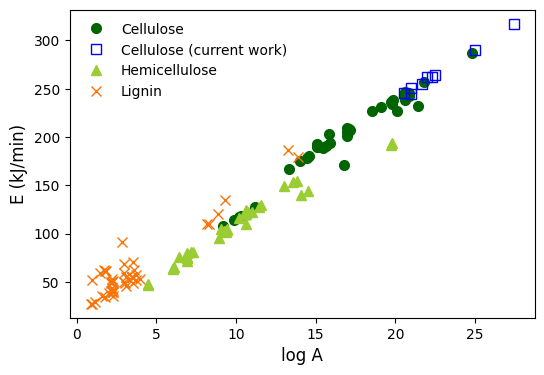

In [8]:
#@title Plot E VS logA

fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(1, 1, 1)
plt.errorbar(x = 'logA', y = 'E (kJ/mol)', data = KinRef[(KinRef['Name'] == 'Cellulose')&(KinRef['Ref']!='Our results')], label = 'Cellulose',**marker1)
plt.errorbar(x = 'logA', y = 'E (kJ/mol)', data = KinRef[(KinRef['Name'] == 'Cellulose')&(KinRef['Ref']=='Our results')], label = 'Cellulose (current work)', **marker4)
plt.errorbar(x = 'logA', y = 'E (kJ/mol)', data = KinRef[(KinRef['Name'] == 'Hemicellulose')], label = 'Hemicellulose', **marker2)
plt.errorbar(x = 'logA', y = 'E (kJ/mol)', data = KinRef[(KinRef['Name'] == 'Lignin')], label = 'Lignin', **marker3)
plt.xlabel('log A', fontsize=fz)
plt.ylabel('E (kJ/min)', fontsize=fz)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False)

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/E_VS_logA.png',dpi=300,bbox_inches='tight')

In [9]:
KinRef[(KinRef['Name'] == 'Cellulose')].describe()


Heating rate (K/min)     A (min-1)  E (kJ/mol)     n       logA  \
count             37.000000  4.600000e+01   46.000000  46.0  46.000000   
mean              13.405405  5.688171e+25  213.426165   1.0  17.962989   
std               10.706850  3.832988e+26   47.482897   0.0   4.160375   
min                1.000000  1.560000e+09  108.000000   1.0   9.193125   
25%                5.000000  2.026500e+15  189.675000   1.0  15.291490   
50%               10.000000  1.749000e+18  218.010000   1.0  17.833109   
75%               20.000000  7.082876e+20  245.268829   1.0  20.850193   
max               50.000000  2.600000e+27  317.363825   1.0  27.414973   

          E/logA  
count  46.000000  
mean   11.905429  
std     0.475273  
min    10.191826  
25%    11.648022  
50%    11.934917  
75%    12.189848  
max    12.841977

Cellulose [218.01 218.01] 108.0 317.3638253
Hemicellulose [105.19 105.19] 46.5 154.8
Lignin [53.36 53.36] 27.4 70.8


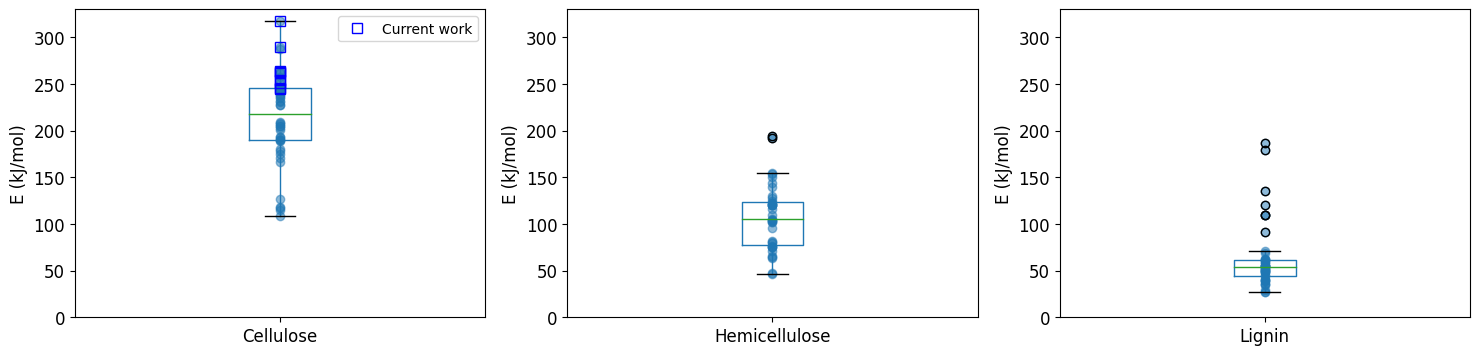

In [31]:
def boxplot_indv(feedstock):
  dftest = KinRef[(KinRef['Name']==feedstock)]['E (kJ/mol)']
  #dftest = KinRef[(KinRef['Name']==feedstock)&(KinRef['Heating rate (K/min)'].isin([1,4.5,5,10,20]))]['E (kJ/mol)']
  bplot, bp = pandas.DataFrame(dftest).rename(columns={"E (kJ/mol)": feedstock}).boxplot(ax=ax2, grid=False, return_type='both',fontsize=fz)
  plt.scatter(numpy.repeat(1, dftest.shape[0]), dftest.ravel(), marker='o', alpha=0.5)
  bplot.set_ylabel('E (kJ/mol)', fontsize=fz)
  medians = [median.get_ydata() for median in bp["medians"]]
  whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
  print(feedstock, medians[0], whiskers[0][1], whiskers[1][1])

ind = numpy.zeros(len(KinRef[(KinRef['Name'] == 'Cellulose')&(KinRef['Ref']=='Our results')]))+1

fig = plt.figure(figsize=(18,4))
ax2 = fig.add_subplot(1, 3, 1)
boxplot_indv('Cellulose')
plt.errorbar(x = ind, y = 'E (kJ/mol)', data = KinRef[(KinRef['Name'] == 'Cellulose')&(KinRef['Ref']=='Our results')], label = 'Current work', **marker4)
plt.ylim([0,330])
plt.legend()

ax2 = fig.add_subplot(1, 3, 2)
boxplot_indv('Hemicellulose')
plt.ylim([0,330])

ax2 = fig.add_subplot(1, 3, 3)
boxplot_indv('Lignin')
plt.ylim([0,330])

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/E_boxplot_indv.png',dpi=300,bbox_inches='tight')

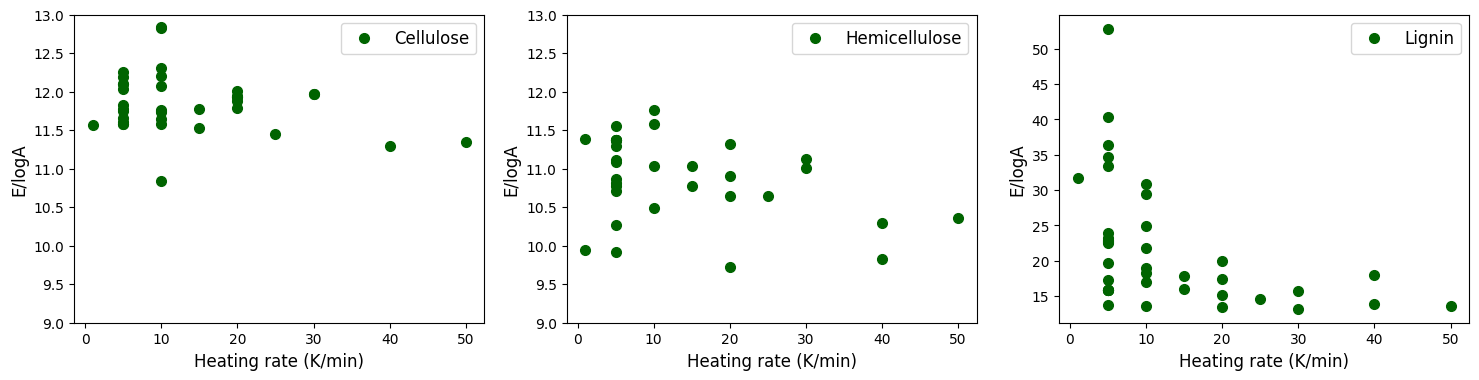

In [11]:
#@title Plot heating rate (E/logA)

def plotkin(feedstock):
  plt.errorbar(x = 'Heating rate (K/min)', y = 'E/logA', data = KinRef[(KinRef['Name'] == feedstock)], label = feedstock, **marker1)
  plt.xlabel('Heating rate (K/min)', fontsize=fz)
  plt.ylabel('E/logA', fontsize=fz)

  ax = plt.gca()
  handles, labels = ax.get_legend_handles_labels()
  new_handles = []
  for h in handles:
      if isinstance(h, container.ErrorbarContainer):
          new_handles.append(h[0])
      else:
          new_handles.append(h)
  ax.legend(new_handles, labels, loc='best', fontsize=fz)


fig = plt.figure(figsize=(18,4))

ax2 = fig.add_subplot(1, 3, 1)
plotkin('Cellulose')
plt.ylim([9,13])
ax2 = fig.add_subplot(1, 3, 2)
plotkin('Hemicellulose')
plt.ylim([9,13])
ax2 = fig.add_subplot(1, 3, 3)
plotkin('Lignin')

#plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/E2logA_heating_rate.png',dpi=300,bbox_inches='tight') #, pad_inches=0

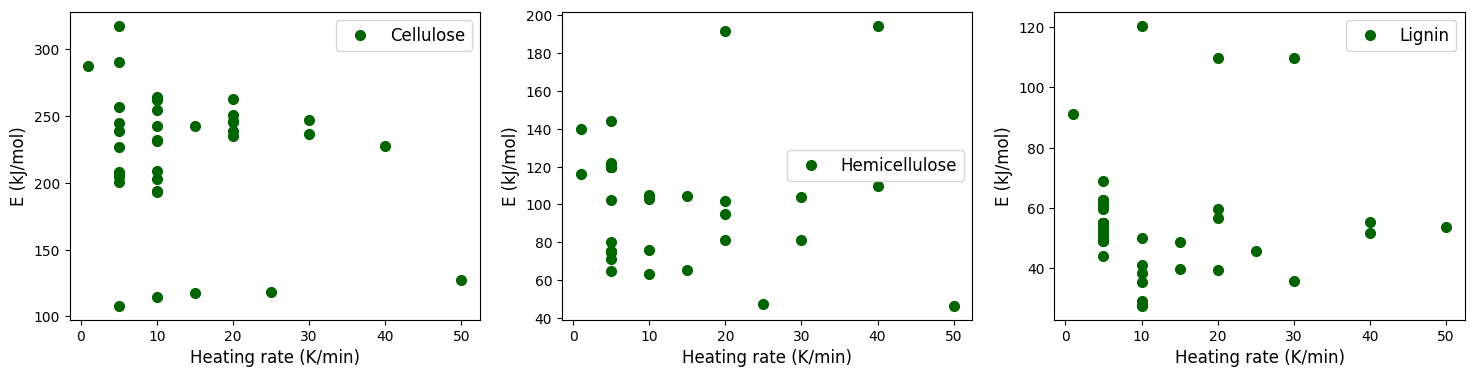

In [12]:
#@title Plot heating rate (E)

def plotkin(feedstock):
  plt.errorbar(x = 'Heating rate (K/min)', y = 'E (kJ/mol)', data = KinRef[(KinRef['Name'] == feedstock)], label = feedstock, **marker1)
  plt.xlabel('Heating rate (K/min)', fontsize=fz)
  plt.ylabel('E (kJ/mol)', fontsize=fz)

  ax = plt.gca()
  handles, labels = ax.get_legend_handles_labels()
  new_handles = []
  for h in handles:
      if isinstance(h, container.ErrorbarContainer):
          new_handles.append(h[0])
      else:
          new_handles.append(h)
  ax.legend(new_handles, labels, loc='best', fontsize=fz)


fig = plt.figure(figsize=(18,4))

ax2 = fig.add_subplot(1, 3, 1)
plotkin('Cellulose')
#plt.ylim([9,13])
ax2 = fig.add_subplot(1, 3, 2)
plotkin('Hemicellulose')
#plt.ylim([9,13])
ax2 = fig.add_subplot(1, 3, 3)
plotkin('Lignin')

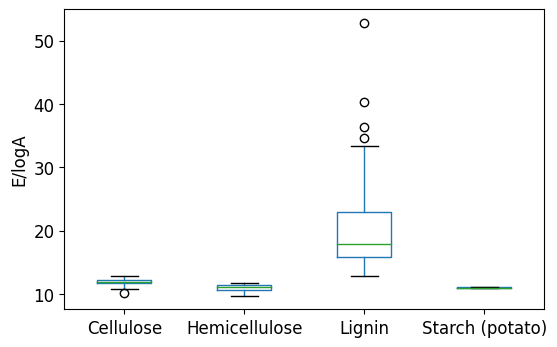

In [13]:
#@title Boxplot all

fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(1, 1, 1)
bplot = KinRef.boxplot(column=['E/logA'],by=['Name'],ax=ax2,grid=False, fontsize=fz)

bplot.set_ylabel('E/logA', fontsize=fz)
bplot.set_xlabel('')
plt.title('')
plt.suptitle('')
plt.show()


Cellulose [array([11.93491739, 11.93491739])] 10.84128678873818 12.841976920471183
Hemicellulose [array([11.08237661, 11.08237661])] 9.72744203516246 11.760524386648006
Lignin [array([17.83268394, 17.83268394])] 12.889754919261234 33.425205042647


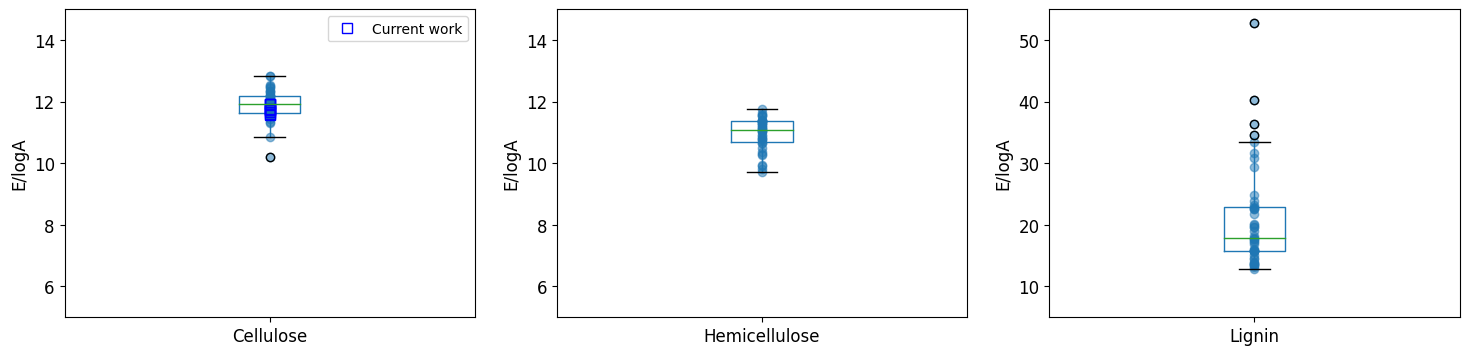

In [14]:
#@title Boxplot individual
#ref: https://stackoverflow.com/questions/33518472/how-to-get-boxplot-data-for-matplotlib-boxplots

def boxplot_indv(feedstock):
  dftest = KinRef[(KinRef['Name']==feedstock)]['E/logA']
  #dftest = KinRef[(KinRef['Name']==feedstock)&(KinRef['Heating rate (K/min)'].isin([1,4.5,5,10,20]))]['E/logA']
  bplot, bp = pandas.DataFrame(dftest).rename(columns={"E/logA": feedstock}).boxplot(ax=ax2, grid=False, return_type='both',fontsize=fz)
  plt.scatter(numpy.repeat(1, dftest.shape[0]), dftest.ravel(), marker='o', alpha=0.5)
  bplot.set_ylabel('E/logA', fontsize=fz)
  medians = [median.get_ydata() for median in bp["medians"]]
  whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
  print(feedstock, medians, whiskers[0][1], whiskers[1][1])

ind = numpy.zeros(len(KinRef[(KinRef['Name'] == 'Cellulose')&(KinRef['Ref']=='Our results')]))+1

fig = plt.figure(figsize=(18,4))
ax2 = fig.add_subplot(1, 3, 1)

plt.errorbar(x = ind, y = 'E/logA', data = KinRef[(KinRef['Name'] == 'Cellulose')&(KinRef['Ref']=='Our results')], label = 'Current work', **marker4)
boxplot_indv('Cellulose')
plt.ylim([5,15])
plt.legend()

ax2 = fig.add_subplot(1, 3, 2)
boxplot_indv('Hemicellulose')
plt.ylim([5,15])

ax2 = fig.add_subplot(1, 3, 3)
boxplot_indv('Lignin')
plt.ylim([5,55])


plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/E2logA_boxplot_indv.png',dpi=300,bbox_inches='tight')

In [15]:
a = 0
b = 1
dfprint = KinRef.groupby('Name').quantile([a, 0.25, 0.5, 0.75, b])
print(dfprint['E/logA']['Cellulose'][a], dfprint['E/logA']['Cellulose'][b])
print(dfprint['E/logA']['Hemicellulose'][a],dfprint['E/logA']['Hemicellulose'][b])
print(dfprint['E/logA']['Lignin'][a],dfprint['E/logA']['Lignin'][b])
print(dfprint['E/logA']['Starch (potato)'][a],dfprint['E/logA']['Lignin'][b])
#print(dfprint['E/logA'])

TypeError: 'quantile' cannot be performed against 'object' dtypes!

# 7) Archive

Text(0, 0.5, 'E/logA')

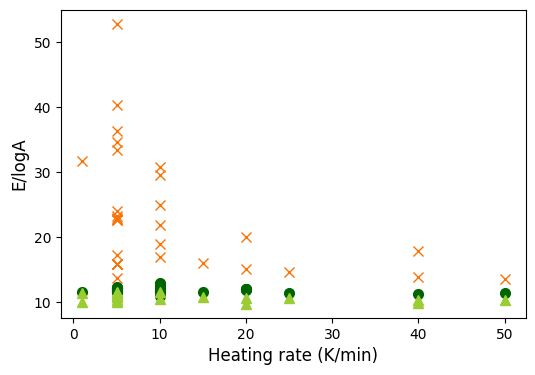

In [ ]:
fig = plt.figure(figsize=(6,4))

ax2 = fig.add_subplot(1, 1, 1)

plt.errorbar(x = 'Heating rate (K/min)', y = 'E/logA', data = KinRef[(KinRef['Name'] == 'Cellulose')], label = 'Cellulose', **marker1)
plt.errorbar(x = 'Heating rate (K/min)', y = 'E/logA', data = KinRef[(KinRef['Name'] == 'Hemicellulose')], label = 'Hemicellulose', **marker2)
plt.errorbar(x = 'Heating rate (K/min)', y = 'E/logA', data = KinRef[(KinRef['Name'] == 'Lignin')], label = 'Lignin', **marker3)
plt.xlabel('Heating rate (K/min)', fontsize=fz)
plt.ylabel('E/logA', fontsize=fz)



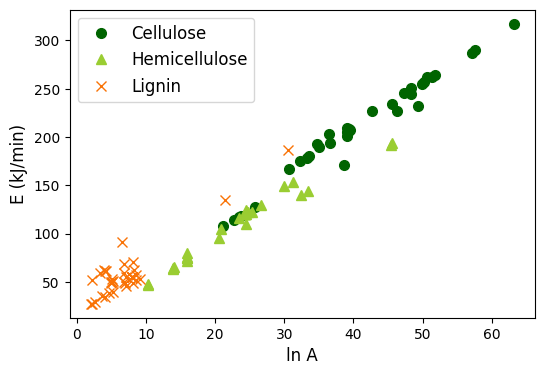

In [ ]:
# Plot E VS lnA

KinRef['lnA'] = numpy.log(KinRef['A (min-1)'])

fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(1, 1, 1)
plt.errorbar(x = 'lnA', y = 'E (kJ/mol)', data = KinRef[(KinRef['Name'] == 'Cellulose')], label = 'Cellulose', **marker1)
plt.errorbar(x = 'lnA', y = 'E (kJ/mol)', data = KinRef[(KinRef['Name'] == 'Hemicellulose')], label = 'Hemicellulose', **marker2)
plt.errorbar(x = 'lnA', y = 'E (kJ/mol)', data = KinRef[(KinRef['Name'] == 'Lignin')], label = 'Lignin', **marker3)
plt.xlabel('ln A', fontsize=fz)
plt.ylabel('E (kJ/min)', fontsize=fz)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc='best', fontsize=fz)

(0.0, 300.0)

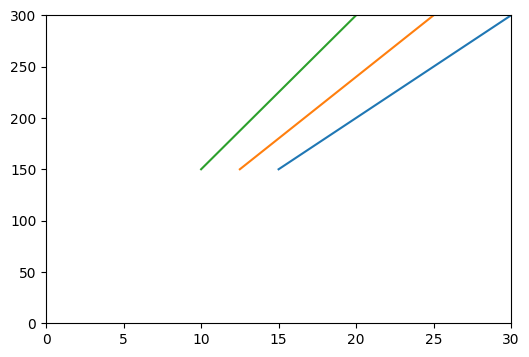

In [ ]:
def f(y,B):
  return y/B

fig = plt.figure(figsize=(6,4))
ax2 = fig.add_subplot(1, 1, 1)
E = numpy.linspace(150,300)
plt.plot(f(E,10),E)
plt.plot(f(E,12),E)
plt.plot(f(E,15),E)
plt.xlim([0,30])
plt.ylim([0,300])

# 8) Char, Volatiles of feedstocks


In [ ]:
print(dfexp[["Feedstock","Char_Wpercent_db"]])

                      Feedstock  Char_Wpercent_db
0                     Cellulose         10.410000
1                     Cellulose         10.410000
2                     Cellulose         10.690000
3           Potato without peel         22.580000
4                   Potato peel         27.580000
..                          ...               ...
76                  Switchgrass         26.030000
77                  Switchgrass         26.764580
78  Switchgrass Extractive-free         15.954007
79         Bark Extractive-free         32.600568
80                         Bark         33.743900

[81 rows x 2 columns]


In [ ]:
dfexp["Volatile_Wpercent_db"] = 100 - dfexp["Char_Wpercent_db"]


In [ ]:
dfexp[(dfexp['Heating_rate'] == 20)&(dfexp['Nominal weight (mg)'] == 10)].groupby("Feedstock").agg({"Volatile_Wpercent_db":[numpy.mean,numpy.std]})

Volatile_Wpercent_db          
                                            mean       std
Feedstock                                                 
Bark                                   66.653050  0.561372
Bark Extractive-free                   66.974716  0.600639
Birch                                  82.240000  0.212132
Birch Extractive-free                  86.695000  0.601041
Cellulose                              93.110000  0.749533
MixCS 1-9                              82.950000       NaN
MixCS 3-7                              82.123153  0.429542
MixCS 5-5                              81.905700  1.686033
MixCS 7-3                              86.431115  0.523737
MixCSuc 5-5                            87.310000       NaN
Oak                                    84.055000  0.671751
Oak Extractive-free                    88.505000  0.035355
Pine                                   85.215000  0.233345
Pine Extractive-free                   86.970000  1.202082
Potato peel                            75.775000  0.997021
Potato peel Extractive-free            83.373333  0.684787
Potato starch                          84.635000  0.148492
Potato without peel                    77.560000  0.537401
Sucrose                                83.513333  0.317228
Switchgrass                            73.602710  0.519426
Switchgrass Extractive-free            83.587997  0.647705

In [ ]:
#dfexp.head()

# 9) Load Extractive and ash data, and load reference data

In [ ]:
#@title Load extractives and ash data from experiments

ExtAsh =  pandas.read_excel('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Exp_data_TGA_for_python.xlsx',sheet_name='Extractive_Ash_from_Exp')

ExtAsh.fillna(0, inplace=True)

In [ ]:
ExtAsh.head(30)

Feedstock  Extractives  err_Extractives   Ash  err_Ash
0                          Pine     0.000000         0.000000  0.22     0.00
1          Pine Extractive-free     2.420000         0.000000  0.11     0.00
2                         Birch     0.000000         0.000000  0.81     0.01
3         Birch Extractive-free     7.100000         0.900000  0.39     0.00
4                           Oak     0.000000         0.000000  0.08     0.03
5           Oak Extractive-free     4.500000         0.030000  0.01     0.00
6                   Potato peel     0.000000         0.000000  8.70     0.10
7   Potato peel Extractive-free    21.700000         2.300000  2.18     0.00
8                          Bark     0.000000         0.000000  4.21     0.01
9          Bark Extractive-free    16.617061         0.036616  4.37     0.01
10                  Switchgrass     0.000000         0.000000  8.97     0.01
11  Switchgrass Extractive-free    23.035658         0.352660  2.90     0.02

In [ ]:
#@title Load reference compositions

Ref_Pine = pandas.read_excel('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Ref_compositions.xlsx',sheet_name='Pine_composition_ref')
Ref_Oak = pandas.read_excel('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Ref_compositions.xlsx',sheet_name='Oak_composition_ref')
Ref_Birch = pandas.read_excel('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Ref_compositions.xlsx',sheet_name='Birch_composition_ref')
Ref_Bark = pandas.read_excel('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Ref_compositions.xlsx',sheet_name='Bark_comp_ref')
Ref_Switchgrass = pandas.read_excel('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Ref_compositions.xlsx',sheet_name='Switchgrass_comp_ref')
#print(Ref_pine,Ref_oak,Ref_birch)

In [ ]:
Ref_Pine.columns

Index(['Species', 'Notes', 'Cellulose (%wt db)', 'Hemicellulose (%wt db)',
       'Lignin (%wt db)', 'Extractatives (%wt db)', 'Ashes (%wt db)', 'Sum',
       'Ref'],
      dtype='object')

In [ ]:
Ref_Pine.shape

(8, 9)

In [ ]:
#@title combine reference into one array for plotting (5 components)
x_list = ['Cellulose','~Hemicellulose','~Lignin','Extractives','Ash']

Pine_ref_xaxis = numpy.concatenate((numpy.repeat('Cellulose', Ref_Pine.shape[0]),numpy.repeat('~Hemicellulose', Ref_Pine.shape[0]),numpy.repeat('~Lignin', Ref_Pine.shape[0]),numpy.repeat('Extractives', Ref_Pine.shape[0]),numpy.repeat('Ash', Ref_Pine.shape[0])))
Pine_ref_yaxis = numpy.concatenate((Ref_Pine['Cellulose (%wt db)'], Ref_Pine['Hemicellulose (%wt db)'],Ref_Pine['Lignin (%wt db)'],Ref_Pine['Extractatives (%wt db)'],Ref_Pine['Ashes (%wt db)']))
Pine_ref = pandas.DataFrame({'xaxis':pandas.Categorical(Pine_ref_xaxis,categories=x_list,ordered=True),'yaxis':Pine_ref_yaxis})

Oak_ref_xaxis = numpy.concatenate((numpy.repeat('Cellulose', Ref_Oak.shape[0]),numpy.repeat('~Hemicellulose', Ref_Oak.shape[0]),numpy.repeat('~Lignin', Ref_Oak.shape[0]),numpy.repeat('Extractives', Ref_Oak.shape[0]),numpy.repeat('Ash', Ref_Oak.shape[0])))
Oak_ref_yaxis = numpy.concatenate((Ref_Oak['Cellulose (%wt db)'], Ref_Oak['Hemicellulose (%wt db)'],Ref_Oak['Lignin (%wt db)'],Ref_Oak['Extractatives (%wt db)'],Ref_Oak['Ashes (%wt db)']))
Oak_ref = pandas.DataFrame({'xaxis':pandas.Categorical(Oak_ref_xaxis,categories=x_list,ordered=True),'yaxis':Oak_ref_yaxis})

Birch_ref_xaxis = numpy.concatenate((numpy.repeat('Cellulose', Ref_Birch.shape[0]),numpy.repeat('~Hemicellulose', Ref_Birch.shape[0]),numpy.repeat('~Lignin', Ref_Birch.shape[0]),numpy.repeat('Extractives', Ref_Birch.shape[0]),numpy.repeat('Ash', Ref_Birch.shape[0])))
Birch_ref_yaxis = numpy.concatenate((Ref_Birch['Cellulose (%wt db)'], Ref_Birch['Hemicellulose (%wt db)'],Ref_Birch['Lignin (%wt db)'],Ref_Birch['Extractatives (%wt db)'],Ref_Birch['Ashes (%wt db)']))
Birch_ref = pandas.DataFrame({'xaxis':pandas.Categorical(Birch_ref_xaxis,categories=x_list,ordered=True),'yaxis':Birch_ref_yaxis})

Bark_ref_xaxis = numpy.concatenate((numpy.repeat('Cellulose', Ref_Bark.shape[0]),numpy.repeat('~Hemicellulose', Ref_Bark.shape[0]),numpy.repeat('~Lignin', Ref_Bark.shape[0]),numpy.repeat('Extractives', Ref_Bark.shape[0]),numpy.repeat('Ash', Ref_Bark.shape[0])))
Bark_ref_yaxis = numpy.concatenate((Ref_Bark['Cellulose (%wt db)'], Ref_Bark['Hemicellulose (%wt db)'],Ref_Bark['Lignin (%wt db)'],Ref_Bark['Extractatives (%wt db)'],Ref_Bark['Ashes (%wt db)']))
Bark_ref = pandas.DataFrame({'xaxis':pandas.Categorical(Bark_ref_xaxis,categories=x_list,ordered=True),'yaxis':Bark_ref_yaxis})

Switchgrass_ref_xaxis = numpy.concatenate((numpy.repeat('Cellulose', Ref_Switchgrass.shape[0]),numpy.repeat('~Hemicellulose', Ref_Switchgrass.shape[0]),numpy.repeat('~Lignin', Ref_Switchgrass.shape[0]),numpy.repeat('Extractives', Ref_Switchgrass.shape[0]),numpy.repeat('Ash', Ref_Switchgrass.shape[0])))
Switchgrass_ref_yaxis = numpy.concatenate((Ref_Switchgrass['Cellulose (%wt db)'], Ref_Switchgrass['Hemicellulose (%wt db)'],Ref_Switchgrass['Lignin (%wt db)'],Ref_Switchgrass['Extractatives (%wt db)'],Ref_Switchgrass['Ashes (%wt db)']))
Switchgrass_ref = pandas.DataFrame({'xaxis':pandas.Categorical(Switchgrass_ref_xaxis,categories=x_list,ordered=True),'yaxis':Switchgrass_ref_yaxis})
#print(Pine_ref_xaxis, Pine_ref_yaxis)

<Axes: title={'center': 'yaxis'}, xlabel='xaxis'>

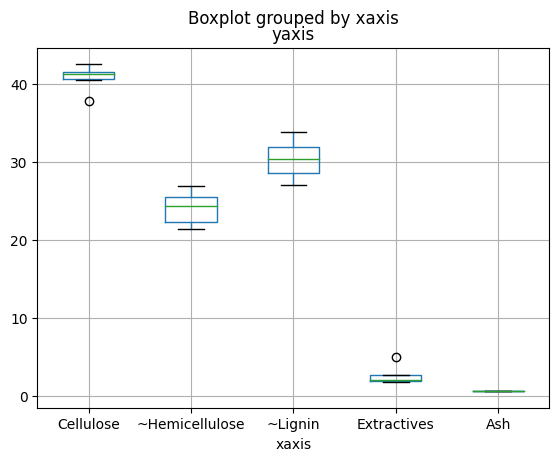

In [ ]:
#@title

Pine_ref.boxplot(column='yaxis', by='xaxis')

<Axes: title={'center': 'yaxis'}, xlabel='xaxis'>

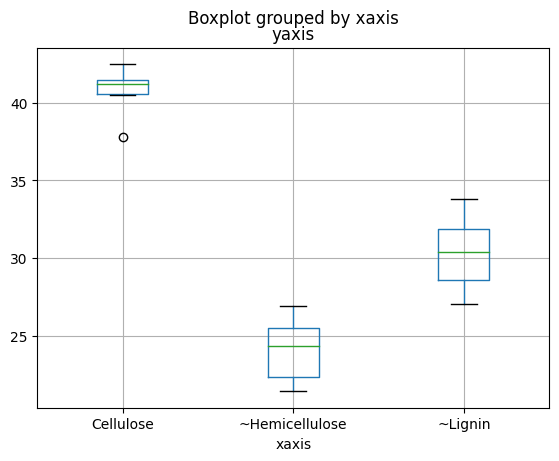

In [ ]:
#@title combine reference into one array for plotting (3 components)
x_list3 = ['Cellulose','~Hemicellulose','~Lignin']

Pine_ref_xaxis = numpy.concatenate((numpy.repeat('Cellulose', Ref_Pine.shape[0]),numpy.repeat('~Hemicellulose', Ref_Pine.shape[0]),numpy.repeat('~Lignin', Ref_Pine.shape[0])))
Pine_ref_yaxis = numpy.concatenate((Ref_Pine['Cellulose (%wt db)'], Ref_Pine['Hemicellulose (%wt db)'],Ref_Pine['Lignin (%wt db)']))
Pine_ref3 = pandas.DataFrame({'xaxis':pandas.Categorical(Pine_ref_xaxis,categories=x_list3,ordered=True),'yaxis':Pine_ref_yaxis})

Oak_ref_xaxis = numpy.concatenate((numpy.repeat('Cellulose', Ref_Oak.shape[0]),numpy.repeat('~Hemicellulose', Ref_Oak.shape[0]),numpy.repeat('~Lignin', Ref_Oak.shape[0])))
Oak_ref_yaxis = numpy.concatenate((Ref_Oak['Cellulose (%wt db)'], Ref_Oak['Hemicellulose (%wt db)'],Ref_Oak['Lignin (%wt db)']))
Oak_ref3 = pandas.DataFrame({'xaxis':pandas.Categorical(Oak_ref_xaxis,categories=x_list3,ordered=True),'yaxis':Oak_ref_yaxis})

Birch_ref_xaxis = numpy.concatenate((numpy.repeat('Cellulose', Ref_Birch.shape[0]),numpy.repeat('~Hemicellulose', Ref_Birch.shape[0]),numpy.repeat('~Lignin', Ref_Birch.shape[0])))
Birch_ref_yaxis = numpy.concatenate((Ref_Birch['Cellulose (%wt db)'], Ref_Birch['Hemicellulose (%wt db)'],Ref_Birch['Lignin (%wt db)']))
Birch_ref3 = pandas.DataFrame({'xaxis':pandas.Categorical(Birch_ref_xaxis,categories=x_list3,ordered=True),'yaxis':Birch_ref_yaxis})

Bark_ref_xaxis = numpy.concatenate((numpy.repeat('Cellulose', Ref_Bark.shape[0]),numpy.repeat('~Hemicellulose', Ref_Bark.shape[0]),numpy.repeat('~Lignin', Ref_Bark.shape[0])))
Bark_ref_yaxis = numpy.concatenate((Ref_Bark['Cellulose (%wt db)'], Ref_Bark['Hemicellulose (%wt db)'],Ref_Bark['Lignin (%wt db)']))
Bark_ref3 = pandas.DataFrame({'xaxis':pandas.Categorical(Bark_ref_xaxis,categories=x_list3,ordered=True),'yaxis':Bark_ref_yaxis})

Switchgrass_ref_xaxis = numpy.concatenate((numpy.repeat('Cellulose', Ref_Switchgrass.shape[0]),numpy.repeat('~Hemicellulose', Ref_Switchgrass.shape[0]),numpy.repeat('~Lignin', Ref_Switchgrass.shape[0])))
Switchgrass_ref_yaxis = numpy.concatenate((Ref_Switchgrass['Cellulose (%wt db)'], Ref_Switchgrass['Hemicellulose (%wt db)'],Ref_Switchgrass['Lignin (%wt db)']))
Switchgrass_ref3 = pandas.DataFrame({'xaxis':pandas.Categorical(Switchgrass_ref_xaxis,categories=x_list3,ordered=True),'yaxis':Switchgrass_ref_yaxis})

Pine_ref3.boxplot(column='yaxis', by='xaxis')

In [ ]:
Ref_Pine.head(30)

Species        Notes  Cellulose (%wt db)  Hemicellulose (%wt db)  \
0     Scots pine    Stem wood                40.7                    26.9   
1  Pinus radiata   wood chips                41.2                    26.0   
2  Pinus radiata   7-10 years                37.8                    24.3   
3            NaN  11-15 years                41.5                    21.4   
4            NaN  16-20 years                41.5                    21.7   
5            NaN  21-25 years                42.5                    22.9   
6            NaN  26-30 years                40.5                    25.0   
7           Pine      sawdust                 NaN                     NaN   

   Lignin (%wt db)  Extractatives (%wt db)  Ashes (%wt db)    Sum  \
0             27.0                     5.0             NaN   99.6   
1             27.8                     1.9             NaN   96.9   
2             32.5                     2.5             NaN   97.1   
3             31.2                     1.9             NaN   96.0   
4             29.4                     1.8             NaN   94.4   
5             30.4                     2.0             NaN   97.8   
6             33.8                     2.7             NaN  102.0   
7              NaN                     NaN            0.56    NaN   

                                                 Ref  
0  Microsoft Word - 1.2_IS_2013-01-31_Chemical_co...  
1                                          Reyes2015  
2                                      Berrocal 2004  
3                                      Berrocal 2004  
4                                      Berrocal 2004  
5                                      Berrocal 2004  
6                                      Berrocal 2004  
7                                           Chen2015

In [ ]:
feedstock_name = ['Pine','Birch','Oak','Switchgrass','Bark']

Ref_Pine['Feedstock']='Pine'
Ref_Oak['Feedstock']='Oak'
Ref_Birch['Feedstock']='Birch'
Ref_Switchgrass['Feedstock']='Switchgrass'
Ref_Bark['Feedstock']='Bark'

#print(Ref_Pine)
Ref_xaxis = numpy.concatenate((Ref_Pine['Feedstock'],Ref_Oak['Feedstock'],Ref_Birch['Feedstock'],Ref_Switchgrass['Feedstock'],Ref_Bark['Feedstock']))
Ref_Ash_yaxis = numpy.concatenate((Ref_Pine['Ashes (%wt db)'],Ref_Oak['Ashes (%wt db)'],Ref_Birch['Ashes (%wt db)'],Ref_Switchgrass['Ashes (%wt db)'],Ref_Bark['Ashes (%wt db)']))
Ref_Ext_yaxis = numpy.concatenate((Ref_Pine['Extractatives (%wt db)'],Ref_Oak['Extractatives (%wt db)'],Ref_Birch['Extractatives (%wt db)'],Ref_Switchgrass['Extractatives (%wt db)'],Ref_Bark['Extractatives (%wt db)']))

Ref_Ash = pandas.DataFrame({'Feedstock':pandas.Categorical(Ref_xaxis,categories=feedstock_name, ordered=True),
                            'Ash':Ref_Ash_yaxis,
                            'Ext':Ref_Ext_yaxis})
print(Ref_Ash)

   Feedstock  Ash   Ext
0       Pine  NaN   5.0
1       Pine  NaN   1.9
2       Pine  NaN   2.5
3       Pine  NaN   1.9
4       Pine  NaN   1.8
..       ...  ...   ...
88      Bark  NaN   NaN
89      Bark  NaN   NaN
90      Bark  NaN   NaN
91      Bark  NaN   NaN
92      Bark  4.6  18.8

[93 rows x 3 columns]


In [ ]:
ExtAsh.set_index(['Feedstock'], inplace=True)
ExtAsh.loc[feedstock_name].head(13)

Extractives  err_Extractives   Ash  err_Ash
Feedstock                                               
Pine                 0.0              0.0  0.22     0.00
Birch                0.0              0.0  0.81     0.01
Oak                  0.0              0.0  0.08     0.03
Switchgrass          0.0              0.0  8.97     0.01
Bark                 0.0              0.0  4.21     0.01

In [ ]:
ExtAsh.loc[feedstock_name]['Ash']

Feedstock
Pine           0.22
Birch          0.81
Oak            0.08
Switchgrass    8.97
Bark           4.21
Name: Ash, dtype: float64

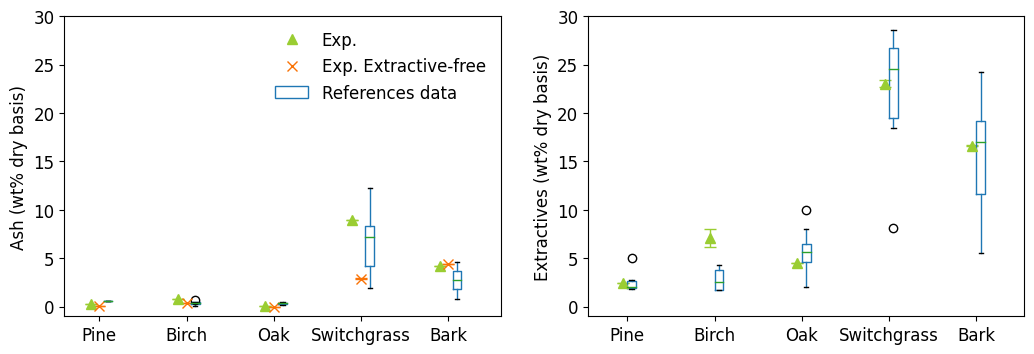

In [ ]:
#@title Plot Ash compare to references

feedstock_name_ext = ['Pine Extractive-free','Birch Extractive-free','Oak Extractive-free','Switchgrass Extractive-free','Bark Extractive-free']

ind = numpy.arange(5)
width = 0.1

fig = plt.figure(figsize=(12,4))
ax2 = fig.add_subplot(1, 2, 1)
plt.errorbar(x = ind , y = ExtAsh.loc[feedstock_name]['Ash'],
             yerr = ExtAsh.loc[feedstock_name]['err_Ash'], label='Exp.',**marker2)
plt.errorbar(x = ind + 1*width, y = ExtAsh.loc[feedstock_name_ext]['Ash'],
             yerr = ExtAsh.loc[feedstock_name_ext]['err_Ash'], label='Exp. Extractive-free',**marker3)
bplot = Ref_Ash.boxplot(column='Ash', by='Feedstock',ax=ax2,grid=False, fontsize=fz,positions=ind+ 2*width, widths=width, )

bplot.set_xlabel('')
plt.ylabel('Ash (wt% dry basis)', fontsize=fz)
plt.ylim([-1,30])
plt.title('')
plt.suptitle('')
plt.xticks(ind + 2*width/2,feedstock_name)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

red_patch = patches.Patch(edgecolor='tab:blue', fill=False)
new_handles.append(red_patch)
labels.append('References data')

ax.legend(new_handles, labels, loc='best', fontsize=fz,frameon=False)

ax2 = fig.add_subplot(1, 2, 2)
plt.errorbar(x = ind, y = ExtAsh.loc[feedstock_name_ext]['Extractives'],
             yerr = ExtAsh.loc[feedstock_name_ext]['err_Extractives'], **marker2)
bplot = Ref_Ash.boxplot(column='Ext', by='Feedstock',ax=ax2,grid=False, fontsize=fz,positions=ind+ 1*width, widths=width, )

bplot.set_xlabel('')
plt.ylabel('Extractives (wt% dry basis)', fontsize=fz)
plt.ylim([-1,30])
plt.title('')
plt.suptitle('')
plt.xticks(ind + 1*width/2,feedstock_name)

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/AshExt_compare_ref.png',dpi=300,bbox_inches='tight')

In [ ]:
ExtAsh.reset_index(inplace=True)

# 10) Fit results 5 curves


In [ ]:
#@title Load data (fit results)

df5curves =  pandas.read_excel('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Fit_results_for_python.xlsx', sheet_name='FitResults_5curves')

#calculate
df5curves['c_Hemi'] = df5curves['c_Hemi1']+df5curves['c_Hemi2']
df5curves['c_Lig'] = df5curves['c_Lig1']+df5curves['c_Lig2']

#get char weight from exp data
df5curves = pandas.merge(df5curves,dfexp[['Name','Feedstock','Char_Wpercent_db']], on='Name',how='left')

df5curves.head()

Name         Boundary     B_Cell      E_Cell    c_Cell  \
0          Pine20Kpm_R1  Normal boundary  12.322819  243.313614  0.416409   
1          Pine20Kpm_R2  Normal boundary  12.325705  242.298528  0.415737   
2  PineExtFree_20Kpm_R1  Normal boundary  12.423602  245.576619  0.538199   
3  PineExtFree_20Kpm_R2  Normal boundary  12.420881  245.951882  0.538782   
4            PP20Kpm_R4  Normal boundary  11.180277  181.408194  0.164842   

     B_Hemi1     E_Hemi1   c_Hemi1    B_Hemi2     E_Hemi2   c_Hemi2  \
0  11.111235  101.606260  0.100485  11.699990  142.000329  0.285185   
1  11.105755  101.578051  0.092196  11.699987  140.480038  0.284828   
2  10.621563  145.945769  0.028249  11.679878  154.797368  0.228607   
3  11.680764  154.797515  0.227366  10.618896  145.324139  0.028262   
4  11.699659   61.647980  0.158964  10.722498  154.797233  0.251644   

      B_Lig1     E_Lig1    c_Lig1     B_Lig2     E_Lig2    c_Lig2      R_sq  \
0  33.049441  27.410069  0.089720  14.765788  55.966516  0.103583  0.995592   
1  14.656920  57.622526  0.104894  30.805339  27.431254  0.097804  0.999619   
2  30.493876  27.411728  0.089571  14.401731  58.102599  0.107796  0.999586   
3  14.359472  59.368943  0.105733  29.739603  27.415566  0.093178  0.999394   
4  33.366427  54.588397  0.070731  18.710174  27.402716  0.356862  0.973205   

     T_Cell  T_hemic 1  T_hemic 2   T_lig 1   T_lig 2  Area fit/Area Exp  \
0  375.2326   299.2862   336.2187  518.9068  403.3258           0.997606   
1  375.4152   299.0022   335.9344  403.2452  501.5506           0.998438   
2  380.3940   283.8778   336.9242  498.7117  395.4892           0.996244   
3  380.3816   337.0603   283.6157  396.3650  492.3442           0.997063   
4  314.5171   300.3526   289.6460  824.1762  362.5211           0.999079   

        Note    c_Hemi     c_Lig             Feedstock  Char_Wpercent_db  
0 2023-08-03  0.385670  0.193303                  Pine             15.38  
1        NaT  0.377024  0.202697                  Pine             14.95  
2        NaT  0.256856  0.197367  Pine Extractive-free             12.18  
3        NaT  0.255628  0.198911  Pine Extractive-free             13.88  
4        NaT  0.410607  0.427593           Potato peel             23.52

In [ ]:
#df5curves.head(50)

In [ ]:
df5curves.columns

Index(['Name', 'Boundary', 'B_Cell', 'E_Cell', 'c_Cell', 'B_Hemi1', 'E_Hemi1',
       'c_Hemi1', 'B_Hemi2', 'E_Hemi2', 'c_Hemi2', 'B_Lig1', 'E_Lig1',
       'c_Lig1', 'B_Lig2', 'E_Lig2', 'c_Lig2', 'R_sq', 'T_Cell', 'T_hemic 1',
       'T_hemic 2', 'T_lig 1', 'T_lig 2', 'Area fit/Area Exp', 'Note',
       'c_Hemi', 'c_Lig', 'Feedstock', 'Char_Wpercent_db'],
      dtype='object')

In [ ]:
# sort hemic and lig

ToSwopIdx = (df5curves['B_Hemi1'] > df5curves['B_Hemi2'])
df5curves.loc[ToSwopIdx, ['B_Hemi1','B_Hemi2']] = df5curves.loc[ToSwopIdx, ['B_Hemi2','B_Hemi1']].values
df5curves.loc[ToSwopIdx, ['E_Hemi1','E_Hemi2']] = df5curves.loc[ToSwopIdx, ['E_Hemi2','E_Hemi1']].values
df5curves.loc[ToSwopIdx, ['c_Hemi1','c_Hemi2']] = df5curves.loc[ToSwopIdx, ['c_Hemi2','c_Hemi1']].values
df5curves.loc[ToSwopIdx, ['T_hemic 1','T_hemic 2']] = df5curves.loc[ToSwopIdx, ['T_hemic 2','T_hemic 1']].values

ToSwopIdx = (df5curves['B_Lig1'] > df5curves['B_Lig2'])
df5curves.loc[ToSwopIdx, ['B_Lig1','B_Lig2']] = df5curves.loc[ToSwopIdx, ['B_Lig2','B_Lig1']].values
df5curves.loc[ToSwopIdx, ['E_Lig1','E_Lig2']] = df5curves.loc[ToSwopIdx, ['E_Lig2','E_Lig1']].values
df5curves.loc[ToSwopIdx, ['c_Lig1','c_Lig2']] = df5curves.loc[ToSwopIdx, ['c_Lig2','c_Lig1']].values
df5curves.loc[ToSwopIdx, ['T_lig 1','T_lig 2']] = df5curves.loc[ToSwopIdx, ['T_lig 2','T_lig 1']].values
df5curves.head()


Name         Boundary     B_Cell      E_Cell    c_Cell  \
0          Pine20Kpm_R1  Normal boundary  12.322819  243.313614  0.416409   
1          Pine20Kpm_R2  Normal boundary  12.325705  242.298528  0.415737   
2  PineExtFree_20Kpm_R1  Normal boundary  12.423602  245.576619  0.538199   
3  PineExtFree_20Kpm_R2  Normal boundary  12.420881  245.951882  0.538782   
4            PP20Kpm_R4  Normal boundary  11.180277  181.408194  0.164842   

     B_Hemi1     E_Hemi1   c_Hemi1    B_Hemi2     E_Hemi2   c_Hemi2  \
0  11.111235  101.606260  0.100485  11.699990  142.000329  0.285185   
1  11.105755  101.578051  0.092196  11.699987  140.480038  0.284828   
2  10.621563  145.945769  0.028249  11.679878  154.797368  0.228607   
3  10.618896  145.324139  0.028262  11.680764  154.797515  0.227366   
4  10.722498  154.797233  0.251644  11.699659   61.647980  0.158964   

      B_Lig1     E_Lig1    c_Lig1     B_Lig2     E_Lig2    c_Lig2      R_sq  \
0  14.765788  55.966516  0.103583  33.049441  27.410069  0.089720  0.995592   
1  14.656920  57.622526  0.104894  30.805339  27.431254  0.097804  0.999619   
2  14.401731  58.102599  0.107796  30.493876  27.411728  0.089571  0.999586   
3  14.359472  59.368943  0.105733  29.739603  27.415566  0.093178  0.999394   
4  18.710174  27.402716  0.356862  33.366427  54.588397  0.070731  0.973205   

     T_Cell  T_hemic 1  T_hemic 2   T_lig 1   T_lig 2  Area fit/Area Exp  \
0  375.2326   299.2862   336.2187  403.3258  518.9068           0.997606   
1  375.4152   299.0022   335.9344  403.2452  501.5506           0.998438   
2  380.3940   283.8778   336.9242  395.4892  498.7117           0.996244   
3  380.3816   283.6157   337.0603  396.3650  492.3442           0.997063   
4  314.5171   289.6460   300.3526  362.5211  824.1762           0.999079   

        Note    c_Hemi     c_Lig             Feedstock  Char_Wpercent_db  
0 2023-08-03  0.385670  0.193303                  Pine             15.38  
1        NaT  0.377024  0.202697                  Pine             14.95  
2        NaT  0.256856  0.197367  Pine Extractive-free             12.18  
3        NaT  0.255628  0.198911  Pine Extractive-free             13.88  
4        NaT  0.410607  0.427593           Potato peel             23.52

In [ ]:
#@title Calculate the average and SD

df5mean = df5curves[['B_Cell', 'E_Cell', 'c_Cell', 'B_Hemi1', 'E_Hemi1','c_Hemi1','B_Hemi2', 'E_Hemi2', 'c_Hemi2', 'B_Lig1', 'E_Lig1',
                     'c_Lig1','B_Lig2', 'E_Lig2', 'c_Lig2', 'R_sq', 'T_Cell','T_hemic 1','T_hemic 2', 'T_lig 1', 'T_lig 2', 'Area fit/Area Exp', 'c_Hemi', 'c_Lig',
                     'Feedstock', 'Char_Wpercent_db','Boundary']].groupby(['Boundary','Feedstock']).mean()
df5std = df5curves[['B_Cell', 'E_Cell', 'c_Cell', 'B_Hemi1', 'E_Hemi1','c_Hemi1','B_Hemi2', 'E_Hemi2', 'c_Hemi2', 'B_Lig1', 'E_Lig1',
                     'c_Lig1','B_Lig2', 'E_Lig2', 'c_Lig2', 'R_sq', 'T_Cell','T_hemic 1','T_hemic 2', 'T_lig 1', 'T_lig 2', 'Area fit/Area Exp', 'c_Hemi', 'c_Lig',
                     'Feedstock', 'Char_Wpercent_db','Boundary']].groupby(['Boundary','Feedstock']).std()

#print(df3std)
df5mean.head(10)

B_Cell      E_Cell    c_Cell  \
Boundary        Feedstock                                                      
Normal boundary Bark                         11.950331  153.382255  0.209658   
                Bark Extractive-free         12.029962  152.582602  0.184850   
                Birch                        12.322971  234.460662  0.425272   
                Birch Extractive-free        12.518347  242.074753  0.544754   
                Oak                          12.330036  262.336957  0.357367   
                Oak Extractive-free          12.342980  212.497631  0.507887   
                Pine                         12.324262  242.806071  0.416073   
                Pine Extractive-free         12.422242  245.764250  0.538491   
                Potato peel                  11.179382  180.150932  0.166703   
                Potato peel Extractive-free  11.600517  257.276637  0.207061   

                                               B_Hemi1     E_Hemi1   c_Hemi1  \
Boundary        Feedstock                                                      
Normal boundary Bark                         10.106487  114.087242  0.056458   
                Bark Extractive-free         10.769293  106.405499  0.106831   
                Birch                        10.981438  107.708012  0.116365   
                Birch Extractive-free        10.916328  137.287301  0.099231   
                Oak                          10.824824  154.788791  0.114149   
                Oak Extractive-free          11.035778  154.798407  0.176946   
                Pine                         11.108495  101.592155  0.096340   
                Pine Extractive-free         10.620229  145.634954  0.028256   
                Potato peel                  10.719991  154.791186  0.249304   
                Potato peel Extractive-free  10.947050  138.296516  0.083956   

                                               B_Hemi2     E_Hemi2   c_Hemi2  \
Boundary        Feedstock                                                      
Normal boundary Bark                         10.881259  115.535804  0.104771   
                Bark Extractive-free         11.699988  154.797581  0.104950   
                Birch                        11.699994  154.780060  0.177605   
                Birch Extractive-free        11.699996  151.603761  0.160056   
                Oak                          11.699953  102.036486  0.312637   
                Oak Extractive-free          11.560916  154.787946  0.139421   
                Pine                         11.699988  141.240183  0.285007   
                Pine Extractive-free         11.680321  154.797441  0.227986   
                Potato peel                  11.698971   61.560881  0.158712   
                Potato peel Extractive-free  11.594823  129.476635  0.456000   

                                                B_Lig1     E_Lig1    c_Lig1  \
Boundary        Feedstock                                                     
Normal boundary Bark                         15.335740  38.620484  0.315770   
                Bark Extractive-free         15.151059  42.830064  0.278706   
                Birch                        16.780621  34.546635  0.194226   
                Birch Extractive-free        14.807158  56.000441  0.095725   
                Oak                          14.667313  49.151097  0.123797   
                Oak Extractive-free          14.191069  63.241655  0.087610   
                Pine                         14.711354  56.794521  0.104238   
                Pine Extractive-free         14.380602  58.735771  0.106764   
                Potato peel                  18.712197  27.408639  0.355139   
                Potato peel Extractive-free  15.991746  37.049290  0.182253   

                                                B_Lig2     E_Lig2    c_Lig2  \
Boundary        Feedstock                                                     
Normal boundary Bark                         33.396334  28

In [ ]:
df5std.head(10)

B_Cell     E_Cell    c_Cell  \
Boundary        Feedstock                                                    
Normal boundary Bark                         0.001403   0.882311  0.001558   
                Bark Extractive-free         0.004206   0.604913  0.001393   
                Birch                        0.000496   0.223877  0.002422   
                Birch Extractive-free        0.001480   0.169913  0.002024   
                Oak                          0.003756   0.027535  0.001068   
                Oak Extractive-free          0.013201   0.587105  0.000355   
                Pine                         0.002041   0.717774  0.000475   
                Pine Extractive-free         0.001924   0.265351  0.000412   
                Potato peel                  0.001266   1.778037  0.002632   
                Potato peel Extractive-free  0.378794  52.878472  0.151636   

                                              B_Hemi1    E_Hemi1   c_Hemi1  \
Boundary        Feedstock                                                    
Normal boundary Bark                         0.010561   0.262190  0.001125   
                Bark Extractive-free         0.003194   1.170657  0.003123   
                Birch                        0.002420   1.051170  0.001028   
                Birch Extractive-free        0.007131   1.232393  0.002004   
                Oak                          0.000320   0.001535  0.000113   
                Oak Extractive-free          0.006341   0.000031  0.001243   
                Pine                         0.003875   0.019947  0.005861   
                Pine Extractive-free         0.001886   0.439559  0.000009   
                Potato peel                  0.003545   0.008551  0.003309   
                Potato peel Extractive-free  0.395421  28.559746  0.051680   

                                                  B_Hemi2    E_Hemi2  \
Boundary        Feedstock                                              
Normal boundary Bark                         9.435477e-04   2.222867   
                Bark Extractive-free         5.228334e-07   0.000025   
                Birch                        2.196305e-07   0.003005   
                Birch Extractive-free        1.045872e-07   0.748238   
                Oak                          1.473845e-05   0.472470   
                Oak Extractive-free          8.645535e-03   0.000360   
                Pine                         2.504959e-06   1.075008   
                Pine Extractive-free         6.261628e-04   0.000104   
                Potato peel                  9.727954e-04   0.123177   
                Potato peel Extractive-free  1.369734e-01  24.320595   

                                              c_Hemi2    B_Lig1    E_Lig1  \
Boundary        Feedstock                                                   
Normal boundary Bark                         0.003130  0.047180  0.476751   
                Bark Extractive-free         0.000810  0.027760  0.897586   
                Birch                        0.000691  0.911639  2.912923   
                Birch Extractive-free        0.000099  0.125838  3.337707   
                Oak                          0.002110  0.139110  2.775380   
                Oak Extractive-free          0.000504  0.112866  3.745430   
                Pine                         0.000252  0.076981  1.170976   
                Pine Extractive-free         0.000877  0.029881  0.895440   
                Potato peel                  0.000356  0.002860  0.008377   
                Potato peel Extractive-free  0.191392  0.617585  3.385120   

                                               c_Lig1    B_Lig2     E_Lig2  \
Boundary        Feedstock                                                    
Normal boundary Bark                         0.005082  0.000701   0.182763   
                Bark Extractive-free         0.004941  0.001745   0.068054   
                Birch                        0.020737  0.005381   6.006

In [ ]:
#@title Add extractives and ash data
df5mean.reset_index(inplace=True)
df5mean = pandas.merge(df5mean,ExtAsh[['Feedstock','Extractives','Ash']], on='Feedstock',how='left')

df5mean.head()

Boundary              Feedstock     B_Cell      E_Cell    c_Cell  \
0  Normal boundary                   Bark  11.950331  153.382255  0.209658   
1  Normal boundary   Bark Extractive-free  12.029962  152.582602  0.184850   
2  Normal boundary                  Birch  12.322971  234.460662  0.425272   
3  Normal boundary  Birch Extractive-free  12.518347  242.074753  0.544754   
4  Normal boundary                    Oak  12.330036  262.336957  0.357367   

     B_Hemi1     E_Hemi1   c_Hemi1    B_Hemi2     E_Hemi2   c_Hemi2  \
0  10.106487  114.087242  0.056458  10.881259  115.535804  0.104771   
1  10.769293  106.405499  0.106831  11.699988  154.797581  0.104950   
2  10.981438  107.708012  0.116365  11.699994  154.780060  0.177605   
3  10.916328  137.287301  0.099231  11.699996  151.603761  0.160056   
4  10.824824  154.788791  0.114149  11.699953  102.036486  0.312637   

      B_Lig1     E_Lig1    c_Lig1     B_Lig2     E_Lig2    c_Lig2      R_sq  \
0  15.335740  38.620484  0.315770  33.396334  28.523058  0.317457  0.994773   
1  15.151059  42.830064  0.278706  33.392552  29.079753  0.328981  0.994855   
2  16.780621  34.546635  0.194226  33.392097  33.736376  0.086103  0.994751   
3  14.807158  56.000441  0.095725  33.010838  27.414826  0.094264  0.999338   
4  14.667313  49.151097  0.123797  30.367344  27.414382  0.088844  0.997948   

      T_Cell  T_hemic 1  T_hemic 2    T_lig 1    T_lig 2  Area fit/Area Exp  \
0  349.96810  254.44285  292.00060  365.11590  538.27575           0.998087   
1  353.74280  284.57200  337.94355  377.09870  546.45150           0.998485   
2  374.88235  294.89220  337.93385  377.37675  607.69075           0.998369   
3  385.04570  297.28405  337.54285  404.48425  518.63885           0.996938   
4  376.18975  294.80690  326.60180  382.77250  497.73505           0.997748   

     c_Hemi     c_Lig  Char_Wpercent_db  Extractives   Ash  
0  0.161229  0.633227         33.346950     0.000000  4.21  
1  0.211781  0.607687         33.025284    16.617061  4.37  
2  0.293970  0.280329         17.760000     0.000000  0.81  
3  0.259287  0.189989         13.305000     7.100000  0.39  
4  0.426786  0.212641         15.945000     0.000000  0.08

In [ ]:
df5std.reset_index(inplace=True)
df5std = pandas.merge(df5std,ExtAsh[['Feedstock','err_Extractives','err_Ash']], on='Feedstock',how='left')

df5std.head(10)

Boundary                    Feedstock    B_Cell     E_Cell  \
0  Normal boundary                         Bark  0.001403   0.882311   
1  Normal boundary         Bark Extractive-free  0.004206   0.604913   
2  Normal boundary                        Birch  0.000496   0.223877   
3  Normal boundary        Birch Extractive-free  0.001480   0.169913   
4  Normal boundary                          Oak  0.003756   0.027535   
5  Normal boundary          Oak Extractive-free  0.013201   0.587105   
6  Normal boundary                         Pine  0.002041   0.717774   
7  Normal boundary         Pine Extractive-free  0.001924   0.265351   
8  Normal boundary                  Potato peel  0.001266   1.778037   
9  Normal boundary  Potato peel Extractive-free  0.378794  52.878472   

     c_Cell   B_Hemi1    E_Hemi1   c_Hemi1       B_Hemi2    E_Hemi2   c_Hemi2  \
0  0.001558  0.010561   0.262190  0.001125  9.435477e-04   2.222867  0.003130   
1  0.001393  0.003194   1.170657  0.003123  5.228334e-07   0.000025  0.000810   
2  0.002422  0.002420   1.051170  0.001028  2.196305e-07   0.003005  0.000691   
3  0.002024  0.007131   1.232393  0.002004  1.045872e-07   0.748238  0.000099   
4  0.001068  0.000320   0.001535  0.000113  1.473845e-05   0.472470  0.002110   
5  0.000355  0.006341   0.000031  0.001243  8.645535e-03   0.000360  0.000504   
6  0.000475  0.003875   0.019947  0.005861  2.504959e-06   1.075008  0.000252   
7  0.000412  0.001886   0.439559  0.000009  6.261628e-04   0.000104  0.000877   
8  0.002632  0.003545   0.008551  0.003309  9.727954e-04   0.123177  0.000356   
9  0.151636  0.395421  28.559746  0.051680  1.369734e-01  24.320595  0.191392   

     B_Lig1    E_Lig1    c_Lig1    B_Lig2     E_Lig2    c_Lig2      R_sq  \
0  0.047180  0.476751  0.005082  0.000701   0.182763  0.001493  0.002713   
1  0.027760  0.897586  0.004941  0.001745   0.068054  0.001102  0.000542   
2  0.911639  2.912923  0.020737  0.005381   6.006068  0.014575  0.005495   
3  0.125838  3.337707  0.004578  0.514930   0.005618  0.002181  0.000113   
4  0.139110  2.775380  0.005563  0.329282   0.001960  0.002888  0.001587   
5  0.112866  3.745430  0.002322  1.010580   0.002130  0.002712  0.000314   
6  0.076981  1.170976  0.000927  1.586819   0.014980  0.005716  0.002848   
7  0.029881  0.895440  0.001459  0.533352   0.002714  0.002551  0.000136   
8  0.002860  0.008377  0.002436  0.154807   1.905737  0.006470  0.017754   
9  0.617585  3.385120  0.012361  6.666487  14.004460  0.012142  0.001143   

      T_Cell  T_hemic 1  T_hemic 2   T_lig 1    T_lig 2  Area fit/Area Exp  \
0   0.003960   0.649902   0.437699  0.824345   2.701784           0.000609   
1   0.075236   0.208738   0.051407  2.572596   0.984434           0.000231   
2   0.129754   0.143118   0.053104  2.692026  78.300550           0.000388   
3   0.062650   0.183070   0.069226  3.450610   3.702199           0.001689   
4   0.231295   0.042144   0.138734  3.440074   2.722290           0.000240   
5   0.695298   0.258377   0.379928  2.047711   8.897807           0.000740   
6   0.129118   0.200818   0.201030  0.056993  12.272687           0.000589   
7   0.008768   0.185333   0.096237  0.619284   4.502502           0.000579   
8   0.162847   0.180736   0.172251  0.118794  18.178443           0.000872   
9  20.499008  14.863382   4.817263  3.780961  30.835074           0.000248   

     c_Hemi     c_Lig  Char_Wpercent_db  err_Extractives  err_Ash  
0  0.002005  0.003589          0.561372         0.000000     0.01  
1  0.003933  0.003839          0.600639         0.036616     0.01  
2  0.000337  0.006162          0.212132         0.000000     0.01  
3  0.001905  0.002397          0.601041         0.900000     0.00  
4  0.001997  0.002675          0.671751         0.000000     0.03  
5  0.001748  0.000390          0.035355         0.030000     0.00  
6  0.006114  0.006643          0.304056         0.000000     0.00  
7  0.000868  0.001092          1.202082         0.000000     0.00  
8  0.003664  0.00

In [ ]:
#@title Calculate c

# Convert to fraction
df5mean['Char_frac'] = df5mean['Char_Wpercent_db']/100
df5mean['Ext_frac'] = df5mean['Extractives']/100

df5std['Char_frac'] = df5std['Char_Wpercent_db']/100
df5std['Ext_frac'] = df5std['err_Extractives']/100

# convert Ash (wt% db extractive free basis to wt% db)
df5mean['Ash_db'] = df5mean['Ash']*(1-df5mean['Ext_frac'].fillna(0))
df5mean['Ash_frac'] = df5mean['Ash_db']/100

df5std['Ash_db'] = df5std['err_Ash']*(1-df5std['Ext_frac'].fillna(0))
df5std['Ash_frac'] = df5std['Ash_db']/100

# Char adjust (and adjust with extractive and ash content)
df5mean['c_Cell_CharAdj'] = df5mean['c_Cell']*(1-df5mean['Char_frac'])/(1-Cell_Charfrac/100)*(1-df5mean['Ext_frac']-df5mean['Ash_frac'])
df5mean['c_Hemi_CharAdj'] = df5mean['c_Hemi']*(1-df5mean['Char_frac'])/(1-Hemi_Charfrac/100)*(1-df5mean['Ext_frac']-df5mean['Ash_frac'])
df5mean['c_Lig_CharAdj']  = df5mean['c_Lig']*(1-df5mean['Char_frac'])/(1-Lig_Charfrac/100)*(1-df5mean['Ext_frac']-df5mean['Ash_frac'])

df5std['c_Cell_CharAdj'] = df5mean['c_Cell_CharAdj']*numpy.sqrt(pow(df5std['c_Cell']/df5mean['c_Cell'],2)
                                                              + pow(df5std['Char_frac']/df5mean['Char_frac'],2)
                                                              + pow(err_Cell_Charfrac/100/(1-Cell_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df5std['Ext_frac'],2) + pow(df5std['Ash_frac'].fillna(0),2))/(1-df5mean['Ext_frac']-df5mean['Ash_frac']),2))
df5std['c_Hemi_CharAdj'] = df5mean['c_Hemi_CharAdj']*numpy.sqrt(pow(df5std['c_Hemi']/df5mean['c_Hemi'],2)
                                                              + pow(df5std['Char_frac']/df5mean['Char_frac'],2)
                                                              + pow(err_Hemi_Charfrac/100/(1-Hemi_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df5std['Ext_frac'],2) + pow(df5std['Ash_frac'].fillna(0),2))/(1-df5mean['Ext_frac']-df5mean['Ash_frac']),2))
df5std['c_Lig_CharAdj'] = df5mean['c_Lig_CharAdj']*numpy.sqrt(pow(df5std['c_Lig']/df5mean['c_Lig'],2)
                                                              + pow(df5std['Char_frac']/df5mean['Char_frac'],2)
                                                              + pow(err_Lig_Charfrac/100/(1-Lig_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df5std['Ext_frac'],2) + pow(df5std['Ash_frac'].fillna(0),2))/(1-df5mean['Ext_frac']-df5mean['Ash_frac']),2))

# Normalization with extractives ()
col_list = ['c_Cell_CharAdj','c_Hemi_CharAdj','c_Lig_CharAdj']
df5mean['Sum_frac'] = df5mean[col_list].sum(axis=1)
df5std['Sum_frac'] = numpy.sqrt(pow(df5std['c_Cell_CharAdj'],2) + pow(df5std['c_Hemi_CharAdj'],2) + pow(df5std['c_Lig_CharAdj'],2))

df5mean['c_Cell_CharAdj_norm'] = df5mean['c_Cell_CharAdj']/df5mean['Sum_frac']*(1-df5mean['Ext_frac']-df5mean['Ash_frac'])
df5mean['c_Hemi_CharAdj_norm'] = df5mean['c_Hemi_CharAdj']/df5mean['Sum_frac']*(1-df5mean['Ext_frac']-df5mean['Ash_frac'])
df5mean['c_Lig_CharAdj_norm']  = df5mean['c_Lig_CharAdj']/df5mean['Sum_frac']*(1-df5mean['Ext_frac']-df5mean['Ash_frac'])

df5std['c_Cell_CharAdj_norm'] = df5mean['c_Cell_CharAdj_norm']*numpy.sqrt(pow(df5std['c_Cell']/df5mean['c_Cell'],2)
                                                              + pow(df5std['Sum_frac']/df5mean['Sum_frac'],2)
                                                              + pow(err_Cell_Charfrac/100/(1-Cell_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df5std['Ext_frac'],2) + pow(df5std['Ash_frac'].fillna(0),2))/(1-df5mean['Ext_frac']-df5mean['Ash_frac']),2))
df5std['c_Hemi_CharAdj_norm'] = df5mean['c_Hemi_CharAdj_norm']*numpy.sqrt(pow(df5std['c_Hemi']/df5mean['c_Hemi'],2)
                                                              + pow(df5std['Sum_frac']/df5mean['Sum_frac'],2)
                                                              + pow(err_Hemi_Charfrac/100/(1-Hemi_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df5std['Ext_frac'],2) + pow(df5std['Ash_frac'].fillna(0),2))/(1-df5mean['Ext_frac']-df5mean['Ash_frac']),2))
df5std['c_Lig_CharAdj_norm'] = df5mean['c_Lig_CharAdj_norm']*numpy.sqrt(pow(df5std['c_Lig']/df5mean['c_Lig'],2)
                                                              + pow(df5std['Sum_frac']/df5mean['Sum_frac'],2)
                                                              + pow(err_Lig_Charfrac/100/(1-Lig_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df5std['Ext_frac'],2) + pow(df5std['Ash_frac'].fillna(0),2))/(1-df5mean['Ext_frac']-df5mean['Ash_frac']),2))

df5mean['sum_check'] = df5mean[['c_Cell_CharAdj_norm','c_Hemi_CharAdj_norm','c_Lig_CharAdj_norm','Ext_frac','Ash_frac']].sum(axis=1)

df5mean['Cell_percentdb'] = 100*df5mean['c_Cell_CharAdj_norm']
df5mean['Hemi_percentdb'] = 100*df5mean['c_Hemi_CharAdj_norm']
df5mean['Lig_percentdb'] = 100*df5mean['c_Lig_CharAdj_norm']

df5std['Cell_percentdb'] = 100*df5std['c_Cell_CharAdj_norm']
df5std['Hemi_percentdb'] = 100*df5std['c_Hemi_CharAdj_norm']
df5std['Lig_percentdb'] = 100*df5std['c_Lig_CharAdj_norm']

df5mean.head()

Boundary              Feedstock     B_Cell      E_Cell    c_Cell  \
0  Normal boundary                   Bark  11.950331  153.382255  0.209658   
1  Normal boundary   Bark Extractive-free  12.029962  152.582602  0.184850   
2  Normal boundary                  Birch  12.322971  234.460662  0.425272   
3  Normal boundary  Birch Extractive-free  12.518347  242.074753  0.544754   
4  Normal boundary                    Oak  12.330036  262.336957  0.357367   

     B_Hemi1     E_Hemi1   c_Hemi1    B_Hemi2     E_Hemi2   c_Hemi2  \
0  10.106487  114.087242  0.056458  10.881259  115.535804  0.104771   
1  10.769293  106.405499  0.106831  11.699988  154.797581  0.104950   
2  10.981438  107.708012  0.116365  11.699994  154.780060  0.177605   
3  10.916328  137.287301  0.099231  11.699996  151.603761  0.160056   
4  10.824824  154.788791  0.114149  11.699953  102.036486  0.312637   

      B_Lig1     E_Lig1    c_Lig1     B_Lig2     E_Lig2    c_Lig2      R_sq  \
0  15.335740  38.620484  0.315770  33.396334  28.523058  0.317457  0.994773   
1  15.151059  42.830064  0.278706  33.392552  29.079753  0.328981  0.994855   
2  16.780621  34.546635  0.194226  33.392097  33.736376  0.086103  0.994751   
3  14.807158  56.000441  0.095725  33.010838  27.414826  0.094264  0.999338   
4  14.667313  49.151097  0.123797  30.367344  27.414382  0.088844  0.997948   

      T_Cell  T_hemic 1  T_hemic 2    T_lig 1    T_lig 2  Area fit/Area Exp  \
0  349.96810  254.44285  292.00060  365.11590  538.27575           0.998087   
1  353.74280  284.57200  337.94355  377.09870  546.45150           0.998485   
2  374.88235  294.89220  337.93385  377.37675  607.69075           0.998369   
3  385.04570  297.28405  337.54285  404.48425  518.63885           0.996938   
4  376.18975  294.80690  326.60180  382.77250  497.73505           0.997748   

     c_Hemi     c_Lig  Char_Wpercent_db  Extractives   Ash  Char_frac  \
0  0.161229  0.633227         33.346950     0.000000  4.21   0.333469   
1  0.211781  0.607687         33.025284    16.617061  4.37   0.330253   
2  0.293970  0.280329         17.760000     0.000000  0.81   0.177600   
3  0.259287  0.189989         13.305000     7.100000  0.39   0.133050   
4  0.426786  0.212641         15.945000     0.000000  0.08   0.159450   

   Ext_frac    Ash_db  Ash_frac  c_Cell_CharAdj  c_Hemi_CharAdj  \
0  0.000000  4.210000  0.042100        0.144339        0.128675   
1  0.166171  3.643834  0.036438        0.106447        0.141377   
2  0.000000  0.810000  0.008100        0.374068        0.299753   
3  0.071000  0.362310  0.003623        0.471244        0.260018   
4  0.000000  0.080000  0.000800        0.323640        0.448060   

   c_Lig_CharAdj  Sum_frac  c_Cell_CharAdj_norm  c_Hemi_CharAdj_norm  \
0       0.746898  1.019912             0.135563             0.120851   
1       0.599549  0.847373             0.100169             0.133038   
2       0.422456  1.096277             0.338453             0.271214   
3       0.281581  1.012844             0.430549             0.237564   
4       0.329933  1.101633             0.293547             0.406398   

   c_Lig_CharAdj_norm  sum_check  Cell_percentdb  Hemi_percentdb  \
0            0.701486        1.0       13.556319       12.085096   
1            0.564184        1.0       10.016857       13.303802   
2            0.382234        1.0       33.845255       27.121367   
3            0.257264        1.0       43.054880       23.756371   
4            0.299255        1.0       29.354740       40.639789   

   Lig_percentdb  
0      70.148585  
1      56.418446  
2      38.223378  
3      25.726438  
4      29.925471

In [ ]:
df5std.head()

Boundary              Feedstock    B_Cell    E_Cell    c_Cell  \
0  Normal boundary                   Bark  0.001403  0.882311  0.001558   
1  Normal boundary   Bark Extractive-free  0.004206  0.604913  0.001393   
2  Normal boundary                  Birch  0.000496  0.223877  0.002422   
3  Normal boundary  Birch Extractive-free  0.001480  0.169913  0.002024   
4  Normal boundary                    Oak  0.003756  0.027535  0.001068   

    B_Hemi1   E_Hemi1   c_Hemi1       B_Hemi2   E_Hemi2   c_Hemi2    B_Lig1  \
0  0.010561  0.262190  0.001125  9.435477e-04  2.222867  0.003130  0.047180   
1  0.003194  1.170657  0.003123  5.228334e-07  0.000025  0.000810  0.027760   
2  0.002420  1.051170  0.001028  2.196305e-07  0.003005  0.000691  0.911639   
3  0.007131  1.232393  0.002004  1.045872e-07  0.748238  0.000099  0.125838   
4  0.000320  0.001535  0.000113  1.473845e-05  0.472470  0.002110  0.139110   

     E_Lig1    c_Lig1    B_Lig2    E_Lig2    c_Lig2      R_sq    T_Cell  \
0  0.476751  0.005082  0.000701  0.182763  0.001493  0.002713  0.003960   
1  0.897586  0.004941  0.001745  0.068054  0.001102  0.000542  0.075236   
2  2.912923  0.020737  0.005381  6.006068  0.014575  0.005495  0.129754   
3  3.337707  0.004578  0.514930  0.005618  0.002181  0.000113  0.062650   
4  2.775380  0.005563  0.329282  0.001960  0.002888  0.001587  0.231295   

   T_hemic 1  T_hemic 2   T_lig 1    T_lig 2  Area fit/Area Exp    c_Hemi  \
0   0.649902   0.437699  0.824345   2.701784           0.000609  0.002005   
1   0.208738   0.051407  2.572596   0.984434           0.000231  0.003933   
2   0.143118   0.053104  2.692026  78.300550           0.000388  0.000337   
3   0.183070   0.069226  3.450610   3.702199           0.001689  0.001905   
4   0.042144   0.138734  3.440074   2.722290           0.000240  0.001997   

      c_Lig  Char_Wpercent_db  err_Extractives  err_Ash  Char_frac  Ext_frac  \
0  0.003589          0.561372         0.000000     0.01   0.005614  0.000000   
1  0.003839          0.600639         0.036616     0.01   0.006006  0.000366   
2  0.006162          0.212132         0.000000     0.01   0.002121  0.000000   
3  0.002397          0.601041         0.900000     0.00   0.006010  0.009000   
4  0.002675          0.671751         0.000000     0.03   0.006718  0.000000   

     Ash_db  Ash_frac  c_Cell_CharAdj  c_Hemi_CharAdj  c_Lig_CharAdj  \
0  0.010000    0.0001        0.003110        0.004073       0.077041   
1  0.009996    0.0001        0.002412        0.004978       0.062003   
2  0.010000    0.0001        0.006489        0.007976       0.044206   
3  0.000000    0.0000        0.022476        0.013644       0.031631   
4  0.030000    0.0003        0.014143        0.021771       0.036528   

   Sum_frac  c_Cell_CharAdj_norm  c_Hemi_CharAdj_norm  c_Lig_CharAdj_norm  \
0  0.077212             0.010423             0.009706            0.088973   
1  0.062249             0.007482             0.010564            0.070829   
2  0.045387             0.014645             0.012949            0.042771   
3  0.041132             0.018685             0.011545            0.028447   
4  0.044814             0.012418             0.019238            0.032969   

   Cell_percentdb  Hemi_percentdb  Lig_percentdb  
0        1.042348        0.970564       8.897342  
1        0.748214        1.056444       7.082881  
2        1.464456        1.294856       4.277128  
3        1.868478        1.154531       2.844722  
4        1.241810        1.923796       3.296858

In [ ]:
#@title Arrange c in to list for comparison
# c_initial

df5mean['c_list'] = (100*df5mean[['c_Cell','c_Hemi','c_Lig']].values).tolist()
df5std['c_list'] = (100*df5std[['c_Cell','c_Hemi','c_Lig']].values).tolist()

df5mean['c_CharAdj_list'] = (100*df5mean[['c_Cell_CharAdj','c_Hemi_CharAdj','c_Lig_CharAdj']].values).tolist()
df5std['c_CharAdj_list'] = (100*df5std[['c_Cell_CharAdj','c_Hemi_CharAdj','c_Lig_CharAdj']].values).tolist()

df5mean['c_CharAdj_norm_list'] = (100*df5mean[['c_Cell_CharAdj_norm','c_Hemi_CharAdj_norm','c_Lig_CharAdj_norm']].values).tolist()
df5std['c_CharAdj_norm_list'] = (100*df5std[['c_Cell_CharAdj_norm','c_Hemi_CharAdj_norm','c_Lig_CharAdj_norm']].values).tolist()

df5mean['percentdb'] = df5mean[['Cell_percentdb','Hemi_percentdb','Lig_percentdb','Extractives','Ash_db']].values.tolist()
df5std['percentdb'] = df5std[['Cell_percentdb','Hemi_percentdb','Lig_percentdb','err_Extractives','Ash_db']].values.tolist()

df5mean['list3'] = df5mean[['Cell_percentdb','Hemi_percentdb','Lig_percentdb']].values.tolist()
df5std['list3'] = df5std[['Cell_percentdb','Hemi_percentdb','Lig_percentdb']].values.tolist()



In [ ]:
df5mean.set_index(['Boundary','Feedstock'],inplace=True)
df5std.set_index(['Boundary','Feedstock'],inplace=True)

In [ ]:
df5mean.head()

B_Cell      E_Cell    c_Cell  \
Boundary        Feedstock                                                
Normal boundary Bark                   11.950331  153.382255  0.209658   
                Bark Extractive-free   12.029962  152.582602  0.184850   
                Birch                  12.322971  234.460662  0.425272   
                Birch Extractive-free  12.518347  242.074753  0.544754   
                Oak                    12.330036  262.336957  0.357367   

                                         B_Hemi1     E_Hemi1   c_Hemi1  \
Boundary        Feedstock                                                
Normal boundary Bark                   10.106487  114.087242  0.056458   
                Bark Extractive-free   10.769293  106.405499  0.106831   
                Birch                  10.981438  107.708012  0.116365   
                Birch Extractive-free  10.916328  137.287301  0.099231   
                Oak                    10.824824  154.788791  0.114149   

                                         B_Hemi2     E_Hemi2   c_Hemi2  \
Boundary        Feedstock                                                
Normal boundary Bark                   10.881259  115.535804  0.104771   
                Bark Extractive-free   11.699988  154.797581  0.104950   
                Birch                  11.699994  154.780060  0.177605   
                Birch Extractive-free  11.699996  151.603761  0.160056   
                Oak                    11.699953  102.036486  0.312637   

                                          B_Lig1     E_Lig1    c_Lig1  \
Boundary        Feedstock                                               
Normal boundary Bark                   15.335740  38.620484  0.315770   
                Bark Extractive-free   15.151059  42.830064  0.278706   
                Birch                  16.780621  34.546635  0.194226   
                Birch Extractive-free  14.807158  56.000441  0.095725   
                Oak                    14.667313  49.151097  0.123797   

                                          B_Lig2     E_Lig2    c_Lig2  \
Boundary        Feedstock                                               
Normal boundary Bark                   33.396334  28.523058  0.317457   
                Bark Extractive-free   33.392552  29.079753  0.328981   
                Birch                  33.392097  33.736376  0.086103   
                Birch Extractive-free  33.010838  27.414826  0.094264   
                Oak                    30.367344  27.414382  0.088844   

                                           R_sq     T_Cell  T_hemic 1  \
Boundary        Feedstock                                               
Normal boundary Bark                   0.994773  349.96810  254.44285   
                Bark Extractive-free   0.994855  353.74280  284.57200   
                Birch                  0.994751  374.88235  294.89220   
                Birch Extractive-free  0.999338  385.04570  297.28405   
                Oak                    0.997948  376.18975  294.80690   

                                       T_hemic 2    T_lig 1    T_lig 2  \
Boundary        Feedstock                                                
Normal boundary Bark                   292.00060  365.11590  538.27575   
                Bark Extractive-free   337.94355  377.09870  546.45150   
                Birch                  337.93385  377.37675  607.69075   
                Birch Extractive-free  337.54285  404.48425  518.63885   
                Oak                    326.60180  382.77250  497.73505   

                                       Area fit/Area Exp    c_Hemi     c_Lig  \
Boundary        Feedstock                                                      
Normal boundary Bark                            0.998087  0.161229  0.633227   
                Bark Extractive-free            0.998485  0.211781  0.607687   
                Birch                           0.998369  0.293970  0.280329   
                Birch Extracti

In [ ]:
print(df5mean['c_list']['Normal boundary']['Birch'])

[42.52715094893305, 29.396997210977048, 28.032930338881375]


In [ ]:
df5std.head()

B_Cell    E_Cell    c_Cell   B_Hemi1  \
Boundary        Feedstock                                                       
Normal boundary Bark                   0.001403  0.882311  0.001558  0.010561   
                Bark Extractive-free   0.004206  0.604913  0.001393  0.003194   
                Birch                  0.000496  0.223877  0.002422  0.002420   
                Birch Extractive-free  0.001480  0.169913  0.002024  0.007131   
                Oak                    0.003756  0.027535  0.001068  0.000320   

                                        E_Hemi1   c_Hemi1       B_Hemi2  \
Boundary        Feedstock                                                 
Normal boundary Bark                   0.262190  0.001125  9.435477e-04   
                Bark Extractive-free   1.170657  0.003123  5.228334e-07   
                Birch                  1.051170  0.001028  2.196305e-07   
                Birch Extractive-free  1.232393  0.002004  1.045872e-07   
                Oak                    0.001535  0.000113  1.473845e-05   

                                        E_Hemi2   c_Hemi2    B_Lig1    E_Lig1  \
Boundary        Feedstock                                                       
Normal boundary Bark                   2.222867  0.003130  0.047180  0.476751   
                Bark Extractive-free   0.000025  0.000810  0.027760  0.897586   
                Birch                  0.003005  0.000691  0.911639  2.912923   
                Birch Extractive-free  0.748238  0.000099  0.125838  3.337707   
                Oak                    0.472470  0.002110  0.139110  2.775380   

                                         c_Lig1    B_Lig2    E_Lig2    c_Lig2  \
Boundary        Feedstock                                                       
Normal boundary Bark                   0.005082  0.000701  0.182763  0.001493   
                Bark Extractive-free   0.004941  0.001745  0.068054  0.001102   
                Birch                  0.020737  0.005381  6.006068  0.014575   
                Birch Extractive-free  0.004578  0.514930  0.005618  0.002181   
                Oak                    0.005563  0.329282  0.001960  0.002888   

                                           R_sq    T_Cell  T_hemic 1  \
Boundary        Feedstock                                              
Normal boundary Bark                   0.002713  0.003960   0.649902   
                Bark Extractive-free   0.000542  0.075236   0.208738   
                Birch                  0.005495  0.129754   0.143118   
                Birch Extractive-free  0.000113  0.062650   0.183070   
                Oak                    0.001587  0.231295   0.042144   

                                       T_hemic 2   T_lig 1    T_lig 2  \
Boundary        Feedstock                                               
Normal boundary Bark                    0.437699  0.824345   2.701784   
                Bark Extractive-free    0.051407  2.572596   0.984434   
                Birch                   0.053104  2.692026  78.300550   
                Birch Extractive-free   0.069226  3.450610   3.702199   
                Oak                     0.138734  3.440074   2.722290   

                                       Area fit/Area Exp    c_Hemi     c_Lig  \
Boundary        Feedstock                                                      
Normal boundary Bark                            0.000609  0.002005  0.003589   
                Bark Extractive-free            0.000231  0.003933  0.003839   
                Birch                           0.000388  0.000337  0.006162   
                Birch Extractive-free           0.001689  0.001905  0.002397   
                Oak                             0.000240  0.001997  0.002675   

                                       Char_Wpercent_db  err_Extractives  \
Boundary        Feedstock                                                  
Normal boundary Bark                           0.561372         0.000000   
     

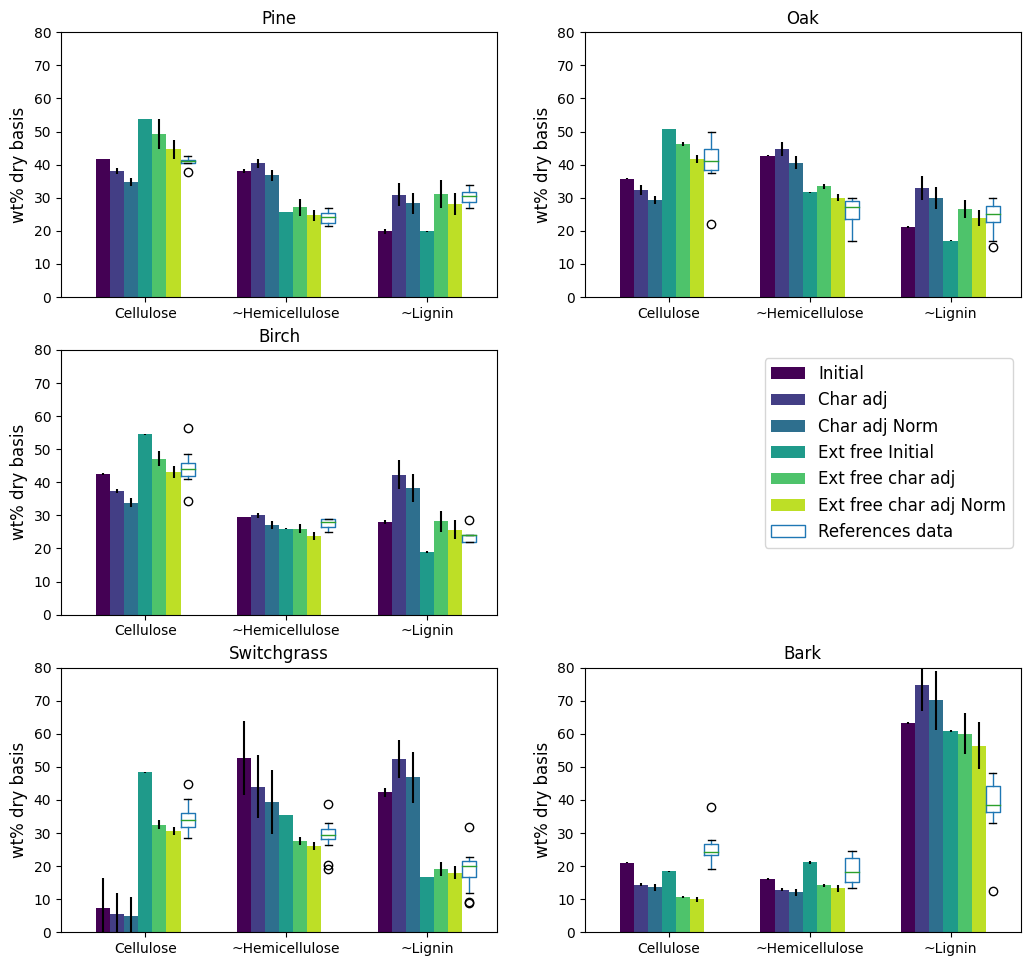

In [ ]:
#@title plot bar charts

xc_list = ['Cellulose','~Hemicellulose','~Lignin']

def plot_bar_feedstock(feedname,df):
  ind = numpy.arange(3)
  width = 0.1

  feedname_ex = feedname + ' Extractive-free'

  ### plot 1
  plt.bar(x = ind,           height = df5mean['c_list']['Normal boundary'][feedname], yerr=df5std['c_list']['Normal boundary'][feedname], width = width, label = 'Initial', color=colors2[0])
  plt.bar(x = ind + width,   height = df5mean['c_CharAdj_list']['Normal boundary'][feedname], yerr=df5std['c_CharAdj_list']['Normal boundary'][feedname], width = width,label = 'Char adj',color=colors2[1])
  plt.bar(x = ind + 2*width,   height = df5mean['c_CharAdj_norm_list']['Normal boundary'][feedname], yerr=df5std['c_CharAdj_norm_list']['Normal boundary'][feedname], width = width,label = 'Char adj Norm', color=colors2[2])
  plt.bar(x = ind + 3*width,   height = df5mean['c_list']['Normal boundary'][feedname_ex], yerr=df5std['c_list']['Normal boundary'][feedname_ex], width = width,label = 'Ext free Initial', color=colors2[3])
  plt.bar(x = ind + 4*width, height = df5mean['c_CharAdj_list']['Normal boundary'][feedname_ex], yerr=df5std['c_CharAdj_list']['Normal boundary'][feedname_ex], width = width,label = 'Ext free char adj', color=colors2[4])
  plt.bar(x = ind + 5*width, height = df5mean['c_CharAdj_norm_list']['Normal boundary'][feedname_ex], yerr=df5std['c_CharAdj_norm_list']['Normal boundary'][feedname_ex], width = width, label = 'Ext free char adj Norm', color=colors2[5])
  bplot = df.boxplot(column='yaxis', by='xaxis',ax=ax, positions=ind+ 6*width, widths=width, grid=False)
  #plt.scatter(x = ind, y = df5mean['mean'][feedname])

  bplot.set_xlabel('')
  plt.ylabel('wt% dry basis', fontsize=fz)
  plt.xlim([-0.3,2.8])
  plt.ylim([0,80])
  plt.xticks(ind + 6*width/2, xc_list)
  plt.title(feedname)
  plt.suptitle('')


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(3, 2, 1)

plot_bar_feedstock('Pine',Pine_ref3)

ax = fig.add_subplot(3, 2, 2)

plot_bar_feedstock('Oak',Oak_ref3)

ax = fig.add_subplot(3, 2, 3)

plot_bar_feedstock('Birch',Birch_ref3)

ax = fig.add_subplot(3, 2, 4)

plot_bar_feedstock('Pine',Pine_ref3)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

red_patch = patches.Patch(edgecolor='tab:blue', fill=False)
new_handles.append(red_patch)
labels.append('References data')
ax.clear()

ax.legend(new_handles, labels, loc='best', fontsize=fz)
ax.axis('off')

ax = fig.add_subplot(3, 2, 5)

plot_bar_feedstock('Switchgrass',Switchgrass_ref3)

ax = fig.add_subplot(3, 2, 6)

plot_bar_feedstock('Bark',Bark_ref3)

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Feedstocks_fit5curves_methods_bar.png',dpi=300,bbox_inches='tight')

plt.show()

In [ ]:
feedname = 'Pine'
print(df5mean['c_CharAdj_list']['Normal boundary'][feedname], df5std['c_CharAdj_list']['Normal boundary'][feedname])
print(df5mean['c_CharAdj_norm_list']['Normal boundary'][feedname], df5std['c_CharAdj_norm_list']['Normal boundary'][feedname])

[37.977031458571716, 40.35052599294503, 30.963231994971803] [0.8735208082852365, 1.41115829181078, 3.3708161338566205]
[34.67216421555491, 36.839110632898944, 28.268725151546164] [1.2544100630760926, 1.648708740011993, 3.1771190251264634]


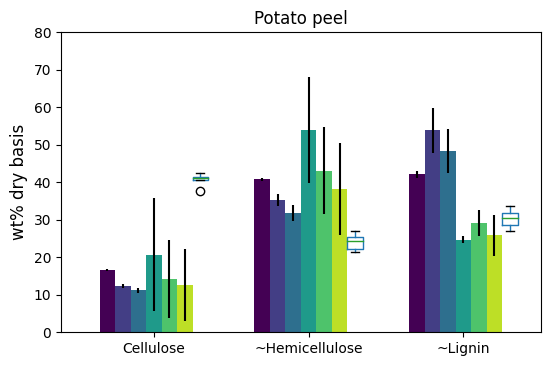

In [ ]:

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1, 1)
plot_bar_feedstock('Potato peel',Pine_ref3)

(0.0, 1.0, 0.0, 1.0)

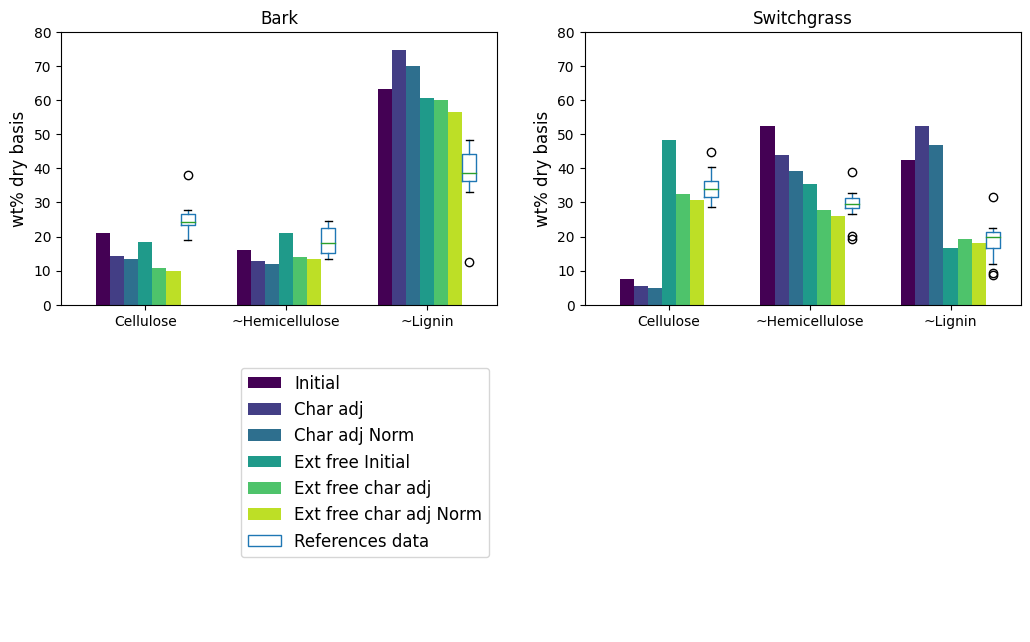

In [ ]:
xc_list = ['Cellulose','~Hemicellulose','~Lignin']

def plot_bar_feedstock(feedname,df):
  ind = numpy.arange(3)
  width = 0.1

  feedname_ex = feedname + ' Extractive-free'

  ### plot 1
  plt.bar(x = ind,           height = df5mean['c_list']['Normal boundary'][feedname], width = width, label = 'Initial', color=colors2[0])
  plt.bar(x = ind + width,   height = df5mean['c_CharAdj_list']['Normal boundary'][feedname], width = width,label = 'Char adj',color=colors2[1])
  plt.bar(x = ind + 2*width,   height = df5mean['c_CharAdj_norm_list']['Normal boundary'][feedname], width = width,label = 'Char adj Norm', color=colors2[2])
  plt.bar(x = ind + 3*width,   height = df5mean['c_list']['Normal boundary'][feedname_ex], width = width,label = 'Ext free Initial', color=colors2[3])
  plt.bar(x = ind + 4*width, height = df5mean['c_CharAdj_list']['Normal boundary'][feedname_ex],  width = width,label = 'Ext free char adj', color=colors2[4])
  plt.bar(x = ind + 5*width, height = df5mean['c_CharAdj_norm_list']['Normal boundary'][feedname_ex],  width = width, label = 'Ext free char adj Norm', color=colors2[5])
  bplot = df.boxplot(column='yaxis', by='xaxis',ax=ax, positions=ind+ 6*width, widths=width, grid=False)
  #plt.scatter(x = ind, y = df5mean['mean'][feedname])

  bplot.set_xlabel('')
  plt.ylabel('wt% dry basis', fontsize=fz)
  plt.xlim([-0.3,2.8])
  plt.ylim([0,80])
  plt.xticks(ind + 6*width/2, xc_list)
  plt.title(feedname)
  plt.suptitle('')


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2, 2, 1)

plot_bar_feedstock('Bark',Bark_ref3)

ax = fig.add_subplot(2, 2, 2)

plot_bar_feedstock('Switchgrass',Switchgrass_ref3)

ax = fig.add_subplot(2, 2, 3)

plot_bar_feedstock('Bark',Bark_ref3)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

red_patch = patches.Patch(edgecolor='tab:blue', fill=False)
new_handles.append(red_patch)
labels.append('References data')
ax.clear()

ax.legend(new_handles, labels, loc='best', fontsize=fz)
ax.axis('off')



#10) Archive

KeyError: ignored

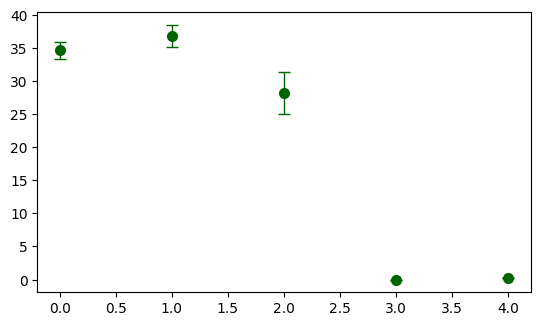

In [ ]:
# Plot points side-by-side - compare extended boundary fit 5 curves

def plot_comparefit2(feedname,df):

  ind = numpy.arange(5)
  width = 0.1

  feedname_ex = feedname + ' Extractive-free'
  plt.errorbar(x = ind,         y = df5mean['percentdb']['Normal boundary'][feedname], yerr=df5std['percentdb']['Normal boundary'][feedname],label = 'Fit normal bound.', **marker1)
  plt.errorbar(x = ind + width, y = df5mean['percentdb']['Extended boundary'][feedname], yerr=df5std['percentdb']['Extended boundary'][feedname],label = 'Fit extended bound.', **marker8)
  plt.errorbar(x = ind + 2*width, y = df5mean['percentdb']['Normal boundary'][feedname_ex], yerr=df5std['percentdb']['Normal boundary'][feedname_ex],label = 'Ext.free Fit normal bound.', **marker7)
  plt.errorbar(x = ind + 3*width, y = df5mean['percentdb']['Extended boundary'][feedname_ex], yerr=df5std['percentdb']['Extended boundary'][feedname_ex],label = 'Ext.free Fit extended bound.', **marker3)
  bplot = df.boxplot(column='yaxis', by='xaxis',ax=ax, positions=ind+ 4*width, widths=width, grid=False)

  bplot.set_xlabel('')
  plt.ylabel('wt% dry basis', fontsize=fz)
  plt.xticks(ind + 5*width/2, x_list)
  plt.title(feedname)
  plt.suptitle('')



fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(2, 2, 1)

plot_comparefit2('Pine',Pine_ref)

ax = fig.add_subplot(2, 2, 2)

plot_comparefit2('Birch',Birch_ref)

ax = fig.add_subplot(2, 2, 3)

plot_comparefit2('Oak',Oak_ref)


ax = fig.add_subplot(2, 2, 4)

plot_comparefit2('Pine',Pine_ref)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
red_patch = patches.Patch(edgecolor='tab:blue', fill=False)
new_handles.append(red_patch)
labels.append('References data')
ax.clear()

ax.legend(new_handles, labels, loc='best', fontsize=fz)
ax.axis('off')

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Feedstocks_fit5curves_compare_boundary.png',dpi=300,bbox_inches='tight')



In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1, 1)
plot_comparefit2('Potato peel',Pine_ref)

# 11) Fit results 3 curves

Need to run the following sections before running this section<br>
0), 6), 9)

In [ ]:
#@title Load data (fit results)

df3curves =  pandas.read_excel('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Fit_results_for_python.xlsx', sheet_name='FitResults_3curves')

#get char weight from exp data
df3curves = pandas.merge(df3curves,dfexp[['Name','Feedstock','Char_Wpercent_db']], on='Name',how='left')

df3curves.head()

Name         Boundary     B_Cell      E_Cell    c_Cell  \
0          Pine20Kpm_R1  Normal boundary  12.325849  235.226456  0.424313   
1          Pine20Kpm_R2  Normal boundary  12.328873  234.747823  0.423496   
2  PineExtFree_20Kpm_R1  Normal boundary  12.426614  246.086244  0.536602   
3  PineExtFree_20Kpm_R2  Normal boundary  12.423868  246.357857  0.537324   
4            PP20Kpm_R4  Normal boundary  11.180333  117.113097  0.360698   

      B_Hemi      E_Hemi    c_Hemi      B_Lig      E_Lig     c_Lig      R_sq  \
0  11.700000  111.711389  0.363932  20.061621  29.830123  0.192716  0.994724   
1  11.700000  112.703005  0.354925  19.588910  30.734328  0.203527  0.998805   
2  11.699999  145.055779  0.233102  18.250764  31.540931  0.206333  0.998562   
3  11.699999  145.515558  0.230668  18.290632  31.575987  0.209763  0.998384   
4  10.702467  154.799943  0.170795  18.220405  27.400005  0.398208  0.969987   

     T_Cell   T_hemic     T_lig  Area fit/Area Exp             Feedstock  \
0  375.0612  329.7293  405.8191           0.983651                  Pine   
1  375.2534  329.9502  405.9116           0.985104                  Pine   
2  380.5602  336.5946  388.5516           0.979998  Pine Extractive-free   
3  380.5464  336.7294  389.5592           0.981591  Pine Extractive-free   
4  306.5306  288.6436  354.5470           0.944814           Potato peel   

   Char_Wpercent_db  
0             15.38  
1             14.95  
2             12.18  
3             13.88  
4             23.52

In [ ]:
df3curves.columns

Index(['Name', 'Boundary', 'B_Cell', 'E_Cell', 'c_Cell', 'B_Hemi', 'E_Hemi',
       'c_Hemi', 'B_Lig', 'E_Lig', 'c_Lig', 'R_sq', 'T_Cell', 'T_hemic',
       'T_lig', 'Area fit/Area Exp', 'Feedstock', 'Char_Wpercent_db'],
      dtype='object')

In [ ]:
#@title Calculate the average and SD
#df3 = pandas.DataFrame()

#df3mean = df3curves[(df3curves['Boundary']=='Normal boundary')][['B_Cell', 'E_Cell', 'c_Cell', 'B_Hemi', 'E_Hemi',
#       'c_Hemi', 'B_Lig', 'E_Lig', 'c_Lig', 'R_sq', 'T_Cell', 'T_hemic', 'T_lig', 'Area fit/Area Exp', 'Feedstock', 'Char_Wpercent_db']].groupby('Feedstock').mean()
#df3std = df3curves[(df3curves['Boundary']=='Normal boundary')][['B_Cell', 'E_Cell', 'c_Cell', 'B_Hemi', 'E_Hemi',
#       'c_Hemi', 'B_Lig', 'E_Lig', 'c_Lig', 'R_sq', 'T_Cell', 'T_hemic', 'T_lig', 'Area fit/Area Exp', 'Feedstock', 'Char_Wpercent_db']].groupby('Feedstock').std()
df3mean = df3curves[['B_Cell', 'E_Cell', 'c_Cell', 'B_Hemi', 'E_Hemi',
       'c_Hemi', 'B_Lig', 'E_Lig', 'c_Lig', 'R_sq', 'T_Cell', 'T_hemic', 'T_lig', 'Area fit/Area Exp', 'Feedstock', 'Char_Wpercent_db','Boundary']].groupby(['Boundary','Feedstock']).mean()
df3std = df3curves[['B_Cell', 'E_Cell', 'c_Cell', 'B_Hemi', 'E_Hemi',
       'c_Hemi', 'B_Lig', 'E_Lig', 'c_Lig', 'R_sq', 'T_Cell', 'T_hemic', 'T_lig', 'Area fit/Area Exp', 'Feedstock', 'Char_Wpercent_db','Boundary']].groupby(['Boundary','Feedstock']).std()

#print(df3std)
df3mean.head()

B_Cell      E_Cell    c_Cell  \
Boundary          Feedstock                                                
Extended boundary Bark                   12.091298  113.642835  0.314966   
                  Bark Extractive-free   12.058205  114.188160  0.379524   
                  Birch                  12.334153  234.115508  0.390559   
                  Birch Extractive-free  12.527672  248.447202  0.525162   
                  Oak                    12.320602  223.842802  0.437427   

                                            B_Hemi      E_Hemi    c_Hemi  \
Boundary          Feedstock                                                
Extended boundary Bark                   10.680449   89.869708  0.135164   
                  Bark Extractive-free   10.632524  128.521896  0.066596   
                  Birch                  11.999998   81.791142  0.363798   
                  Birch Extractive-free  11.904837   85.500931  0.301641   
                  Oak                    11.388257   96.081609  0.399369   

                                             B_Lig      E_Lig     c_Lig  \
Boundary          Feedstock                                               
Extended boundary Bark                   40.640693  20.157119  0.549389   
                  Bark Extractive-free   40.748938  20.600197  0.555083   
                  Birch                  23.256638  26.176183  0.223997   
                  Birch Extractive-free  18.835291  36.606984  0.153975   
                  Oak                    17.428949  40.309096  0.146195   

                                             R_sq     T_Cell    T_hemic  \
Boundary          Feedstock                                               
Extended boundary Bark                   0.980855  348.46335  275.30990   
                  Bark Extractive-free   0.982182  347.05660  282.30860   
                  Birch                  0.993297  375.46380  330.02515   
                  Birch Extractive-free  0.997617  385.86970  328.13795   
                  Oak                    0.993597  374.27895  310.09090   

                                             T_lig  Area fit/Area Exp  \
Boundary          Feedstock                                             
Extended boundary Bark                   427.77980           0.995080   
                  Bark Extractive-free   437.55790           0.997156   
                  Birch                  411.14210           0.979912   
                  Birch Extractive-free  435.12980           0.984167   
                  Oak                    425.37495           0.984123   

                                         Char_Wpercent_db  
Boundary          Feedstock                                
Extended boundary Bark                          33.346950  
                  Bark Extractive-free          33.025284  
                  Birch                         17.760000  
                  Birch Extractive-free         13.305000  
                  Oak                           15.945000

In [ ]:
df3std.head()

B_Cell    E_Cell    c_Cell  \
Boundary          Feedstock                                             
Extended boundary Bark                   0.001209  0.311295  0.000817   
                  Bark Extractive-free   0.003557  0.336127  0.000291   
                  Birch                  0.000842  0.120613  0.004042   
                  Birch Extractive-free  0.001726  0.205227  0.002836   
                  Oak                    0.003876  0.371156  0.001992   

                                               B_Hemi    E_Hemi    c_Hemi  \
Boundary          Feedstock                                                 
Extended boundary Bark                   2.654435e-04  0.258195  0.000282   
                  Bark Extractive-free   9.877264e-04  0.175842  0.000033   
                  Birch                  1.439118e-08  0.047340  0.000387   
                  Birch Extractive-free  1.268618e-02  0.510675  0.002425   
                  Oak                    8.778032e-03  0.642528  0.003639   

                                            B_Lig     E_Lig         c_Lig  \
Boundary          Feedstock                                                 
Extended boundary Bark                   1.149014  0.193118  1.446602e-03   
                  Bark Extractive-free   0.668027  0.177861  6.824067e-04   
                  Birch                  0.733470  0.842524  5.152789e-07   
                  Birch Extractive-free  0.224997  0.748997  8.130332e-04   
                  Oak                    0.072126  0.281313  2.069605e-03   

                                             R_sq    T_Cell   T_hemic  \
Boundary          Feedstock                                             
Extended boundary Bark                   0.002568  0.006576  0.072266   
                  Bark Extractive-free   0.000080  0.071276  0.092490   
                  Birch                  0.005674  0.013294  0.058053   
                  Birch Extractive-free  0.000114  0.063215  0.281923   
                  Oak                    0.001598  0.113491  0.153725   

                                            T_lig  Area fit/Area Exp  \
Boundary          Feedstock                                            
Extended boundary Bark                   0.035780           0.000289   
                  Bark Extractive-free   1.293581           0.000068   
                  Birch                  1.528906           0.005003   
                  Birch Extractive-free  0.193747           0.001310   
                  Oak                    0.301440           0.000220   

                                         Char_Wpercent_db  
Boundary          Feedstock                                
Extended boundary Bark                           0.561372  
                  Bark Extractive-free           0.600639  
                  Birch                          0.212132  
                  Birch Extractive-free          0.601041  
                  Oak                            0.671751

In [ ]:
#@title Add extractives and ash data
#df3mean['Boundary']=df3mean.index[0]
df3mean.reset_index(inplace=True)
df3mean = pandas.merge(df3mean,ExtAsh[['Feedstock','Extractives','Ash']], on='Feedstock',how='left')

df3mean.head()

Boundary              Feedstock     B_Cell      E_Cell    c_Cell  \
0  Extended boundary                   Bark  12.091298  113.642835  0.314966   
1  Extended boundary   Bark Extractive-free  12.058205  114.188160  0.379524   
2  Extended boundary                  Birch  12.334153  234.115508  0.390559   
3  Extended boundary  Birch Extractive-free  12.527672  248.447202  0.525162   
4  Extended boundary                    Oak  12.320602  223.842802  0.437427   

      B_Hemi      E_Hemi    c_Hemi      B_Lig      E_Lig     c_Lig      R_sq  \
0  10.680449   89.869708  0.135164  40.640693  20.157119  0.549389  0.980855   
1  10.632524  128.521896  0.066596  40.748938  20.600197  0.555083  0.982182   
2  11.999998   81.791142  0.363798  23.256638  26.176183  0.223997  0.993297   
3  11.904837   85.500931  0.301641  18.835291  36.606984  0.153975  0.997617   
4  11.388257   96.081609  0.399369  17.428949  40.309096  0.146195  0.993597   

      T_Cell    T_hemic      T_lig  Area fit/Area Exp  Char_Wpercent_db  \
0  348.46335  275.30990  427.77980           0.995080         33.346950   
1  347.05660  282.30860  437.55790           0.997156         33.025284   
2  375.46380  330.02515  411.14210           0.979912         17.760000   
3  385.86970  328.13795  435.12980           0.984167         13.305000   
4  374.27895  310.09090  425.37495           0.984123         15.945000   

   Extractives   Ash  
0     0.000000  4.21  
1    16.617061  4.37  
2     0.000000  0.81  
3     7.100000  0.39  
4     0.000000  0.08

In [ ]:
df3std.reset_index(inplace=True)
df3std = pandas.merge(df3std,ExtAsh[['Feedstock','err_Extractives','err_Ash']], on='Feedstock',how='left')

df3std.head(10)

Boundary                    Feedstock    B_Cell     E_Cell  \
0  Extended boundary                         Bark  0.001209   0.311295   
1  Extended boundary         Bark Extractive-free  0.003557   0.336127   
2  Extended boundary                        Birch  0.000842   0.120613   
3  Extended boundary        Birch Extractive-free  0.001726   0.205227   
4  Extended boundary                          Oak  0.003876   0.371156   
5  Extended boundary          Oak Extractive-free  0.013575   0.413152   
6  Extended boundary                         Pine  0.000429   5.568869   
7  Extended boundary         Pine Extractive-free  0.001998   0.083122   
8  Extended boundary                  Potato peel  0.001555   3.010516   
9  Extended boundary  Potato peel Extractive-free  0.002539  15.663036   

     c_Cell        B_Hemi    E_Hemi    c_Hemi     B_Lig     E_Lig  \
0  0.000817  2.654435e-04  0.258195  0.000282  1.149014  0.193118   
1  0.000291  9.877264e-04  0.175842  0.000033  0.668027  0.177861   
2  0.004042  1.439118e-08  0.047340  0.000387  0.733470  0.842524   
3  0.002836  1.268618e-02  0.510675  0.002425  0.224997  0.748997   
4  0.001992  8.778032e-03  0.642528  0.003639  0.072126  0.281313   
5  0.000577  7.487485e-03  0.061193  0.003104  0.369807  1.227255   
6  0.015240  4.062765e-02  2.067976  0.024376  0.120915  0.089399   
7  0.000750  8.273825e-04  0.431170  0.002064  0.025930  0.019758   
8  0.000984  1.598474e-03  0.155839  0.001606  0.066223  0.058806   
9  0.050161  3.710213e-02  3.857871  0.054665  0.779231  3.358688   

          c_Lig      R_sq    T_Cell   T_hemic     T_lig  Area fit/Area Exp  \
0  1.446602e-03  0.002568  0.006576  0.072266  0.035780           0.000289   
1  6.824067e-04  0.000080  0.071276  0.092490  1.293581           0.000068   
2  5.152789e-07  0.005674  0.013294  0.058053  1.528906           0.005003   
3  8.130332e-04  0.000114  0.063215  0.281923  0.193747           0.001310   
4  2.069605e-03  0.001598  0.113491  0.153725  0.301440           0.000220   
5  2.589235e-03  0.000336  0.698975  0.378231  1.716855           0.000917   
6  9.996546e-03  0.002845  0.102530  1.021062  1.685743           0.001190   
7  2.519545e-03  0.000127  0.006576  0.021142  0.718986           0.001117   
8  2.251978e-03  0.017793  0.178332  0.064771  0.228678           0.001829   
9  8.366678e-03  0.000282  0.682689  0.342132  4.305401           0.001572   

   Char_Wpercent_db  err_Extractives  err_Ash  
0          0.561372         0.000000     0.01  
1          0.600639         0.036616     0.01  
2          0.212132         0.000000     0.01  
3          0.601041         0.900000     0.00  
4          0.671751         0.000000     0.03  
5          0.035355         0.030000     0.00  
6          0.304056         0.000000     0.00  
7          1.202082         0.000000     0.00  
8          0.997021         0.000000     0.10  
9          0.684787         2.300000     0.00

In [ ]:
#@title Calculate c

# Convert to fraction
df3mean['Char_frac'] = df3mean['Char_Wpercent_db']/100
df3mean['Ext_frac'] = df3mean['Extractives']/100

df3std['Char_frac'] = df3std['Char_Wpercent_db']/100
df3std['Ext_frac'] = df3std['err_Extractives']/100

# convert Ash (wt% db extractive free basis to wt% db)
df3mean['Ash_db'] = df3mean['Ash']*(1-df3mean['Ext_frac'].fillna(0))
df3mean['Ash_frac'] = df3mean['Ash_db']/100

df3std['Ash_db'] = df3std['err_Ash']*(1-df3std['Ext_frac'].fillna(0))
df3std['Ash_frac'] = df3std['Ash_db']/100

# Adjusted with extractive and ash content
df3mean['c_Cell_EAAdj'] = df3mean['c_Cell']*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])
df3mean['c_Hemi_EAAdj'] = df3mean['c_Hemi']*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])
df3mean['c_Lig_EAAdj']  = df3mean['c_Lig']*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])

df3std['c_Cell_EAAdj'] = df3mean['c_Cell_EAAdj']*numpy.sqrt(pow(df3std['c_Cell']/df3mean['c_Cell'],2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'],2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))
df3std['c_Hemi_EAAdj'] = df3mean['c_Hemi_EAAdj']*numpy.sqrt(pow(df3std['c_Hemi']/df3mean['c_Hemi'],2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'],2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))
df3std['c_Lig_EAAdj'] = df3mean['c_Lig_EAAdj']*numpy.sqrt(pow(df3std['c_Lig']/df3mean['c_Lig'],2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'],2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))

# Char adjust (and adjust with extractive and ash content)
df3mean['c_Cell_CharAdj'] = df3mean['c_Cell']*(1-df3mean['Char_frac'])/(1-Cell_Charfrac/100)*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])
df3mean['c_Hemi_CharAdj'] = df3mean['c_Hemi']*(1-df3mean['Char_frac'])/(1-Hemi_Charfrac/100)*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])
df3mean['c_Lig_CharAdj']  = df3mean['c_Lig']*(1-df3mean['Char_frac'])/(1-Lig_Charfrac/100)*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])

df3std['c_Cell_CharAdj'] = df3mean['c_Cell_CharAdj']*numpy.sqrt(pow(df3std['c_Cell']/df3mean['c_Cell'],2)
                                                              + pow(df3std['Char_frac']/df3mean['Char_frac'],2)
                                                              + pow(err_Cell_Charfrac/100/(1-Cell_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'],2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))
df3std['c_Hemi_CharAdj'] = df3mean['c_Hemi_CharAdj']*numpy.sqrt(pow(df3std['c_Hemi']/df3mean['c_Hemi'],2)
                                                              + pow(df3std['Char_frac']/df3mean['Char_frac'],2)
                                                              + pow(err_Hemi_Charfrac/100/(1-Hemi_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'],2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))
df3std['c_Lig_CharAdj'] = df3mean['c_Lig_CharAdj']*numpy.sqrt(pow(df3std['c_Lig']/df3mean['c_Lig'],2)
                                                              + pow(df3std['Char_frac']/df3mean['Char_frac'],2)
                                                              + pow(err_Lig_Charfrac/100/(1-Lig_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'],2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))

# Normalization with extractives ()
'''
col_list = ['c_Cell_CharAdj','c_Hemi_CharAdj','c_Lig_CharAdj']
df3mean['Sum_frac'] = df3mean[col_list].sum(axis=1)
df3std['Sum_frac'] = numpy.sqrt(pow(df3std['c_Cell_CharAdj'],2) + pow(df3std['c_Hemi_CharAdj'],2) + pow(df3std['c_Lig_CharAdj'],2))

df3mean['c_Cell_CharAdj_norm'] = df3mean['c_Cell_CharAdj']/df3mean['Sum_frac']*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])
df3mean['c_Hemi_CharAdj_norm'] = df3mean['c_Hemi_CharAdj']/df3mean['Sum_frac']*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])
df3mean['c_Lig_CharAdj_norm']  = df3mean['c_Lig_CharAdj']/df3mean['Sum_frac']*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])

df3std['c_Cell_CharAdj_norm'] = df3mean['c_Cell_CharAdj_norm']*numpy.sqrt(pow(df3std['c_Cell']/df3mean['c_Cell'],2)
                                                              + pow(df3std['Sum_frac']/df3mean['Sum_frac'],2)
                                                              + pow(err_Cell_Charfrac/100/(1-Cell_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'].fillna(0),2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))
df3std['c_Hemi_CharAdj_norm'] = df3mean['c_Hemi_CharAdj_norm']*numpy.sqrt(pow(df3std['c_Hemi']/df3mean['c_Hemi'],2)
                                                              + pow(df3std['Sum_frac']/df3mean['Sum_frac'],2)
                                                              + pow(err_Hemi_Charfrac/100/(1-Hemi_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'].fillna(0),2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))
df3std['c_Lig_CharAdj_norm'] = df3mean['c_Lig_CharAdj_norm']*numpy.sqrt(pow(df3std['c_Lig']/df3mean['c_Lig'],2)
                                                              + pow(df3std['Sum_frac']/df3mean['Sum_frac'],2)
                                                              + pow(err_Lig_Charfrac/100/(1-Lig_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'].fillna(0),2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))
'''

df3mean['c_Cell_CharAdj_norm_temp'] = df3mean['c_Cell']/(1-Cell_Charfrac/100)
df3mean['c_Hemi_CharAdj_norm_temp'] = df3mean['c_Hemi']/(1-Hemi_Charfrac/100)
df3mean['c_Lig_CharAdj_norm_temp']  = df3mean['c_Lig']/(1-Lig_Charfrac/100)
df3mean['Sum_frac'] = df3mean['c_Cell_CharAdj_norm_temp'] + df3mean['c_Hemi_CharAdj_norm_temp'] + df3mean['c_Lig_CharAdj_norm_temp']
df3std['Sum_frac'] = (df3mean['c_Cell_CharAdj_norm_temp']*numpy.sqrt(pow(df3std['c_Cell']/df3mean['c_Cell'],2) + pow(err_Cell_Charfrac/100/(1-Cell_Charfrac/100),2))
                      + df3mean['c_Hemi_CharAdj_norm_temp']*numpy.sqrt(pow(df3std['c_Hemi']/df3mean['c_Hemi'],2)  + pow(err_Hemi_Charfrac/100/(1-Hemi_Charfrac/100),2))
                      + df3mean['c_Lig_CharAdj_norm_temp']*numpy.sqrt(pow(df3std['c_Lig']/df3mean['c_Lig'],2)    + pow(err_Lig_Charfrac/100/(1-Lig_Charfrac/100),2)))

df3mean['c_Cell_CharAdj_norm'] = df3mean['c_Cell_CharAdj_norm_temp']/df3mean['Sum_frac']*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])
df3mean['c_Hemi_CharAdj_norm'] = df3mean['c_Hemi_CharAdj_norm_temp']/df3mean['Sum_frac']*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])
df3mean['c_Lig_CharAdj_norm']  = df3mean['c_Lig_CharAdj_norm_temp']/df3mean['Sum_frac']*(1-df3mean['Ext_frac']-df3mean['Ash_frac'])

df3std['c_Cell_CharAdj_norm'] = df3mean['c_Cell_CharAdj_norm']*numpy.sqrt(pow(df3std['c_Cell']/df3mean['c_Cell'],2)
                                                              + pow(df3std['Sum_frac']/df3mean['Sum_frac'],2)
                                                              + pow(err_Cell_Charfrac/100/(1-Cell_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'].fillna(0),2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))
df3std['c_Hemi_CharAdj_norm'] = df3mean['c_Hemi_CharAdj_norm']*numpy.sqrt(pow(df3std['c_Hemi']/df3mean['c_Hemi'],2)
                                                              + pow(df3std['Sum_frac']/df3mean['Sum_frac'],2)
                                                              + pow(err_Hemi_Charfrac/100/(1-Hemi_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'].fillna(0),2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))
df3std['c_Lig_CharAdj_norm'] = df3mean['c_Lig_CharAdj_norm']*numpy.sqrt(pow(df3std['c_Lig']/df3mean['c_Lig'],2)
                                                              + pow(df3std['Sum_frac']/df3mean['Sum_frac'],2)
                                                              + pow(err_Lig_Charfrac/100/(1-Lig_Charfrac/100),2)
                                                              + pow(numpy.sqrt(pow(df3std['Ext_frac'].fillna(0),2) + pow(df3std['Ash_frac'].fillna(0),2))/(1-df3mean['Ext_frac']-df3mean['Ash_frac']),2))

df3mean['sum_check'] = df3mean[['c_Cell_CharAdj_norm','c_Hemi_CharAdj_norm','c_Lig_CharAdj_norm','Ext_frac','Ash_frac']].sum(axis=1)

df3mean['Cell_percentdb'] = 100*df3mean['c_Cell_CharAdj_norm']
df3mean['Hemi_percentdb'] = 100*df3mean['c_Hemi_CharAdj_norm']
df3mean['Lig_percentdb'] = 100*df3mean['c_Lig_CharAdj_norm']

df3std['Cell_percentdb'] = 100*df3std['c_Cell_CharAdj_norm']
df3std['Hemi_percentdb'] = 100*df3std['c_Hemi_CharAdj_norm']
df3std['Lig_percentdb'] = 100*df3std['c_Lig_CharAdj_norm']

df3mean.head()

Boundary              Feedstock     B_Cell      E_Cell    c_Cell  \
0  Extended boundary                   Bark  12.091298  113.642835  0.314966   
1  Extended boundary   Bark Extractive-free  12.058205  114.188160  0.379524   
2  Extended boundary                  Birch  12.334153  234.115508  0.390559   
3  Extended boundary  Birch Extractive-free  12.527672  248.447202  0.525162   
4  Extended boundary                    Oak  12.320602  223.842802  0.437427   

      B_Hemi      E_Hemi    c_Hemi      B_Lig      E_Lig     c_Lig      R_sq  \
0  10.680449   89.869708  0.135164  40.640693  20.157119  0.549389  0.980855   
1  10.632524  128.521896  0.066596  40.748938  20.600197  0.555083  0.982182   
2  11.999998   81.791142  0.363798  23.256638  26.176183  0.223997  0.993297   
3  11.904837   85.500931  0.301641  18.835291  36.606984  0.153975  0.997617   
4  11.388257   96.081609  0.399369  17.428949  40.309096  0.146195  0.993597   

      T_Cell    T_hemic      T_lig  Area fit/Area Exp  Char_Wpercent_db  \
0  348.46335  275.30990  427.77980           0.995080         33.346950   
1  347.05660  282.30860  437.55790           0.997156         33.025284   
2  375.46380  330.02515  411.14210           0.979912         17.760000   
3  385.86970  328.13795  435.12980           0.984167         13.305000   
4  374.27895  310.09090  425.37495           0.984123         15.945000   

   Extractives   Ash  Char_frac  Ext_frac    Ash_db  Ash_frac  c_Cell_EAAdj  \
0     0.000000  4.21   0.333469  0.000000  4.210000  0.042100      0.301706   
1    16.617061  4.37   0.330253  0.166171  3.643834  0.036438      0.302629   
2     0.000000  0.81   0.177600  0.000000  0.810000  0.008100      0.387396   
3     7.100000  0.39   0.133050  0.071000  0.362310  0.003623      0.485973   
4     0.000000  0.08   0.159450  0.000000  0.080000  0.000800      0.437077   

   c_Hemi_EAAdj  c_Lig_EAAdj  c_Cell_CharAdj  c_Hemi_CharAdj  c_Lig_CharAdj  \
0      0.129474     0.526260        0.216839        0.107873       0.648011   
1      0.053103     0.442618        0.218552        0.044457       0.547649   
2      0.360851     0.222182        0.343535        0.370955       0.337563   
3      0.279132     0.142485        0.454296        0.302492       0.228206   
4      0.399050     0.146078        0.396145        0.419276       0.226835   

   c_Cell_CharAdj_norm_temp  c_Hemi_CharAdj_norm_temp  \
0                  0.339623                  0.168955   
1                  0.409235                  0.083245   
2                  0.421134                  0.454747   
3                  0.566274                  0.377051   
4                  0.471670                  0.499211   

   c_Lig_CharAdj_norm_temp  Sum_frac  c_Cell_CharAdj_norm  \
0                 1.014944  1.523522             0.213534   
1                 1.025463  1.517942             0.214975   
2                 0.413812  1.289693             0.323893   
3                 0.284455  1.227780             0.426800   
4                 0.270081  1.240963             0.379780   

   c_Hemi_CharAdj_norm  c_Lig_CharAdj_norm  sum_check  Cell_percentdb  \
0             0.106229            0.638137        1.0       21.353450   
1             0.043729            0.538686        1.0       21.497529   
2             0.349745            0.318262        1.0       32.389293   
3             0.284183            0.214393        1.0       42.680005   
4             0.401956            0.217464        1.0       37.978031   

   Hemi_percentdb  Lig_percentdb  
0       10.622892      63.813658  
1        4.372929      53.868646  
2       34.974511      31.826196  
3       28.418336      21.439349  
4       40.195578      21.746391

In [ ]:
df3std.head()

Boundary              Feedstock    B_Cell    E_Cell    c_Cell  \
0  Extended boundary                   Bark  0.001209  0.311295  0.000817   
1  Extended boundary   Bark Extractive-free  0.003557  0.336127  0.000291   
2  Extended boundary                  Birch  0.000842  0.120613  0.004042   
3  Extended boundary  Birch Extractive-free  0.001726  0.205227  0.002836   
4  Extended boundary                    Oak  0.003876  0.371156  0.001992   

         B_Hemi    E_Hemi    c_Hemi     B_Lig     E_Lig         c_Lig  \
0  2.654435e-04  0.258195  0.000282  1.149014  0.193118  1.446602e-03   
1  9.877264e-04  0.175842  0.000033  0.668027  0.177861  6.824067e-04   
2  1.439118e-08  0.047340  0.000387  0.733470  0.842524  5.152789e-07   
3  1.268618e-02  0.510675  0.002425  0.224997  0.748997  8.130332e-04   
4  8.778032e-03  0.642528  0.003639  0.072126  0.281313  2.069605e-03   

       R_sq    T_Cell   T_hemic     T_lig  Area fit/Area Exp  \
0  0.002568  0.006576  0.072266  0.035780           0.000289   
1  0.000080  0.071276  0.092490  1.293581           0.000068   
2  0.005674  0.013294  0.058053  1.528906           0.005003   
3  0.000114  0.063215  0.281923  0.193747           0.001310   
4  0.001598  0.113491  0.153725  0.301440           0.000220   

   Char_Wpercent_db  err_Extractives  err_Ash  Char_frac  Ext_frac    Ash_db  \
0          0.561372         0.000000     0.01   0.005614  0.000000  0.010000   
1          0.600639         0.036616     0.01   0.006006  0.000366  0.009996   
2          0.212132         0.000000     0.01   0.002121  0.000000  0.010000   
3          0.601041         0.900000     0.00   0.006010  0.009000  0.000000   
4          0.671751         0.000000     0.03   0.006718  0.000000  0.030000   

   Ash_frac  c_Cell_EAAdj  c_Hemi_EAAdj  c_Lig_EAAdj  c_Cell_CharAdj  \
0    0.0001      0.000783      0.000270     0.001387        0.004422   
1    0.0001      0.000273      0.000036     0.000584        0.004674   
2    0.0001      0.004010      0.000386     0.000022        0.006658   
3    0.0000      0.005406      0.003522     0.001577        0.021741   
4    0.0003      0.001994      0.003638     0.002068        0.017365   

   c_Hemi_CharAdj  c_Lig_CharAdj  Sum_frac  c_Cell_CharAdj_norm  \
0        0.003148       0.066762  0.111098             0.015764   
1        0.001330       0.056534  0.110779             0.015874   
2        0.009870       0.034535  0.059284             0.015688   
3        0.015903       0.025501  0.045444             0.017176   
4        0.020634       0.025157  0.046115             0.014843   

   c_Hemi_CharAdj_norm  c_Lig_CharAdj_norm  Cell_percentdb  Hemi_percentdb  \
0             0.008150            0.079827        1.576407        0.814989   
1             0.003356            0.067394        1.587423        0.335624   
2             0.018100            0.035493        1.568766        1.809988   
3             0.013002            0.023305        1.717557        1.300204   
4             0.018102            0.023728        1.484296        1.810179   

   Lig_percentdb  
0       7.982711  
1       6.739365  
2       3.549308  
3       2.330534  
4       2.372793

In [ ]:
#@title Create mean and SD list for plotting

df3mean['List'] = df3mean[['Cell_percentdb','Hemi_percentdb','Lig_percentdb','Extractives','Ash_db']].fillna(0).values.tolist()
df3std['List'] = df3std[['Cell_percentdb','Hemi_percentdb','Lig_percentdb','err_Extractives','Ash_db']].fillna(0).values.tolist()

df3mean['List3'] = df3mean[['Cell_percentdb','Hemi_percentdb','Lig_percentdb']].values.tolist()
df3std['List3'] = df3std[['Cell_percentdb','Hemi_percentdb','Lig_percentdb']].values.tolist()

df3mean.set_index(['Boundary','Feedstock'],inplace=True)
df3std.set_index(['Boundary','Feedstock'],inplace=True)
#df3mean.head()
df3std.head()

B_Cell    E_Cell    c_Cell  \
Boundary          Feedstock                                             
Extended boundary Bark                   0.001209  0.311295  0.000817   
                  Bark Extractive-free   0.003557  0.336127  0.000291   
                  Birch                  0.000842  0.120613  0.004042   
                  Birch Extractive-free  0.001726  0.205227  0.002836   
                  Oak                    0.003876  0.371156  0.001992   

                                               B_Hemi    E_Hemi    c_Hemi  \
Boundary          Feedstock                                                 
Extended boundary Bark                   2.654435e-04  0.258195  0.000282   
                  Bark Extractive-free   9.877264e-04  0.175842  0.000033   
                  Birch                  1.439118e-08  0.047340  0.000387   
                  Birch Extractive-free  1.268618e-02  0.510675  0.002425   
                  Oak                    8.778032e-03  0.642528  0.003639   

                                            B_Lig     E_Lig         c_Lig  \
Boundary          Feedstock                                                 
Extended boundary Bark                   1.149014  0.193118  1.446602e-03   
                  Bark Extractive-free   0.668027  0.177861  6.824067e-04   
                  Birch                  0.733470  0.842524  5.152789e-07   
                  Birch Extractive-free  0.224997  0.748997  8.130332e-04   
                  Oak                    0.072126  0.281313  2.069605e-03   

                                             R_sq    T_Cell   T_hemic  \
Boundary          Feedstock                                             
Extended boundary Bark                   0.002568  0.006576  0.072266   
                  Bark Extractive-free   0.000080  0.071276  0.092490   
                  Birch                  0.005674  0.013294  0.058053   
                  Birch Extractive-free  0.000114  0.063215  0.281923   
                  Oak                    0.001598  0.113491  0.153725   

                                            T_lig  Area fit/Area Exp  \
Boundary          Feedstock                                            
Extended boundary Bark                   0.035780           0.000289   
                  Bark Extractive-free   1.293581           0.000068   
                  Birch                  1.528906           0.005003   
                  Birch Extractive-free  0.193747           0.001310   
                  Oak                    0.301440           0.000220   

                                         Char_Wpercent_db  err_Extractives  \
Boundary          Feedstock                                                  
Extended boundary Bark                           0.561372         0.000000   
                  Bark Extractive-free           0.600639         0.036616   
                  Birch                          0.212132         0.000000   
                  Birch Extractive-free          0.601041         0.900000   
                  Oak                            0.671751         0.000000   

                                         err_Ash  Char_frac  Ext_frac  \
Boundary          Feedstock                                             
Extended boundary Bark                      0.01   0.005614  0.000000   
                  Bark Extractive-free      0.01   0.006006  0.000366   
                  Birch                     0.01   0.002121  0.000000   
                  Birch Extractive-free     0.00   0.006010  0.009000   
                  Oak                       0.03   0.006718  0.000000   

                                           Ash_db  Ash_frac  c_Cell_EAAdj  \
Boundary          Feedstock                                                 
Extended boundary Bark                   0.010000    0.0001      0.000783   
                  Bark Extractive-free   0.009996    0.0001      0.000273   
                  Birch                  0.010000    0.0001      0.

In [ ]:
print(df3mean['List']['Normal boundary']['Switchgrass'])
print(df3mean['List']['Normal boundary']['Switchgrass Extractive-free'])

[25.901693299514562, 15.695129841323851, 49.433176859161584, 0.0, 8.97]
[31.316072125243355, 26.298038349202997, 17.118265233456377, 23.03565838527011, 2.231965906827167]


In [ ]:
print(df3std['List']['Normal boundary']['Pine'])

[1.6904012803696529, 1.9215313921539314, 3.385075774973957, 0.0, 0.0]


In [ ]:
#@title Arrange c in to list for comparison
# c_initial

df3mean['c_list'] = (100*df3mean[['c_Cell','c_Hemi','c_Lig']].values).tolist()
df3std['c_list'] = (100*df3std[['c_Cell','c_Hemi','c_Lig']].values).tolist()

df3mean['c_CharAdj_list'] = (100*df3mean[['c_Cell_CharAdj','c_Hemi_CharAdj','c_Lig_CharAdj']].values).tolist()
df3std['c_CharAdj_list'] = (100*df3std[['c_Cell_CharAdj','c_Hemi_CharAdj','c_Lig_CharAdj']].values).tolist()

df3mean['c_CharAdj_norm_list'] = (100*df3mean[['c_Cell_CharAdj_norm','c_Hemi_CharAdj_norm','c_Lig_CharAdj_norm']].values).tolist()
df3std['c_CharAdj_norm_list'] = (100*df3std[['c_Cell_CharAdj_norm','c_Hemi_CharAdj_norm','c_Lig_CharAdj_norm']].values).tolist()

df3mean['c_EAAdj_list'] = (100*df3mean[['c_Cell_EAAdj','c_Hemi_EAAdj','c_Lig_EAAdj']].values).tolist()
df3std['c_EAAdj_list'] = (100*df3std[['c_Cell_EAAdj','c_Hemi_EAAdj','c_Lig_EAAdj']].values).tolist()


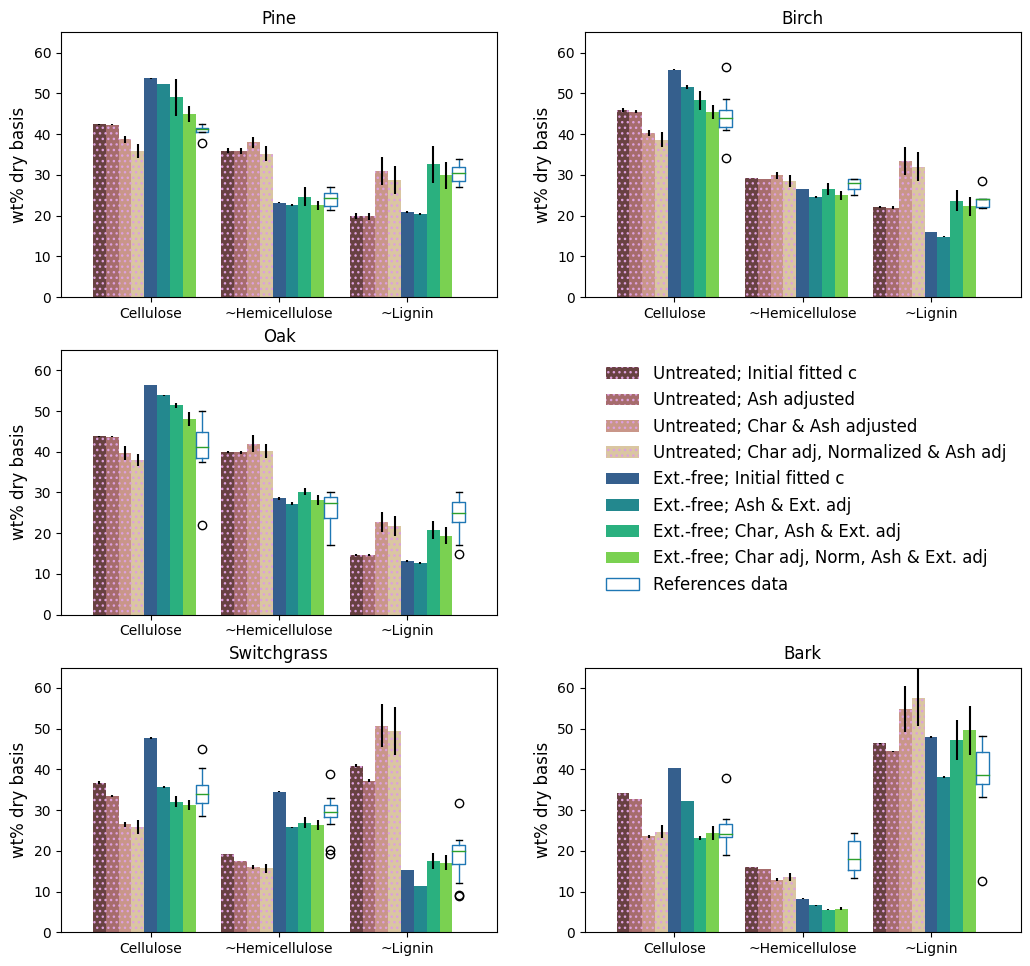

In [ ]:
#@title plot bar charts compare fit

xc_list = ['Cellulose','~Hemicellulose','~Lignin']
hh = '...'
cc = 'plum'

def plot_bar_feedstock(feedname,df):
  ind = numpy.arange(3)
  width = 0.1

  feedname_ex = feedname + ' Extractive-free'

  ### plot 1

  '''
  plt.bar(x = ind,           height = df3mean['c_list'][feedname], yerr=df3std['c_list'][feedname], width = width, label = 'Initial', color=colors2[0])
  plt.bar(x = ind + width,   height = df3mean['c_CharAdj_list'][feedname], yerr=df3std['c_CharAdj_list'][feedname], width = width,label = 'Char adj',color=colors2[1])
  plt.bar(x = ind + 2*width,   height = df3mean['c_CharAdj_norm_list'][feedname], yerr=df3std['c_CharAdj_norm_list'][feedname], width = width,label = 'Char adj Norm', color=colors2[2])
  plt.bar(x = ind + 3*width,   height = df3mean['c_list'][feedname_ex], yerr=df3std['c_list'][feedname_ex], width = width,label = 'Ext free Initial', color=colors2[3])
  plt.bar(x = ind + 4*width, height = df3mean['c_CharAdj_list'][feedname_ex], yerr=df3std['c_CharAdj_list'][feedname_ex], width = width,label = 'Ext free char adj', color=colors2[4])
  plt.bar(x = ind + 5*width, height = df3mean['c_CharAdj_norm_list'][feedname_ex], yerr=df3std['c_CharAdj_norm_list'][feedname_ex], width = width, label = 'Ext free char adj Norm', color=colors2[5])
  '''
  plt.bar(x = ind,           height = df3mean['c_list']['Normal boundary'][feedname], yerr=df3std['c_list']['Normal boundary'][feedname],
          width = width, label = 'Untreated; Initial fitted c', color=colors4[0], hatch=hh,edgecolor=cc,linewidth=0)
  plt.bar(x = ind + width,   height = df3mean['c_EAAdj_list']['Normal boundary'][feedname], yerr=df3std['c_EAAdj_list']['Normal boundary'][feedname],
          width = width,label = 'Untreated; Ash adjusted',color=colors4[1], hatch=hh,edgecolor=cc,linewidth=0)
  plt.bar(x = ind + 2*width,   height = df3mean['c_CharAdj_list']['Normal boundary'][feedname], yerr=df3std['c_CharAdj_list']['Normal boundary'][feedname],
          width = width,label = 'Untreated; Char & Ash adjusted',color=colors4[2], hatch=hh,edgecolor=cc,linewidth=0)
  plt.bar(x = ind + 3*width,   height = df3mean['c_CharAdj_norm_list']['Normal boundary'][feedname], yerr=df3std['c_CharAdj_norm_list']['Normal boundary'][feedname],
          width = width,label = 'Untreated; Char adj, Normalized & Ash adj', color=colors4[3], hatch=hh,edgecolor=cc,linewidth=0)
  plt.bar(x = ind + 4*width,   height = df3mean['c_list']['Normal boundary'][feedname_ex], yerr=df3std['c_list']['Normal boundary'][feedname_ex],
          width = width,label = 'Ext.-free; Initial fitted c', color=colors3[0])
  plt.bar(x = ind + 5*width, height = df3mean['c_EAAdj_list']['Normal boundary'][feedname_ex], yerr=df3std['c_EAAdj_list']['Normal boundary'][feedname_ex],
          width = width,label = 'Ext.-free; Ash & Ext. adj', color=colors3[1])
  plt.bar(x = ind + 6*width, height = df3mean['c_CharAdj_list']['Normal boundary'][feedname_ex], yerr=df3std['c_CharAdj_list']['Normal boundary'][feedname_ex],
          width = width,label = 'Ext.-free; Char, Ash & Ext. adj', color=colors3[2])
  plt.bar(x = ind + 7*width, height = df3mean['c_CharAdj_norm_list']['Normal boundary'][feedname_ex], yerr=df3std['c_CharAdj_norm_list']['Normal boundary'][feedname_ex],
          width = width, label = 'Ext.-free; Char adj, Norm, Ash & Ext. adj', color=colors3[3])
  bplot = df.boxplot(column='yaxis', by='xaxis',ax=ax, positions=ind+ 8*width, widths=width, grid=False)
  #plt.scatter(x = ind, y = df3mean['mean'][feedname])

  bplot.set_xlabel('')
  plt.ylabel('wt% dry basis', fontsize=fz)
  plt.xlim([-0.3,3.1])
  plt.ylim([0,65])
  plt.xticks(ind + 8*width/2, xc_list)
  plt.title(feedname)
  plt.suptitle('')


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(3, 2, 1)

plot_bar_feedstock('Pine',Pine_ref3)

ax = fig.add_subplot(3, 2, 2)

plot_bar_feedstock('Birch',Birch_ref3)

ax = fig.add_subplot(3, 2, 3)

plot_bar_feedstock('Oak',Oak_ref3)

ax = fig.add_subplot(3, 2, 4)

plot_bar_feedstock('Pine',Pine_ref3)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

red_patch = patches.Patch(edgecolor='tab:blue', fill=False)
new_handles.append(red_patch)
labels.append('References data')
ax.clear()

ax.legend(new_handles, labels, loc='best', fontsize=fz,frameon=False)
ax.axis('off')

ax = fig.add_subplot(3, 2, 5)

plot_bar_feedstock('Switchgrass', Switchgrass_ref3)

ax = fig.add_subplot(3, 2, 6)

plot_bar_feedstock('Bark',Bark_ref3)

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Feedstocks_fit3curves_methods_bar.png',dpi=300,bbox_inches='tight')

plt.show()

In [ ]:
df3mean.head()

B_Cell      E_Cell    c_Cell  \
Boundary          Feedstock                                                
Extended boundary Bark                   12.091298  113.642835  0.314966   
                  Bark Extractive-free   12.058205  114.188160  0.379524   
                  Birch                  12.334153  234.115508  0.390559   
                  Birch Extractive-free  12.527672  248.447202  0.525162   
                  Oak                    12.320602  223.842802  0.437427   

                                            B_Hemi      E_Hemi    c_Hemi  \
Boundary          Feedstock                                                
Extended boundary Bark                   10.680449   89.869708  0.135164   
                  Bark Extractive-free   10.632524  128.521896  0.066596   
                  Birch                  11.999998   81.791142  0.363798   
                  Birch Extractive-free  11.904837   85.500931  0.301641   
                  Oak                    11.388257   96.081609  0.399369   

                                             B_Lig      E_Lig     c_Lig  \
Boundary          Feedstock                                               
Extended boundary Bark                   40.640693  20.157119  0.549389   
                  Bark Extractive-free   40.748938  20.600197  0.555083   
                  Birch                  23.256638  26.176183  0.223997   
                  Birch Extractive-free  18.835291  36.606984  0.153975   
                  Oak                    17.428949  40.309096  0.146195   

                                             R_sq     T_Cell    T_hemic  \
Boundary          Feedstock                                               
Extended boundary Bark                   0.980855  348.46335  275.30990   
                  Bark Extractive-free   0.982182  347.05660  282.30860   
                  Birch                  0.993297  375.46380  330.02515   
                  Birch Extractive-free  0.997617  385.86970  328.13795   
                  Oak                    0.993597  374.27895  310.09090   

                                             T_lig  Area fit/Area Exp  \
Boundary          Feedstock                                             
Extended boundary Bark                   427.77980           0.995080   
                  Bark Extractive-free   437.55790           0.997156   
                  Birch                  411.14210           0.979912   
                  Birch Extractive-free  435.12980           0.984167   
                  Oak                    425.37495           0.984123   

                                         Char_Wpercent_db  Extractives   Ash  \
Boundary          Feedstock                                                    
Extended boundary Bark                          33.346950     0.000000  4.21   
                  Bark Extractive-free          33.025284    16.617061  4.37   
                  Birch                         17.760000     0.000000  0.81   
                  Birch Extractive-free         13.305000     7.100000  0.39   
                  Oak                           15.945000     0.000000  0.08   

                                         Char_frac  Ext_frac    Ash_db  \
Boundary          Feedstock                                              
Extended boundary Bark                    0.333469  0.000000  4.210000   
                  Bark Extractive-free    0.330253  0.166171  3.643834   
                  Birch                   0.177600  0.000000  0.810000   
                  Birch Extractive-free   0.133050  0.071000  0.362310   
                  Oak                     0.159450  0.000000  0.080000   

                                         Ash_frac  c_Cell_EAAdj  c_Hemi_EAAdj  \
Boundary          Feedstock                                                     
Extended boundary Bark                   0.042100      0.301706      0.129474   
                  Bark Extractive-free   0.036438      0.302629      0.053103   
          

In [ ]:
df3mean.loc['Normal boundary'].index.tolist()

['Bark',
 'Bark Extractive-free',
 'Birch',
 'Birch Extractive-free',
 'Oak',
 'Oak Extractive-free',
 'Pine',
 'Pine Extractive-free',
 'Potato peel',
 'Potato peel Extractive-free',
 'Switchgrass',
 'Switchgrass Extractive-free']

In [ ]:
#@title Plot E, B, T_peaks, R_sq Normal boundary

#df3mean.drop(index=(['Potato peel','Potato peel Extractive-free']), level=1, inplace=True)
#df3std.drop(['Potato peel','Potato peel Extractive-free'], level=1, inplace=True)

df3meanN = df3mean.loc['Normal boundary']
df3stdN = df3std.loc['Normal boundary']

#df3meanN.drop(index=(['Potato peel','Potato peel Extractive-free']), inplace=True)
#df3stdN.drop(['Potato peel','Potato peel Extractive-free'], inplace=True)


In [ ]:
lst = ['Pine', 'Pine Extractive-free','Birch', 'Birch Extractive-free', 'Oak',
       'Oak Extractive-free', 'Switchgrass','Switchgrass Extractive-free',
       'Bark', 'Bark Extractive-free']

df3meanN = df3meanN.loc[lst]
df3stdN = df3stdN.loc[lst]

Normal boundary


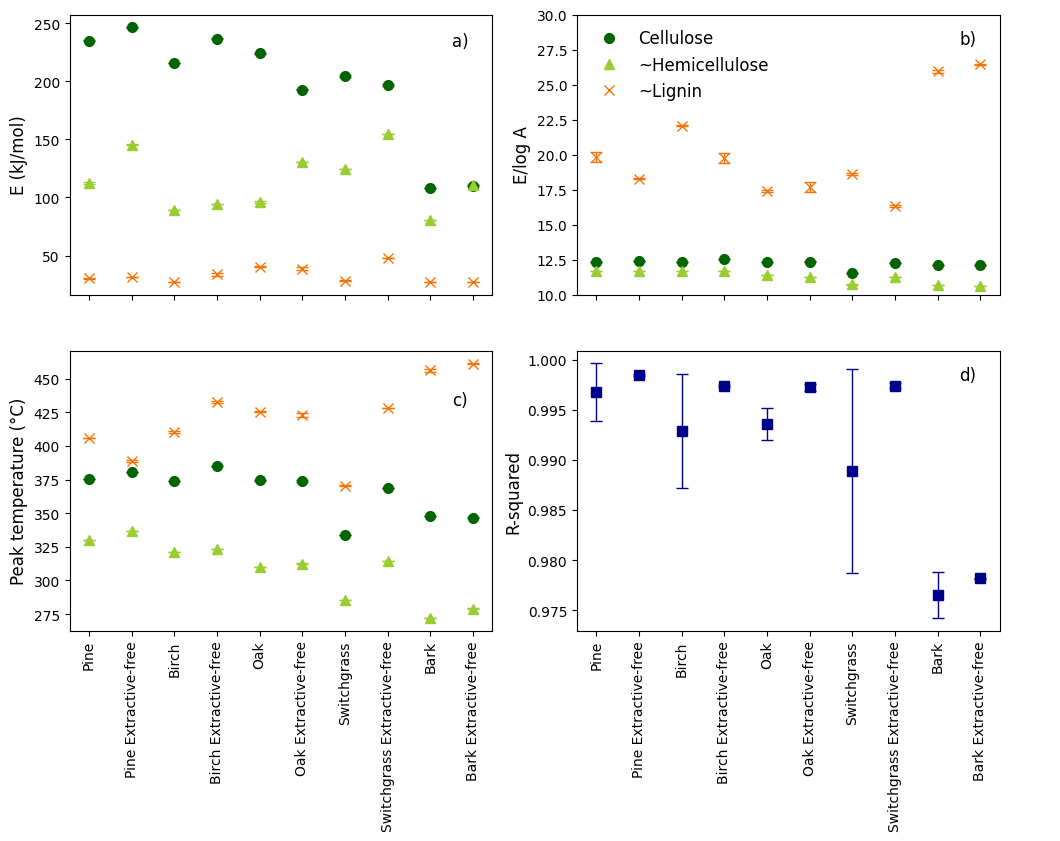

In [ ]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2, 2, 1)

plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['E_Cell'], yerr=df3stdN['E_Cell'], label = 'E_Cell', **marker1)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['E_Hemi'], yerr=df3stdN['E_Hemi'], label = 'E_Hemi', **marker2)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['E_Lig'], yerr=df3stdN['E_Lig'], label = 'E_Lig', **marker3)
#plt.xticks(rotation=90)
plt.xticks(color='w')
plt.ylabel('E (kJ/mol)', fontsize=fz)
plt.text(8.5, 230, r'a)', fontsize=fz)

ax = fig.add_subplot(2, 2, 2)

plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['B_Cell'], yerr=df3stdN['B_Cell'], label = 'Cellulose', **marker1)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['B_Hemi'], yerr=df3stdN['B_Hemi'], label = '~Hemicellulose', **marker2)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['B_Lig'], yerr=df3stdN['B_Lig'], label = '~Lignin', **marker3)
#plt.xticks(rotation=90)
plt.xticks(color='w')
plt.ylabel('E/log A', fontsize=fz)
plt.ylim([10,30])
plt.text(8.5, 27.9, r'b)', fontsize=fz)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc='upper left', fontsize=fz, frameon=False)
#ax.legend(new_handles, labels, loc='center right', bbox_to_anchor = (0.5,0.4), fontsize=fz)

ax = fig.add_subplot(2, 2, 3)

plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['T_Cell'], yerr=df3stdN['T_Cell'], label = 'Cellulose', **marker1)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['T_hemic'], yerr=df3stdN['T_hemic'], label = '~Hemicellulose', **marker2)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['T_lig'], yerr=df3stdN['T_lig'], label = '~Lignin', **marker3)
plt.xticks(rotation=90)
plt.ylabel('Peak temperature (°C)', fontsize=fz)
plt.text(8.5, 430, r'c)', fontsize=fz)

ax = fig.add_subplot(2, 2, 4)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['R_sq'], yerr=df3stdN['R_sq'], label = 'Rsq', **marker15)
plt.xticks(rotation=90)
plt.ylabel('R-squared', fontsize=fz)
plt.text(8.5, 0.998, r'd)', fontsize=fz)



#plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Kin_param_fit3curves.png',dpi=300,bbox_inches='tight')

print('Normal boundary')
plt.show()

Normal boundary


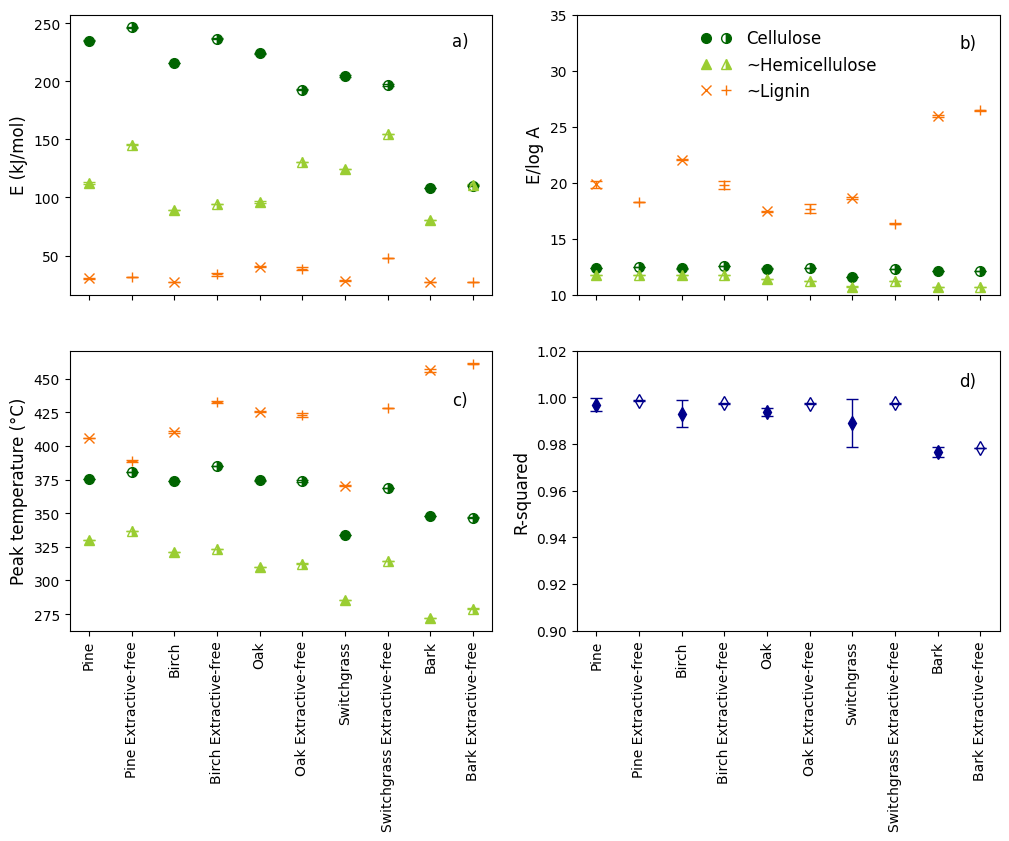

In [ ]:
#@title Plot E, B, T_peaks, R_sq Normal boundary v2
from matplotlib.legend_handler import HandlerTuple

lst1 = ['Pine', 'Birch', 'Oak', 'Switchgrass','Bark']

lst2 = ['Pine Extractive-free','Birch Extractive-free',
       'Oak Extractive-free', 'Switchgrass Extractive-free',
       'Bark Extractive-free']

df3meanN1 = df3meanN.loc[lst1]
df3stdN1 = df3stdN.loc[lst1]
df3meanN2 = df3meanN.loc[lst2]
df3stdN2 = df3stdN.loc[lst2]

ind = numpy.arange(10)
ind1 = numpy.arange(0,10,2)
ind2 = numpy.arange(1,10,2)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2, 2, 1)

plt.errorbar(x = ind1, y = df3meanN1['E_Cell'], yerr=df3stdN1['E_Cell'], label = 'E_Cell', **marker1)
plt.errorbar(x = ind1, y = df3meanN1['E_Hemi'], yerr=df3stdN1['E_Hemi'], label = 'E_Hemi', **marker2)
plt.errorbar(x = ind1, y = df3meanN1['E_Lig'], yerr=df3stdN1['E_Lig'], label = 'E_Lig', **marker21)
plt.errorbar(x = ind2, y = df3meanN2['E_Cell'], yerr=df3stdN2['E_Cell'], label = 'E_Cell', **marker17)
plt.errorbar(x = ind2, y = df3meanN2['E_Hemi'], yerr=df3stdN2['E_Hemi'], label = 'E_Hemi', **marker18)
plt.errorbar(x = ind2, y = df3meanN2['E_Lig'], yerr=df3stdN2['E_Lig'], label = 'E_Lig', **marker19)
#plt.xticks(rotation=90)
plt.xticks(ind, color='w')
plt.ylabel('E (kJ/mol)', fontsize=fz)
plt.text(8.5, 230, r'a)', fontsize=fz)

ax = fig.add_subplot(2, 2, 2)

plt.errorbar(x = ind1, y = df3meanN1['B_Cell'], yerr=df3stdN1['B_Cell'], label = 'Cellulose', **marker1)
plt.errorbar(x = ind1, y = df3meanN1['B_Hemi'], yerr=df3stdN1['B_Hemi'], label = '~Hemicellulose', **marker2)
plt.errorbar(x = ind1, y = df3meanN1['B_Lig'], yerr=df3stdN1['B_Lig'], label = '~Lignin', **marker21)
plt.errorbar(x = ind2, y = df3meanN2['B_Cell'], yerr=df3stdN2['B_Cell'], label = 'Cellulose', **marker17)
plt.errorbar(x = ind2, y = df3meanN2['B_Hemi'], yerr=df3stdN2['B_Hemi'],label = '~Hemicellulose',  **marker18)
plt.errorbar(x = ind2, y = df3meanN2['B_Lig'], yerr=df3stdN2['B_Lig'], label = '~Lignin',  **marker19)
#plt.xticks(rotation=90)
plt.xticks(ind, color='w')
plt.ylabel('E/log A', fontsize=fz)
plt.ylim([10,35])
plt.text(8.5, 32, r'b)', fontsize=fz)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

ax.legend([(new_handles[0],new_handles[3]),(new_handles[1],new_handles[4]),(new_handles[2],new_handles[5])],
          [labels[0],labels[1],labels[2]], handler_map={tuple: HandlerTuple(ndivide=None)},
          loc='upper center', fontsize=fz, frameon=False)

ax = fig.add_subplot(2, 2, 3)

plt.errorbar(x = ind1, y = df3meanN1['T_Cell'], yerr=df3stdN1['T_Cell'], label = 'Cellulose', **marker1)
plt.errorbar(x = ind1, y = df3meanN1['T_hemic'], yerr=df3stdN1['T_hemic'], label = '~Hemicellulose', **marker2)
plt.errorbar(x = ind1, y = df3meanN1['T_lig'], yerr=df3stdN1['T_lig'], label = '~Lignin', **marker21)
plt.errorbar(x = ind2, y = df3meanN2['T_Cell'], yerr=df3stdN2['T_Cell'], **marker17)
plt.errorbar(x = ind2, y = df3meanN2['T_hemic'], yerr=df3stdN2['T_hemic'], **marker18)
plt.errorbar(x = ind2, y = df3meanN2['T_lig'], yerr=df3stdN2['T_lig'], **marker19)
plt.xticks(ind, lst, rotation=90)
plt.ylabel('Peak temperature (°C)', fontsize=fz)
plt.text(8.5, 430, r'c)', fontsize=fz)

ax = fig.add_subplot(2, 2, 4)
plt.errorbar(x = ind1, y = df3meanN1['R_sq'], yerr=df3stdN1['R_sq'], label = 'Rsq', **marker22)
plt.errorbar(x = ind2, y = df3meanN2['R_sq'], yerr=df3stdN2['R_sq'], label = 'Rsq', **marker23)
plt.xticks(ind, lst, rotation=90)
plt.ylabel('R-squared', fontsize=fz)
plt.ylim([0.9,1.02])
plt.text(8.5, 1.005, r'd)', fontsize=fz)



plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Kin_param_fit3curves.png',dpi=300,bbox_inches='tight')

print('Normal boundary')
plt.show()

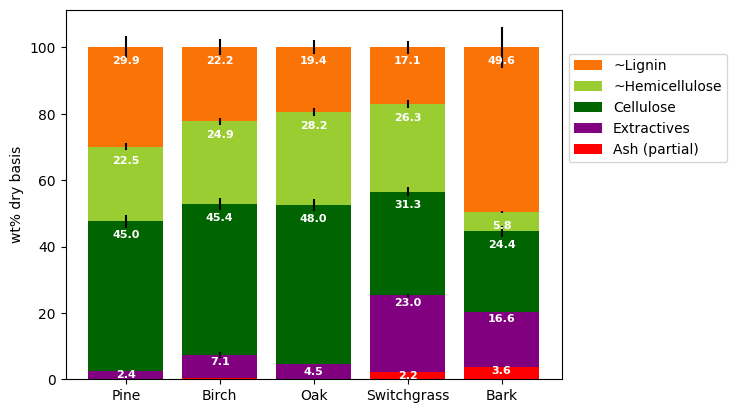

In [ ]:
#@title Stacked bar plot all compositions
# (based on extractive-free samples)

List_samples = ['Pine','Birch','Oak','Switchgrass','Bark']
List_ext = [x + " Extractive-free" for x in List_samples]


to_plot = {
    "Ash (partial)":  df3meanN['Ash_db'].loc[List_ext],
    "Extractives":  df3meanN['Extractives'].loc[List_ext],
    "Cellulose": df3meanN['Cell_percentdb'].loc[List_ext],
    "~Hemicellulose": df3meanN['Hemi_percentdb'].loc[List_ext],
    "~Lignin": df3meanN['Lig_percentdb'].loc[List_ext]
}

to_plot_std = {
    "Ash (partial)":  df3stdN['Ash_db'].loc[List_ext],
    "Extractives":  df3stdN['err_Extractives'].loc[List_ext],
    "Cellulose": df3stdN['Cell_percentdb'].loc[List_ext],
    "~Hemicellulose": df3stdN['Hemi_percentdb'].loc[List_ext],
    "~Lignin": df3stdN['Lig_percentdb'].loc[List_ext]
}

fig, ax = plt.subplots()

bottom = numpy.zeros(len(List_samples))
color_list = ['r','purple','darkgreen','yellowgreen','#F97306']

i=0
for key, val in to_plot.items():
  ax.bar(List_samples, val, yerr= to_plot_std[key], label=key, bottom = bottom, color = color_list[i])
  bottom += val
  i += 1

plt.ylabel("wt% dry basis")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left',bbox_to_anchor=(1, 0.9))

y_offset = -5
for bar in ax.patches[10:25]:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height(),1),
      ha='center', color='w', weight='bold', size=8)

y_offset = -3
for bar in ax.patches[6:10]:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height(),1),
      ha='center', color='w', weight='bold', size=8)

y_offset = -2
for bar in ax.patches[3:6]:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height(),1),
      ha='center', color='w', weight='bold', size=8)

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/fit3curves_stacked_bar.png',dpi=300,bbox_inches='tight')

plt.show()

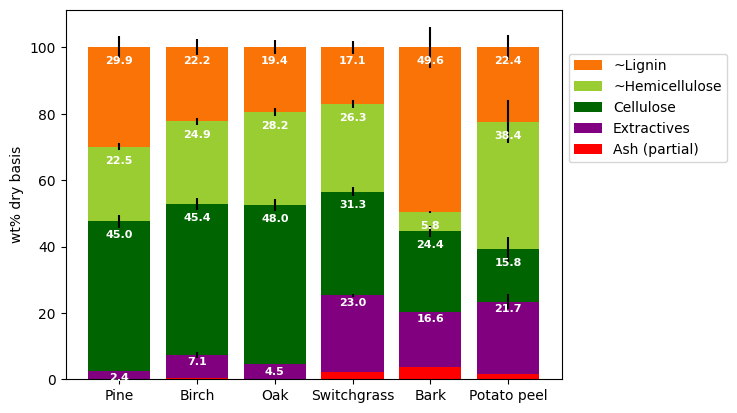

In [ ]:
#@title Stacked bar plot all compositions v2
# (based on extractive-free samples)

df3meanN = df3mean.loc['Normal boundary']
df3stdN = df3std.loc['Normal boundary']

List_samples = ['Pine','Birch','Oak','Switchgrass','Bark','Potato peel']
List_ext = [x + " Extractive-free" for x in List_samples]

df3meanN = df3meanN.loc[List_ext]
df3stdN = df3stdN.loc[List_ext]

to_plot = {
    "Ash (partial)":  df3meanN['Ash_db'].loc[List_ext],
    "Extractives":  df3meanN['Extractives'].loc[List_ext],
    "Cellulose": df3meanN['Cell_percentdb'].loc[List_ext],
    "~Hemicellulose": df3meanN['Hemi_percentdb'].loc[List_ext],
    "~Lignin": df3meanN['Lig_percentdb'].loc[List_ext]
}

to_plot_std = {
    "Ash (partial)":  df3stdN['Ash_db'].loc[List_ext],
    "Extractives":  df3stdN['err_Extractives'].loc[List_ext],
    "Cellulose": df3stdN['Cell_percentdb'].loc[List_ext],
    "~Hemicellulose": df3stdN['Hemi_percentdb'].loc[List_ext],
    "~Lignin": df3stdN['Lig_percentdb'].loc[List_ext]
}

fig, ax = plt.subplots()

bottom = numpy.zeros(len(List_samples))
color_list = ['r','purple','darkgreen','yellowgreen','#F97306']

i=0
for key, val in to_plot.items():
  ax.bar(List_samples, val, yerr= to_plot_std[key], label=key, bottom = bottom, color = color_list[i])
  bottom += val
  i += 1

plt.ylabel("wt% dry basis")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left',bbox_to_anchor=(1, 0.9))

y_offset = -5
for bar in ax.patches[12:30]:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height(),1),
      ha='center', color='w', weight='bold', size=8)

y_offset = -3
for bar in ax.patches[6:12]:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height(),1),
      ha='center', color='w', weight='bold', size=8)


plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/fit3curves_stacked_bar_v2.png',dpi=300,bbox_inches='tight')

plt.show()

#12) Compare fit with 3 and 5 curves

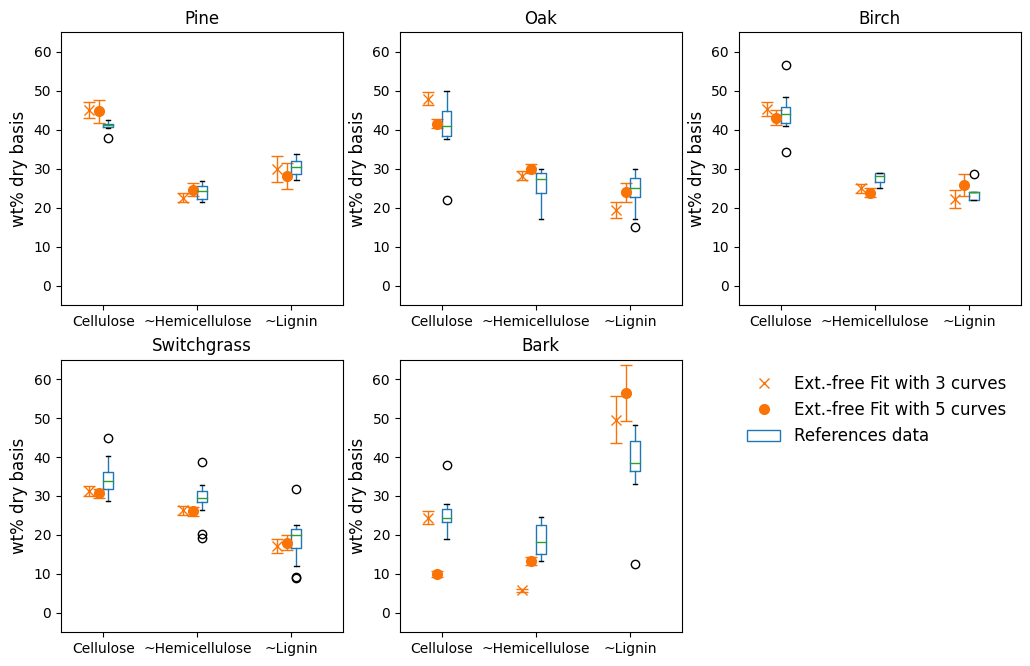

In [ ]:
#@title Plot compare 3 and 5 curves

def plot_comparefit2(feedname,df):

  ind = numpy.arange(3)
  width = 0.1

  feedname_ex = feedname + ' Extractive-free'
  #plt.errorbar(x = ind        , y = df3mean['List'][feedname], yerr=df3std['List'][feedname],label = 'Fit with 3 curves', **marker8)
  #plt.errorbar(x = ind + width, y = df5mean['percentdb']['Normal boundary'][feedname], yerr=df5std['percentdb']['Normal boundary'][feedname],label = 'Fit with 5 curves', **marker1)
  plt.errorbar(x = ind , y = df3mean['List3']['Normal boundary'][feedname_ex], yerr=df3std['List3']['Normal boundary'][feedname_ex],label = 'Ext.-free Fit with 3 curves', **marker3)
  plt.errorbar(x = ind + width, y = df5mean['list3']['Normal boundary'][feedname_ex], yerr=df5std['list3']['Normal boundary'][feedname_ex],label = 'Ext.-free Fit with 5 curves', **marker7)
  bplot = df.boxplot(column='yaxis', by='xaxis',ax=ax, positions=ind+ 2*width, widths=width, grid=False)

  bplot.set_xlabel('')
  plt.ylabel('wt% dry basis', fontsize=fz)
  plt.xticks(ind + 3*width/2, x_list3)
  plt.ylim([-5,65])
  plt.title(feedname)
  plt.suptitle('')



fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2, 3, 1)

plot_comparefit2('Pine',Pine_ref3)

ax = fig.add_subplot(2, 3, 2)

plot_comparefit2('Oak',Oak_ref3)

ax = fig.add_subplot(2, 3, 3)

plot_comparefit2('Birch',Birch_ref3)


ax = fig.add_subplot(2, 3, 4)

plot_comparefit2('Switchgrass',Switchgrass_ref3)

ax = fig.add_subplot(2, 3, 5)

plot_comparefit2('Bark',Bark_ref3)

ax = fig.add_subplot(2, 3, 6)

plot_comparefit2('Pine',Pine_ref3)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
red_patch = patches.Patch(edgecolor='tab:blue', fill=False)
new_handles.append(red_patch)
labels.append('References data')
ax.clear()

ax.legend(new_handles, labels, loc='best', fontsize=fz,frameon=False)
ax.axis('off')

plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Feedstocks_compare3and5curves_results.png',dpi=300,bbox_inches='tight')



In [ ]:
#@title Plot E, B, T_peaks, R_sq for 3 vs 5 curves

df5meanN = df5mean.loc['Normal boundary']
df5stdN = df5std.loc['Normal boundary']

In [ ]:
lst2 = ['Pine Extractive-free','Birch Extractive-free',
       'Oak Extractive-free', 'Switchgrass Extractive-free',
       'Bark Extractive-free']

df5meanN2 = df5meanN.loc[lst2]
df5stdN2 = df5stdN.loc[lst2]

In [ ]:
df5meanN2.head()

B_Cell      E_Cell    c_Cell    B_Hemi1  \
Feedstock                                                                 
Pine Extractive-free         12.422242  245.764250  0.538491  10.620229   
Birch Extractive-free        12.518347  242.074753  0.544754  10.916328   
Oak Extractive-free          12.342980  212.497631  0.507887  11.035778   
Switchgrass Extractive-free  12.235424  195.658975  0.483185   9.792886   
Bark Extractive-free         12.029962  152.582602  0.184850  10.769293   

                                E_Hemi1   c_Hemi1    B_Hemi2     E_Hemi2  \
Feedstock                                                                  
Pine Extractive-free         145.634954  0.028256  11.680321  154.797441   
Birch Extractive-free        137.287301  0.099231  11.699996  151.603761   
Oak Extractive-free          154.798407  0.176946  11.560916  154.787946   
Switchgrass Extractive-free  138.940157  0.003649  11.223501  154.799675   
Bark Extractive-free         106.405499  0.106831  11.699988  154.797581   

                              c_Hemi2     B_Lig1     E_Lig1    c_Lig1  \
Feedstock                                                               
Pine Extractive-free         0.227986  14.380602  58.735771  0.106764   
Birch Extractive-free        0.160056  14.807158  56.000441  0.095725   
Oak Extractive-free          0.139421  14.191069  63.241655  0.087610   
Switchgrass Extractive-free  0.350561  14.700591  70.775756  0.099812   
Bark Extractive-free         0.104950  15.151059  42.830064  0.278706   

                                B_Lig2     E_Lig2    c_Lig2      R_sq  \
Feedstock                                                               
Pine Extractive-free         30.116740  27.413647  0.091374  0.999490   
Birch Extractive-free        33.010838  27.414826  0.094264  0.999338   
Oak Extractive-free          29.535811  27.408007  0.082886  0.999366   
Switchgrass Extractive-free  30.245028  33.280173  0.066054  0.998199   
Bark Extractive-free         33.392552  29.079753  0.328981  0.994855   

                                T_Cell  T_hemic 1  T_hemic 2    T_lig 1  \
Feedstock                                                                 
Pine Extractive-free         380.38780  283.74675  336.99225  395.92710   
Birch Extractive-free        385.04570  297.28405  337.54285  404.48425   
Oak Extractive-free          374.77715  305.20470  331.14655  397.06795   
Switchgrass Extractive-free  368.23855  241.91700  314.49895  427.67270   
Bark Extractive-free         353.74280  284.57200  337.94355  377.09870   

                               T_lig 2  Area fit/Area Exp    c_Hemi     c_Lig  \
Feedstock                                                                       
Pine Extractive-free         495.52795           0.996654  0.256242  0.198139   
Birch Extractive-free        518.63885           0.996938  0.259287  0.189989   
Oak Extractive-free          490.44310           0.996502  0.316367  0.170495   
Switchgrass Extractive-free  573.78695           0.999359  0.354210  0.165866   
Bark Extractive-free         546.45150           0.998485  0.211781  0.607687   

                             Char_Wpercent_db  Extractives   Ash  Char_frac  \
Feedstock                                                                     
Pine Extractive-free                13.030000     2.420000  0.11   0.130300   
Birch Extractive-free               13.305000     7.100000  0.39   0.133050   
Oak Extractive-free                 11.495000     4.500000  0.01   0.114950   
Switchgrass Extractive-free         16.412004    23.035658  2.90   0.164120   
Bark Extractive-free                33.025284    16.617061  4.37   0.330253   

                             Ext_frac    Ash_db  Ash_frac  c_Cell_CharAdj  \
Feedstock                                                                   
Pine Extractive-free         0.024200  0.107338  0.001073        0.492225   
Birch Extractive-free        0.071000  0.362310  0.003623        0.471

3 VS 5 curves


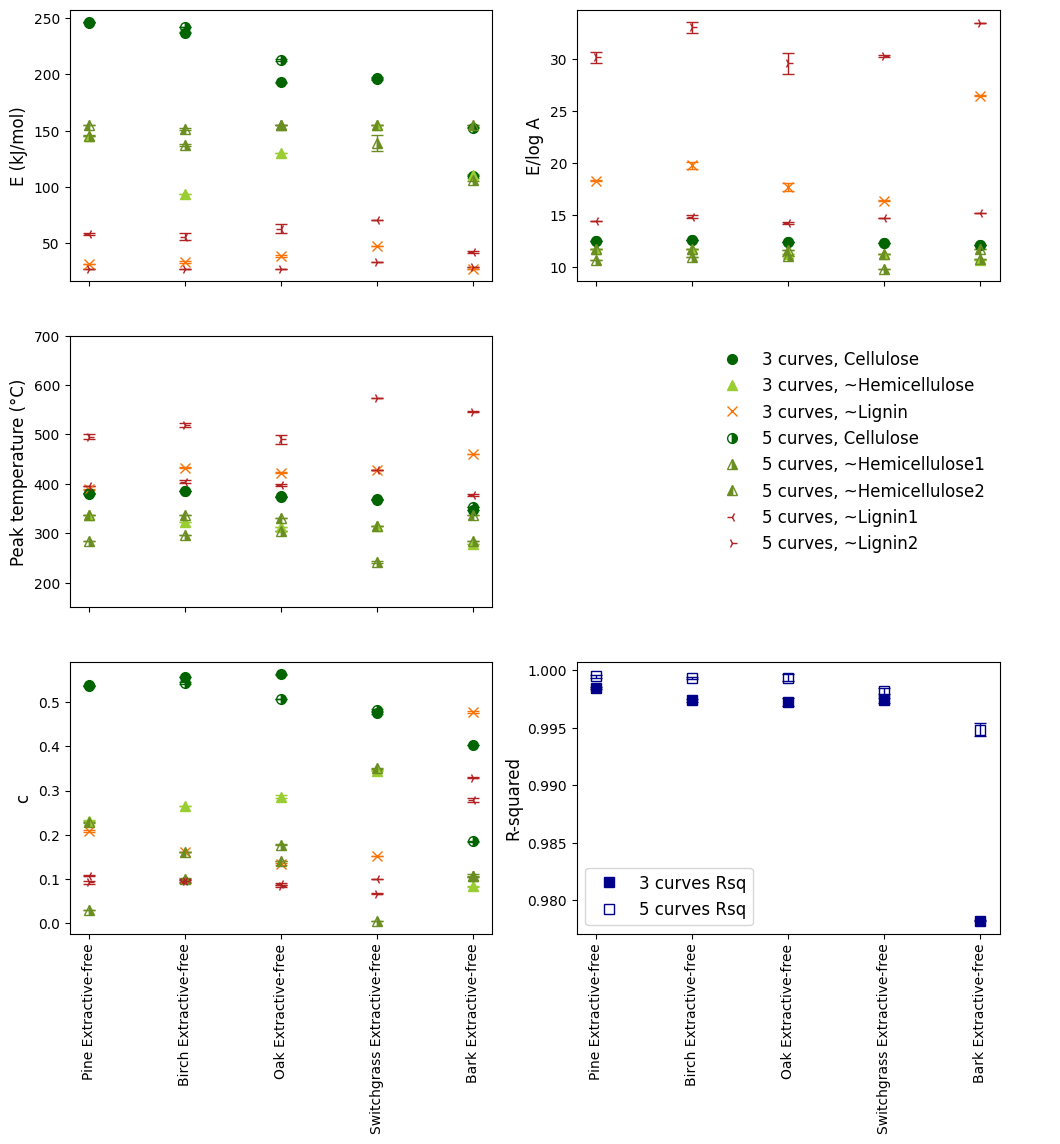

In [ ]:


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(3, 2, 1)

plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['E_Cell'], yerr=df3stdN2['E_Cell'], label = 'E_Cell', **marker1)
plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['E_Hemi'], yerr=df3stdN2['E_Hemi'], label = 'E_Hemi', **marker2)
plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['E_Lig'], yerr=df3stdN2['E_Lig'], label = 'E_Lig', **marker3)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['E_Cell'], yerr=df5stdN2['E_Cell'], label = 'E_Cell', **marker17)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['E_Hemi1'], yerr=df5stdN2['E_Hemi1'], label = 'E_Hemi', **marker27)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['E_Lig1'], yerr=df5stdN2['E_Lig1'], label = 'E_Lig', **marker25)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['E_Hemi2'], yerr=df5stdN2['E_Hemi2'], label = 'E_Hemi', **marker24)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['E_Lig2'], yerr=df5stdN2['E_Lig2'], label = 'E_Lig', **marker26)
#plt.xticks(rotation=90)
plt.xticks(color='w')
plt.ylabel('E (kJ/mol)', fontsize=fz)

ax = fig.add_subplot(3, 2, 2)

plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['B_Cell'], yerr=df3stdN2['B_Cell'], label = 'Cellulose', **marker1)
plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['B_Hemi'], yerr=df3stdN2['B_Hemi'], label = '~Hemicellulose', **marker2)
plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['B_Lig'], yerr=df3stdN2['B_Lig'], label = '~Lignin', **marker3)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['B_Cell'], yerr=df5stdN2['B_Cell'], **marker17)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['B_Hemi1'], yerr=df5stdN2['B_Hemi1'], **marker27)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['B_Lig1'], yerr=df5stdN2['B_Lig1'], **marker25)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['B_Hemi2'], yerr=df5stdN2['B_Hemi2'], **marker24)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['B_Lig2'], yerr=df5stdN2['B_Lig2'], **marker26)
#plt.xticks(rotation=90)
plt.xticks(color='w')
plt.ylabel('E/log A', fontsize=fz)

ax = fig.add_subplot(3, 2, 3)

plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['T_Cell'], yerr=df3stdN2['T_Cell'], label = 'Cellulose', **marker1)
plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['T_hemic'], yerr=df3stdN2['T_hemic'], label = '~Hemicellulose', **marker2)
plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['T_lig'], yerr=df3stdN2['T_lig'], label = '~Lignin', **marker3)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['T_Cell'], yerr=df5stdN2['T_Cell'], label = 'Cellulose', **marker17)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['T_hemic 1'], yerr=df5stdN2['T_hemic 1'], label = '~Hemicellulose', **marker27)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['T_lig 1'], yerr=df5stdN2['T_lig 1'], label = '~Lignin', **marker25)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['T_hemic 2'], yerr=df5stdN2['T_hemic 2'], label = '~Hemicellulose', **marker24)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['T_lig 2'], yerr=df5stdN2['T_lig 2'], label = '~Lignin', **marker26)
plt.xticks(color='w')
plt.ylim([150,700])
plt.ylabel('Peak temperature (°C)', fontsize=fz)

ax = fig.add_subplot(3, 2, 4)

plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['T_Cell'], yerr=df3stdN2['T_Cell'], label = '3 curves, Cellulose', **marker1)
plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['T_hemic'], yerr=df3stdN2['T_hemic'], label = '3 curves, ~Hemicellulose', **marker2)
plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['T_lig'], yerr=df3stdN2['T_lig'], label = '3 curves, ~Lignin', **marker3)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['T_Cell'], yerr=df5stdN2['T_Cell'], label = '5 curves, Cellulose', **marker17)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['T_hemic 1'], yerr=df5stdN2['T_hemic 1'], label = '5 curves, ~Hemicellulose1', **marker27)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['T_hemic 2'], yerr=df5stdN2['T_hemic 2'], label = '5 curves, ~Hemicellulose2', **marker24)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['T_lig 1'], yerr=df5stdN2['T_lig 1'], label = '5 curves, ~Lignin1', **marker25)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['T_lig 2'], yerr=df5stdN2['T_lig 2'], label = '5 curves, ~Lignin2', **marker26)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

ax.clear()

ax.legend(new_handles, labels, loc='best', fontsize=fz,frameon=False)
ax.axis('off')

ax = fig.add_subplot(3, 2, 5)

plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['c_Cell'], yerr=df3stdN2['c_Cell'], label = 'Cellulose', **marker1)
plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['c_Hemi'], yerr=df3stdN2['c_Hemi'], label = '~Hemicellulose', **marker2)
plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['c_Lig'], yerr=df3stdN2['c_Lig'], label = '~Lignin', **marker3)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['c_Cell'], yerr=df5stdN2['c_Cell'], label = 'Cellulose', **marker17)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['c_Hemi1'], yerr=df5stdN2['c_Hemi1'], label = '~Hemicellulose', **marker27)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['c_Lig1'], yerr=df5stdN2['c_Lig1'], label = '~Lignin', **marker25)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['c_Hemi2'], yerr=df5stdN2['c_Hemi2'], label = '~Hemicellulose', **marker24)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['c_Lig2'], yerr=df5stdN2['c_Lig2'], label = '~Lignin', **marker26)

plt.xticks(rotation=90)
plt.ylabel('c', fontsize=fz)

ax = fig.add_subplot(3, 2, 6)
plt.errorbar(x = df3meanN2.index.tolist(), y = df3meanN2['R_sq'], yerr=df3stdN2['R_sq'], label = '3 curves Rsq', **marker15)
plt.errorbar(x = df5meanN2.index.tolist(), y = df5meanN2['R_sq'], yerr=df5stdN2['R_sq'], label = '5 curves Rsq', **marker20)
plt.xticks(rotation=90)
plt.ylabel('R-squared', fontsize=fz)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc='best', fontsize=fz)



plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Kin_param_fit_3vs5_curves.png',dpi=300,bbox_inches='tight')

print('3 VS 5 curves')
plt.show()

# 13) Compare fit 3 curves with extended boundary

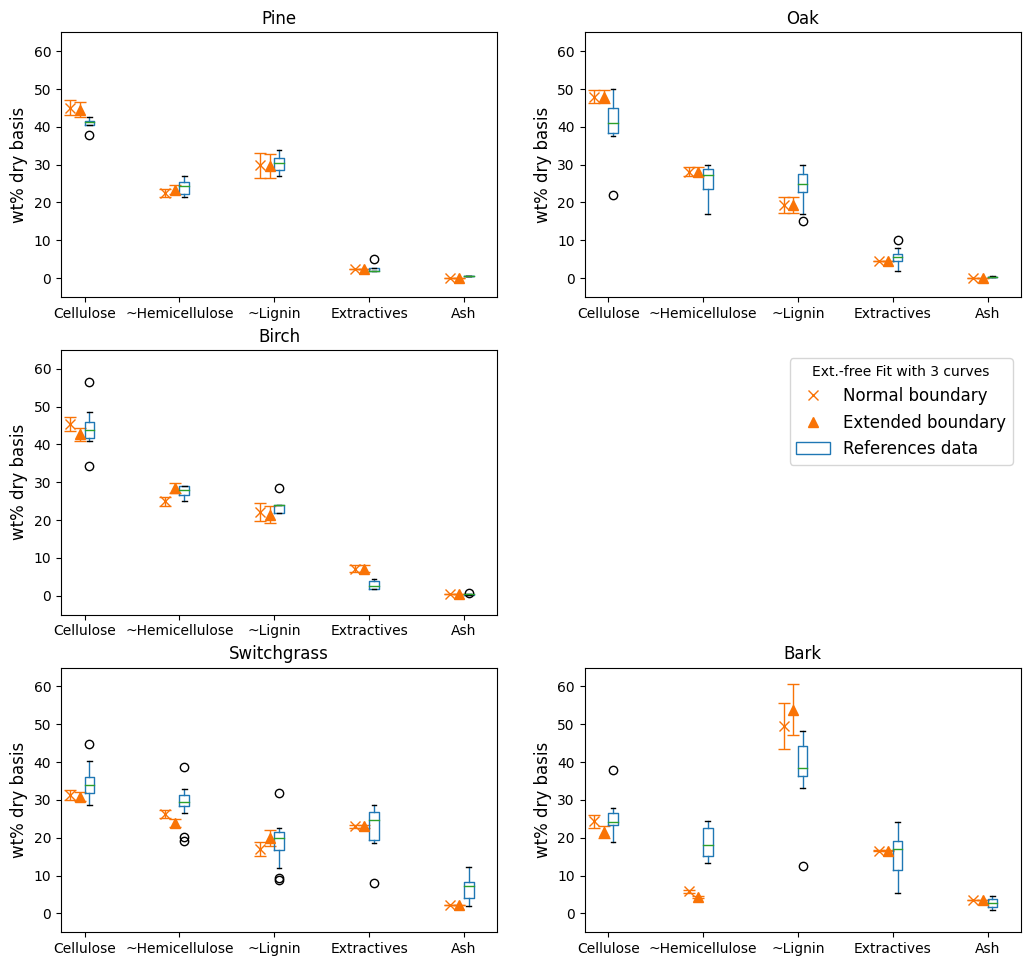

In [ ]:
#@title Plot compare 3 extend
def plot_comparefitExtnd(feedname,df):

  ind = numpy.arange(5)
  width = 0.1

  feedname_ex = feedname + ' Extractive-free'
  plt.errorbar(x = ind , y = df3mean['List']['Normal boundary'][feedname_ex], yerr=df3std['List']['Normal boundary'][feedname_ex],label = 'Normal boundary', **marker3)
  plt.errorbar(x = ind + width , y = df3mean['List']['Extended boundary'][feedname_ex], yerr=df3std['List']['Extended boundary'][feedname_ex],label = 'Extended boundary', **marker16)
  bplot = df.boxplot(column='yaxis', by='xaxis',ax=ax, positions=ind+ 2*width, widths=width, grid=False)

  bplot.set_xlabel('')
  plt.ylabel('wt% dry basis', fontsize=fz)
  plt.xticks(ind + 3*width/2, x_list)
  plt.xlim([-0.1,4.5])
  plt.ylim([-5,65])
  plt.title(feedname)
  plt.suptitle('')



fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(3, 2, 1)

plot_comparefitExtnd('Pine',Pine_ref)

ax = fig.add_subplot(3, 2, 2)

plot_comparefitExtnd('Oak',Oak_ref)

ax = fig.add_subplot(3, 2, 3)

plot_comparefitExtnd('Birch',Birch_ref)


ax = fig.add_subplot(3, 2, 4)

plot_comparefitExtnd('Pine',Pine_ref)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
red_patch = patches.Patch(edgecolor='tab:blue', fill=False)
new_handles.append(red_patch)
labels.append('References data')
ax.clear()

ax.legend(new_handles, labels, loc='best', title = 'Ext.-free Fit with 3 curves', fontsize=fz)
ax.axis('off')

ax = fig.add_subplot(3, 2, 5)

plot_comparefitExtnd('Switchgrass',Switchgrass_ref)

ax = fig.add_subplot(3, 2, 6)

plot_comparefitExtnd('Bark',Bark_ref)


plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Feedstocks_compare3_extnd.png',dpi=300,bbox_inches='tight')



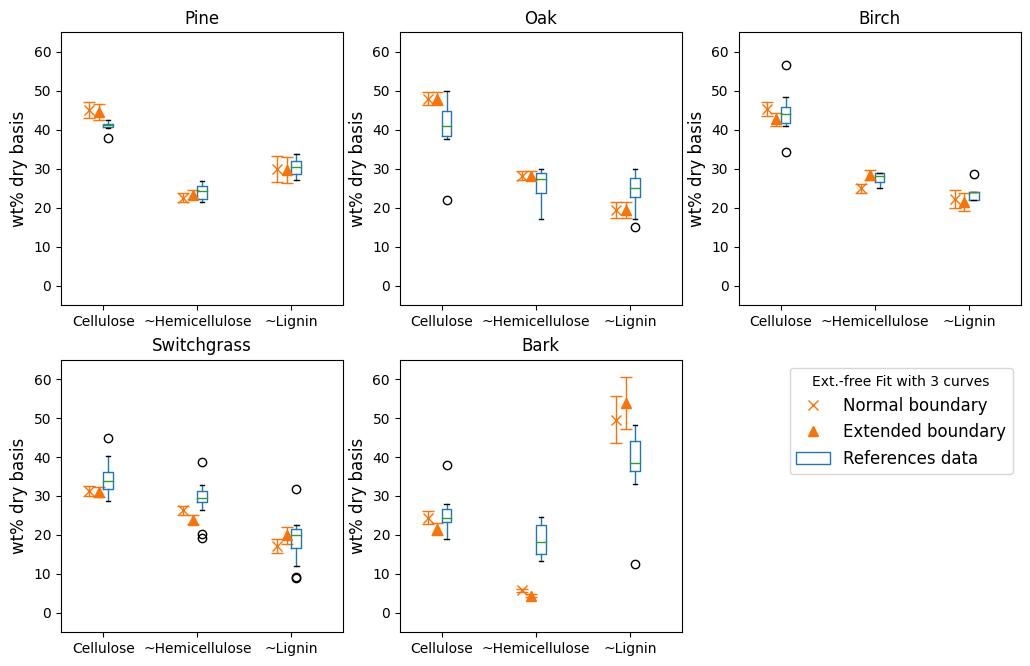

In [ ]:
#@title Plot compare 3 extend (3 components)
def plot_comparefitExtnd(feedname,df):

  ind = numpy.arange(3)
  width = 0.1

  feedname_ex = feedname + ' Extractive-free'
  plt.errorbar(x = ind , y = df3mean['List3']['Normal boundary'][feedname_ex], yerr=df3std['List3']['Normal boundary'][feedname_ex],label = 'Normal boundary', **marker3)
  plt.errorbar(x = ind + width , y = df3mean['List3']['Extended boundary'][feedname_ex], yerr=df3std['List3']['Extended boundary'][feedname_ex],label = 'Extended boundary', **marker16)
  bplot = df.boxplot(column='yaxis', by='xaxis',ax=ax, positions=ind+ 2*width, widths=width, grid=False)

  bplot.set_xlabel('')
  plt.ylabel('wt% dry basis', fontsize=fz)
  plt.xticks(ind + 3*width/2, x_list3)
  #plt.xlim([-0.1,4.5])
  plt.ylim([-5,65])
  plt.title(feedname)
  plt.suptitle('')


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2, 3, 1)

plot_comparefitExtnd('Pine',Pine_ref3)

ax = fig.add_subplot(2, 3, 2)

plot_comparefitExtnd('Oak',Oak_ref3)

ax = fig.add_subplot(2, 3, 3)

plot_comparefitExtnd('Birch',Birch_ref3)

ax = fig.add_subplot(2, 3, 4)

plot_comparefitExtnd('Switchgrass',Switchgrass_ref3)

ax = fig.add_subplot(2, 3, 5)

plot_comparefitExtnd('Bark',Bark_ref3)

ax = fig.add_subplot(2, 3, 6)

plot_comparefitExtnd('Pine',Pine_ref3)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
red_patch = patches.Patch(edgecolor='tab:blue', fill=False)
new_handles.append(red_patch)
labels.append('References data')
ax.clear()

ax.legend(new_handles, labels, loc='best', title = 'Ext.-free Fit with 3 curves', fontsize=fz)
ax.axis('off')


plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Feedstocks_compare3_extnd_v2.png',dpi=300,bbox_inches='tight')

plt.show()

In [ ]:
#@title Plot E, B, T_peaks, R_sq Extended boundary

df3meanE = df3mean.loc['Extended boundary']
df3stdE = df3std.loc['Extended boundary']



In [ ]:
lst = ['Pine Extractive-free','Birch Extractive-free',
       'Oak Extractive-free', 'Switchgrass Extractive-free',
       'Bark Extractive-free']

df3meanE = df3meanE.loc[lst]
df3stdE = df3stdE.loc[lst]

df3meanN = df3meanN.loc[lst]
df3stdN = df3stdN.loc[lst]

Extended boundary


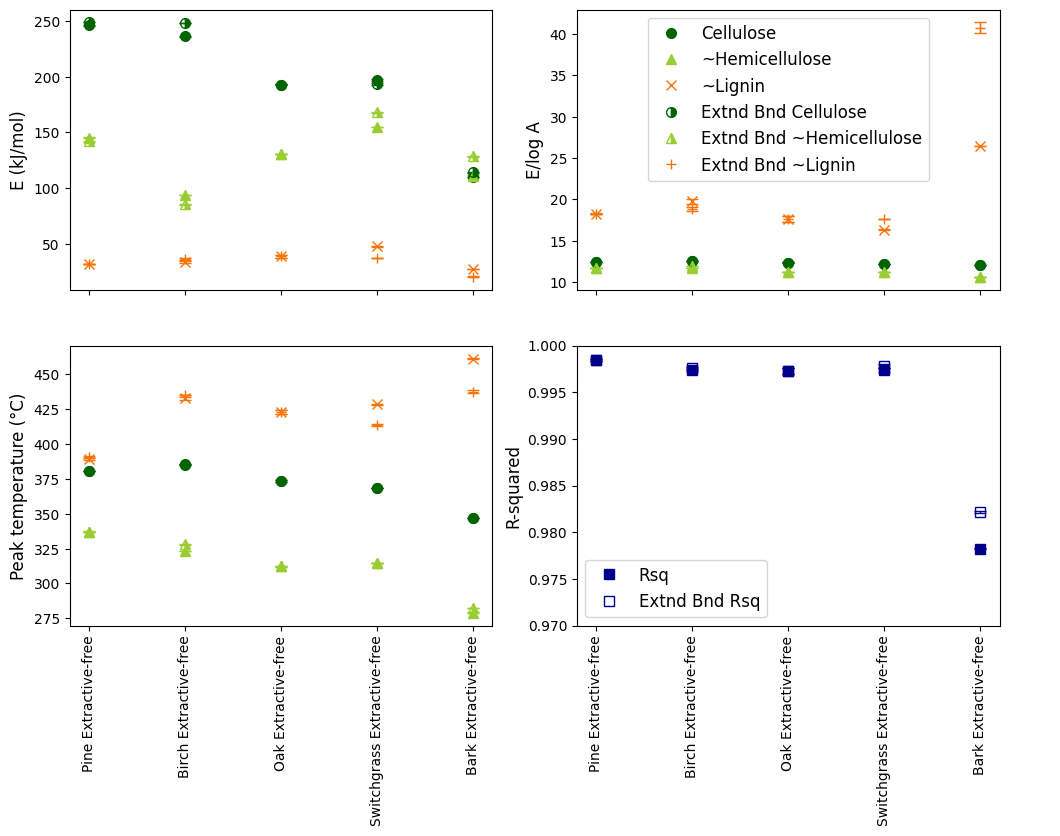

In [ ]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2, 2, 1)

plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['E_Cell'], yerr=df3stdN['E_Cell'], label = 'E_Cell', **marker1)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['E_Hemi'], yerr=df3stdN['E_Hemi'], label = 'E_Hemi', **marker2)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['E_Lig'], yerr=df3stdN['E_Lig'], label = 'E_Lig', **marker3)
plt.errorbar(x = df3meanE.index.tolist(), y = df3meanE['E_Cell'], yerr=df3stdE['E_Cell'], label = 'E_Cell', **marker17)
plt.errorbar(x = df3meanE.index.tolist(), y = df3meanE['E_Hemi'], yerr=df3stdE['E_Hemi'], label = 'E_Hemi', **marker18)
plt.errorbar(x = df3meanE.index.tolist(), y = df3meanE['E_Lig'], yerr=df3stdE['E_Lig'], label = 'E_Lig', **marker19)
#plt.xticks(rotation=90)
plt.xticks(color='w')
plt.ylabel('E (kJ/mol)', fontsize=fz)

ax = fig.add_subplot(2, 2, 2)

plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['B_Cell'], yerr=df3stdN['B_Cell'], label = 'Cellulose', **marker1)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['B_Hemi'], yerr=df3stdN['B_Hemi'], label = '~Hemicellulose', **marker2)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['B_Lig'], yerr=df3stdN['B_Lig'], label = '~Lignin', **marker3)
plt.errorbar(x = df3meanE.index.tolist(), y = df3meanE['B_Cell'], yerr=df3stdE['B_Cell'], label = 'Extnd Bnd Cellulose', **marker17)
plt.errorbar(x = df3meanE.index.tolist(), y = df3meanE['B_Hemi'], yerr=df3stdE['B_Hemi'], label = 'Extnd Bnd ~Hemicellulose', **marker18)
plt.errorbar(x = df3meanE.index.tolist(), y = df3meanE['B_Lig'], yerr=df3stdE['B_Lig'], label = 'Extnd Bnd ~Lignin', **marker19)
#plt.xticks(rotation=90)
plt.xticks(color='w')
plt.ylabel('E/log A', fontsize=fz)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc='upper center', fontsize=fz)
#ax.legend(new_handles, labels, loc='center right', bbox_to_anchor = (0.5,0.4), fontsize=fz)

ax = fig.add_subplot(2, 2, 3)

plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['T_Cell'], yerr=df3stdN['T_Cell'], label = 'Cellulose', **marker1)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['T_hemic'], yerr=df3stdN['T_hemic'], label = '~Hemicellulose', **marker2)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['T_lig'], yerr=df3stdN['T_lig'], label = '~Lignin', **marker3)
plt.errorbar(x = df3meanE.index.tolist(), y = df3meanE['T_Cell'], yerr=df3stdE['T_Cell'], label = 'Cellulose', **marker17)
plt.errorbar(x = df3meanE.index.tolist(), y = df3meanE['T_hemic'], yerr=df3stdE['T_hemic'], label = '~Hemicellulose', **marker18)
plt.errorbar(x = df3meanE.index.tolist(), y = df3meanE['T_lig'], yerr=df3stdE['T_lig'], label = '~Lignin', **marker19)
plt.xticks(rotation=90)
plt.ylabel('Peak temperature (°C)', fontsize=fz)

ax = fig.add_subplot(2, 2, 4)
plt.errorbar(x = df3meanN.index.tolist(), y = df3meanN['R_sq'], yerr=df3stdN['R_sq'], label = 'Rsq', **marker15)
plt.errorbar(x = df3meanE.index.tolist(), y = df3meanE['R_sq'], yerr=df3stdE['R_sq'], label = 'Extnd Bnd Rsq', **marker20)
plt.xticks(rotation=90)
plt.ylabel('R-squared', fontsize=fz)
plt.ylim([0.97,1])

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc='best', fontsize=fz)



plt.savefig('/content/drive/MyDrive/P5_Batch_potato_exp/TGA_potato_peel/Figures/Kin_param_fit3curves_extnd.png',dpi=300,bbox_inches='tight')

print('Extended boundary')
plt.show()